In [1]:
import sys
sys.path.append('/home/fboehning/fboehning')
#sys.path.append('C:/Users/felix/Documents/Studium Ingenieurinformatik/dAISY/fboehning')

import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(filename)s - %(name)s - %(funcName)s - %(levelname)s - %(message)s')

import os
import re
#from datetime import datetime
def get_timestamp_sorted_fns(name_pattern=r".*", path="."):
    timestamp_pattern=r"(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}).*"
    fns=[fn for fn in os.listdir(path) if re.match(timestamp_pattern,fn)]
    timestamps = [re.match(timestamp_pattern,fn).group(1) for fn in fns]
    timestamps = [datetime.datetime.strptime(ts, "%Y-%m-%d_%H-%M-%S") for ts in timestamps]
    timestamps, fns = zip(*sorted(zip(timestamps, fns), key=lambda x: x[0]))

    fns = [fn for fn in fns if re.match(name_pattern,fn)]
    return fns

In [2]:
TOOLKIT=[
    'beesup_llm.toolkit.llm_utils',
    'beesup_llm.toolkit.dict_utils',
    'beesup_llm.toolkit.setup_utils',
    'beesup_llm.toolkit.visualization',
    'beesup_llm.toolkit.display_settings',
]

DATASET=[
    'beesup_llm.dataset',
]

MODEL_PIPELINES=[
    'beesup_llm.model_pipelines'
]

EXTRACTION=[
    'beesup_llm.extraction',
    'beesup_llm.extraction.extraction_pipeline',
    'beesup_llm.extraction.extraction_utils',
    'beesup_llm.extraction.evaluation_pipeline',
    'beesup_llm.extraction.evaluation_utils',
    'beesup_llm.extraction.extraction_experiment'

]

EXPERIMENT=[
    'beesup_llm.experiment',
]

import importlib
import beesup_llm;
import beesup_llm.toolkit.llm_utils; from beesup_llm.toolkit.llm_utils import *
import beesup_llm.toolkit.dict_utils; from beesup_llm.toolkit.dict_utils import *
import beesup_llm.toolkit.setup_utils; from beesup_llm.toolkit.setup_utils import *
import beesup_llm.toolkit.visualization; from beesup_llm.toolkit.visualization import *
import beesup_llm.toolkit.display_settings; from beesup_llm.toolkit.display_settings import *

import beesup_llm.dataset; from beesup_llm.dataset import *
import beesup_llm.training; from beesup_llm.training import *
import beesup_llm.model_pipelines; from beesup_llm.model_pipelines import *

import beesup_llm.extraction; from beesup_llm.extraction import *
import beesup_llm.extraction.extraction_utils; from beesup_llm.extraction.extraction_utils import *
import beesup_llm.extraction.extraction_pipeline; from beesup_llm.extraction.extraction_pipeline import *

import beesup_llm.extraction.evaluation_utils; from beesup_llm.extraction.evaluation_utils import *
import beesup_llm.extraction.evaluation_pipeline; from beesup_llm.extraction.evaluation_pipeline import *
import beesup_llm.extraction.extraction_experiment; from beesup_llm.extraction.extraction_experiment import *

import beesup_llm.experiment; from beesup_llm.experiment import *


def reimport(pathlist=TOOLKIT+DATASET+MODEL_PIPELINES+EXTRACTION+EXPERIMENT):

    pathlist = ['beesup_llm'] + pathlist

    for module_path in pathlist:
        if module_path in sys.modules:
            # Reload if the module is already imported
            importlib.reload(sys.modules[module_path])
        else:

            importlib.import_module(module_path)
            # Import the module or submodule for the first time
            globals()[module_path.split('.')[0]] = importlib.import_module(module_path)

        module = sys.modules[module_path]
        globals().update({name: getattr(module, name) for name in dir(module) if not name.startswith('_')})

import logging
def set_info():
    logger = logging.getLogger('beesup_llm')
    logger.setLevel(logging.INFO)
    logging.getLogger().setLevel(logging.INFO)

def set_debug():
    logger = logging.getLogger('beesup_llm')
    logger.setLevel(logging.DEBUG)
    logging.getLogger().setLevel(logging.DEBUG)

set_info()
reimport()

2025-02-26 07:47:02,532 - config.py - datasets - <module> - INFO - PyTorch version 2.3.1 available.


# Create a Dataset

In [30]:
dataset_df=pd.read_pickle('/home/fboehning/fboehning/old/finetuning_lab/datasets/0002_dataset/dataset_df.pkl')
dataset_df.drop(columns=[
    #'prompt_messages',
    #'gold_message',
    'extraction_prompt',
    'gold_completion',
    #'gold_json',
    'n_tokns',
    'n_chars'
    ],
    inplace=True)
dataset_df

,num_observations,report_style,report_passage,report_dict,report_info,title,filename_new,obs_ids,gold_json,split,report_prompt,report_style_example,model_name,generation_params,timestamp,usage,is_real
0,18,section,"Beobachtungen von Andrena morawitzi THOMSON, 1...",{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,"[8821, 8822, 8823, 8824, 8825, 8826, 8827, 882...","{'meta_bee': 'Andrena morawitzi', 'meta_taxon'...",train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:07:39,"CompletionUsage(completion_tokens=584, prompt_...",False
1,7,section,**Neue Erkenntnisse zur Verbreitung von Spheco...,{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,"[8852, 8853, 8854, 8855, 8856, 8857, 8858]","{'meta_bee': 'Sphecodes rufiventris', 'meta_ta...",train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:12:02,"CompletionUsage(completion_tokens=651, prompt_...",False
2,8,section,Beitrag zur Hautflüglerfauna von Brandenburg -...,{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,"[8813, 8814, 8815, 8816, 8817, 8818, 8819, 8820]","{'meta_bee': 'Andrena bluethgeni', 'meta_taxon...",train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:10:53,"CompletionUsage(completion_tokens=663, prompt_...",False
3,4,section,Neue Funde von Hylaeus rinki Gorski 1852 und P...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,3_bemerkenswerte_stechimmenfunde_niedersachsen...,"[607, 608, 609, 618]","{'meta_location': 'Deutschland, Niedersachsen'...",test,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:08:06,"CompletionUsage(completion_tokens=620, prompt_...",False
4,4,section,Bericht über bemerkenswerte Funde der Stechimm...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,3_bemerkenswerte_stechimmenfunde_niedersachsen...,"[599, 600, 601, 602]","{'meta_bee': 'Andrena strohmella', 'meta_taxon...",test,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:11:40,"CompletionUsage(completion_tokens=542, prompt_...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,section,Bemerkenswerte Stechimmenfunde aus Niedersachs...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,2_bemerkenswerte_stechimmenfunde_niedersachsen...,[594],{'observations': [{'bee': 'Lasioglossum costul...,train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:31:02,"CompletionUsage(completion_tokens=299, prompt_...",False
96,1,section,Beitrag zur Hautflüglerfauna von Brandenburg -...,{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,[8812],"{'observations': [{'bee': 'Andrena anthrisci',...",test,Write a passage for a german scientific journa...,Erstnachweis von B

In [31]:
#convert from old dataset
def adapt_scientific_name(the_json):

    if 'meta_bee' in the_json.keys():
        meta_scientific_name=f'{the_json.get('meta_bee')} ({the_json.get('meta_taxon','')})'.strip()
        meta_scientific_name=meta_scientific_name.replace('()','').strip()
        the_json['meta_scientific_name']=meta_scientific_name

    if 'observations' in the_json.keys():
        for i,obs_json in enumerate(the_json['observations']):

            if 'bee' in obs_json.keys():
                #the_json['observations'][i]['scientific_name']=f'{obs_json.get('bee')} {obs_json.get('taxon','')}'.strip()
                scientific_name=f'{obs_json.get('bee')} ({obs_json.get('taxon','')})'.strip()
                scientific_name=scientific_name.replace('()','').strip()
                the_json['observations'][i]['scientific_name']=scientific_name
    
    return denormalize_extraction_json(normalize_extraction_json(the_json))

def get_gold_completion(gold_json):
    return f"```json\n{json.dumps(gold_json,indent=2,ensure_ascii=False)}\n```"

new_data=[]

for i,row in dataset_df.iterrows():
    new_row=copy.deepcopy(row)
    gold_json=copy.deepcopy(row['gold_json'])
    gold_json=adapt_scientific_name(gold_json)
    new_row['gold_json']=gold_json
    #del new_row['extraction_prompt']
    new_row['gold_completion']=get_gold_completion(gold_json)
    #new_row['prompt_messages']=get_prompt_messages(row['report_passage'])
    #new_row['gold_message']=[{'role':'assistant','content':get_gold_completion(gold_json)}]

    new_data.append(new_row)
    
dataset_df=pd.DataFrame(new_data)
dataset_df

,num_observations,report_style,report_passage,report_dict,report_info,title,filename_new,obs_ids,gold_json,split,report_prompt,report_style_example,model_name,generation_params,timestamp,usage,is_real,gold_completion
0,18,section,"Beobachtungen von Andrena morawitzi THOMSON, 1...",{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,"[8821, 8822, 8823, 8824, 8825, 8826, 8827, 882...",{'meta_scientific_name': 'Andrena morawitzi (T...,train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:07:39,"CompletionUsage(completion_tokens=584, prompt_...",False,"```json\n{\n ""meta_scientific_name"": ""Andrena..."
1,7,section,**Neue Erkenntnisse zur Verbreitung von Spheco...,{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,"[8852, 8853, 8854, 8855, 8856, 8857, 8858]",{'meta_scientific_name': 'Sphecodes rufiventri...,train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:12:02,"CompletionUsage(completion_tokens=651, prompt_...",False,"```json\n{\n ""meta_scientific_name"": ""Sphecod..."
2,8,section,Beitrag zur Hautflüglerfauna von Brandenburg -...,{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,"[8813, 8814, 8815, 8816, 8817, 8818, 8819, 8820]",{'meta_scientific_name': 'Andrena bluethgeni (...,train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:10:53,"CompletionUsage(completion_tokens=663, prompt_...",False,"```json\n{\n ""meta_scientific_name"": ""Andrena..."
3,4,section,Neue Funde von Hylaeus rinki Gorski 1852 und P...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,3_bemerkenswerte_stechimmenfunde_niedersachsen...,"[607, 608, 609, 618]","{'meta_location': 'Deutschland, Niedersachsen'...",test,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:08:06,"CompletionUsage(completion_tokens=620, prompt_...",False,"```json\n{\n ""meta_location"": ""Deutschland, N..."
4,4,section,Bericht über bemerkenswerte Funde der Stechimm...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,3_bemerkenswerte_stechimmenfunde_niedersachsen...,"[599, 600, 601, 602]",{'meta_scientific_name': 'Andrena strohmella (...,test,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:11:40,"CompletionUsage(completion_tokens=542, prompt_...",False,"```json\n{\n ""meta_scientific_name"": ""Andrena..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,section,Bemerkenswerte Stechimmenfunde aus Niedersachs...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,2_bemerkenswerte_stechimmenfunde_niedersachsen...,[594],{'observations': [{'scientific_name': 'Lasiogl...,train,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:31:02,"CompletionUsage(completion_tokens=299, prompt_...",False,"```json\n{\n ""observations"": [\n {\n ..."
96,1,section,Beitrag zur Hautflüglerfauna von Brandenburg -...,{'tit

In [135]:
dataset=BaseDataset.from_df(dataset_df)
display(dataset.get_config())

dataset_config=dict(
    remarks='100 synthetic samples',
    #remarks='100 real samples + 100 synthetic samples'
)

dataset.update_attributes(dataset_config)
display(dataset.get_config(),clear=True)
#dataset.spawn()

2025-01-08 12:08:02,815 - __init__.py - beesup_llm - __init__ - INFO - 0010_DATASET initialised


{'type': 'dataset',
 'id': 10,
 'name': '0010_dataset',
 'dir_name': 'datasets',
 'lab_name': 'extraction_lab',
 'rel_path': 'extraction_lab/datasets/0010_dataset',
 'remarks': None,
 'emb_model_config': None,
 'parent_config': None,
 'timestamp_init': '2025-01-08_13-08-02'}

AttributeError: 'BaseDataset' object has no attribute 'update_attributes'

In [ ]:
real_dataset=BaseDataset(1)
synth_dataset=BaseDataset(2)

2024-11-25 14:21:50,996 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised
2024-11-25 14:21:51,006 - __init__.py - beesup_llm - __init__ - INFO - 0002_DATASET initialised


In [55]:
dataset_df=pd.concat([real_dataset.df,synth_dataset.df],ignore_index=True).reset_index(drop=True)
dataset_df = dataset_df[~((dataset_df['split'] == 'test') & (dataset_df['is_real'] == False))].reset_index(drop=True)
dataset_df


,num_observations,report_style,report_passage,report_dict,report_info,title,filename_new,obs_ids,gold_completion,split,is_real,gold_json,report_prompt,report_style_example,model_name,generation_params,timestamp,usage
0,18,section,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,{'title': 'Beitrag zur Hautflüglerfauna von Br...,META-ATTRIBUTES:\ntitle: Beitrag zur Hautflügl...,Beitrag zur Hautflüglerfauna von Bran-denburg ...,28_beitrag_hautflüglerfauna_brandenburg_wieder...,"[8821, 8822, 8823, 8824, 8825, 8826, 8827, 882...","```json\n{\n ""meta_scientific_name"": ""Andrena...",train,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,section,"Im Rahmen von Gutachten, Forschungsprojekten u...",{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,3_bemerkenswerte_stechimmenfunde_niedersachsen...,"[607, 608, 609, 618]","```json\n{\n ""meta_location"": ""Deutschland, N...",test,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,section,Im Rahmen von biologischen Gutachten konnten 2...,{'title': 'Erstnachweis von Bombus semenoviell...,META-ATTRIBUTES:\ntitle: Erstnachweis von Bomb...,Erstnachweis von Bombus semenoviellus Skorikov...,0_erstnachweis_bombus_semenoviellus_skorikov.pdf,"[6, 7, 9]","```json\n{\n ""meta_location"": ""Deutschland, N...",train,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,concise,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",{'title': 'Hervorhebenswerte Stechimmenfunde a...,META-ATTRIBUTES:\ntitle: Hervorhebenswerte Ste...,Hervorhebenswerte Stechimmenfunde aus dem östl...,7_hervorhebenswerte_stechimmenfunde_östlichen_...,"[22825, 22826, 22829, 22830]","```json\n{\n ""meta_location"": ""Deutschland, N...",train,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,section,Im Rahmen von biologischen Gutachten konnten 2...,{'title': 'Erstnachweis von Bombus semenoviell...,META-ATTRIBUTES:\ntitle: Erstnachweis von Bomb...,Erstnachweis von Bombus semenoviellus Skorikov...,0_erstnachweis_bombus_semenoviellus_skorikov.pdf,"[5, 8]","```json\n{\n ""meta_date"": ""30.06.2012"",\n ""m...",test,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2,prose,Andrena ventralis IMH. wird hauptsächlich in D...,"{'title': 'Zur lauenburgischen Bienenfauna', '...",META-ATTRIBUTES:\ntitle: Zur lauenburgischen B...,Zur lauenburgischen Bienenfauna,22_lauenburgischen_bienenfauna.pdf,"[24058, 24059]","```json\n{\n ""meta_scientific_name"": ""Andrena...",train,False,{'meta_scientific_name': 'Andrena ventralis (I...,Write a passage for a german scientific journa...,Osmia maritima FR. gilt als ausgesprochene Bew...,gpt-4-turbo,{'seed': 0},2024-05-30 13:38:48,"CompletionUsage(completion_tokens=323, prompt_..."
166,1,section,Neue Nachweise der seltenen Wildbiene Nomada r...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,2_bemerkenswerte_stechimmenfunde_niedersachsen...,[597],"```json\n{\n ""observations"": [\n {\n ...",train,False,{'observations': [{'scientific_name': 'Nomada ...,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:13:53,"CompletionUsage(completion_tokens=293, prompt_..."
167,1,section,Bemerkenswerte Stechimmenfunde aus Niedersachs...,{'title': 'Bemerkenswerte Stechimmenfunde aus ...,META-ATTRIBUTES:\ntitle: Bemerkenswerte Stechi...,Bemerkenswerte Stechimmenfunde aus Niedersachs...,2_bemerkenswerte_stechimmenfunde_niedersachsen...,[594],"```json\n{\n ""observations"": [\n {\n ...",train,False,{'observations': [{'scientific_name': 'Lasiogl...,Write a passage for a german scientific journa...,Erstnachweis von Bombus semenoviellus Skorikov...,gpt-4-turbo,{'seed': 0},2024-05-30 13:31:02,"CompletionUsage(completion_tokens=299, prompt_..."
168,1,section,Bemerkenswerte Beobachtung von Nomada conjunge...,{'title': 'Bemerkenswerte Stechi

In [194]:
!nvidia-smi

Thu Jan  2 14:11:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:4F:00.0 Off |                    0 |
|  0%   57C    P0            175W /  300W |    1939MiB /  46068MiB |    100%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [39]:
real_test_samples_df=BaseDataset(5).dataset_df
real_test_samples_df=real_test_samples_df[real_test_samples_df['split']=='test']
real_test_samples_df


2025-01-06 07:22:22,429 - __init__.py - beesup_llm - __init__ - INFO - 0005_DATASET initialised


,report_passage,strat,gold_json,gold_completion,source,is_real,split
4,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,True,test
7,"Im Rahmen von Gutachten, Forschungsprojekten u...",2,"{'meta_location': 'Niedersachsen', 'meta_n_fem...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[7] Bemerkenswerte Stechimmenfunde aus Nieders...,True,test
14,"""Beitr.Naturk.Niedersachsens 58 (2005): 2- ...",5,"{'meta_location': 'östliches Niedersachsen', '...","```json\n{\n ""meta_location"": ""östliches Nied...",[14] Hervorhebenswerte Stechimmenfunde (Hymeno...,True,test
15,Im Rahmen von Gutachten und Erfassungen konnte...,2,{'meta_scientific_name': 'Anthidium punctatum ...,"```json\n{\n ""meta_scientific_name"": ""Anthidi...",[15] Bemerkenswerte Stechimmenfunde aus Nieder...,True,test
16,Im Rahmen von Gutachten und Erfassungen konnte...,2,"{'meta_location': 'Niedersachsen', 'meta_n_fem...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[16] Bemerkenswerte Stechimmenfunde aus Nieder...,True,test
20,"Im Rahmen von Gutachten, Forschungsprojekten u...",2,{'observations': [{'scientific_name': 'Nomada ...,"```json\n{\n ""observations"": [\n {\n ...",[20] Bemerkenswerte Stechimmenfunde aus Nieder...,True,test
22,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",[22] Beitrag zur Hautflüglerfauna von Bran-den...,True,test
23,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Bombus barbutellus (...,"```json\n{\n ""meta_scientific_name"": ""Bombus ...",[23] Beitrag zur Hautflüglerfauna von Bran-den...,True,test
26,Zur lauenburgischen Bienenfauna\nVon Walther E...,7,"{'meta_location': 'Schleswig-Holstein, Lauenbu...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",[27] Zur lauenburgischen Bienenfauna/ Faunisti...,True,test
29,Für das Stadtgebiet Bielefeld nördlich des Te...,8,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",[30] Beitrag zur Kenntnis der Wildbienenfauna ...,True,test


In [61]:
dataset=BaseDataset(7)
display(dataset.get_config())

dataset_df = dataset.dataset_df
dataset_df = dataset_df[~((dataset_df['split'] == 'test') & (dataset_df['is_real'] == False))]
#dataset_df = pd.concat([dataset_df,real_test_samples_df],axis=0).sort_index()

#dataset.set_df(dataset_df)
dataset_df

2025-01-06 07:33:45,210 - __init__.py - beesup_llm - __init__ - INFO - 0007_DATASET initialised


{'type': 'dataset',
 'id': 7,
 'name': '0007_dataset',
 'dir_name': 'datasets',
 'lab_name': 'extraction_lab',
 'rel_path': 'extraction_lab/datasets/0007_dataset',
 'remarks': '100 synthetic + 100 real samples, cleaned double whitespaces, train/test split 70/30',
 'emb_model_config': None,
 'parent_config': None,
 'timestamp_init': '2025-01-03_12-34-24'}

,report_passage,strat,gold_json,gold_completion,source,is_real,split
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",[0] Beitrag zur Hautflüglerfauna von Brandenbu...,True,train
1,"Im Rahmen von Gutachten, Forschungsprojekten u...",2,{'observations': [{'scientific_name': 'Hylaeus...,"```json\n{\n ""observations"": [\n {\n ...",[1] Bemerkenswerte Stechimmenfunde aus Nieders...,True,train
2,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_location': 'Niedersachsen', 'meta_leg':...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[2] Erstnachweis von Bombus semenoviellus Skor...,True,train
3,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",5,"{'meta_location': 'östliches Niedersachsen', '...","```json\n{\n ""meta_location"": ""östliches Nied...",[3] Hervorhebenswerte Stechimmenfunde aus dem ...,True,train
4,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,True,test
...,...,...,...,...,...,...,...
194,Beobachtungen in Schleswig-Holstein:\n\n**Lasi...,12,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",https://www.researchgate.net/profile/Michael-K...,False,train
195,"Melitta nigricans Alfken, 1905: Beobachtungen ...",12,{'meta_scientific_name': 'Melitta nigricans Al...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,False,train
197,Niedersachsen\n\nAmmobates punctatus (Fabriciu...,11,"{'meta_location': 'Niedersachsen', 'observatio...","```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,False,train
198,"**Andrena chrysopus** Pérez, 1903 \n(Apidae)\...",11,{'meta_scientific_name': 'Andrena chrysopus Pé...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,False,train


## Create Huggingface Dataset

In [34]:
from datasets import Dataset, DatasetDict
from huggingface_hub import create_repo

def get_report_scheme(strat):
    scheme=None
    
    if strat in [1,2,3,5]: scheme='paragraphs'
    elif strat in [7,9,10]: scheme='continuous'
    elif strat in [11]: scheme='list_table'
    return scheme

use_cols=['report_passage','report_scheme','gold_completion','source','is_real']

In [35]:
real_df=BaseDataset(9).df
real_df['report_scheme']=real_df['strat'].apply(get_report_scheme)

real_train_df=real_df[real_df['split']=='train'][use_cols]
test_df=real_df[real_df['split']=='test'][use_cols]

2025-02-11 08:25:06,116 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised


In [36]:
synth_df=BaseDataset(10).df
synth_df['report_scheme']=synth_df['strat'].apply(get_report_scheme)
#synth_df['is_real']=False

synth_train_df=synth_df[synth_df['split']=='train'][use_cols]
#synth_test_df=synth_df[synth_df['split']=='test'][use_cols]

2025-02-11 08:25:07,344 - __init__.py - beesup_llm - __init__ - INFO - 0010_DATASET initialised


In [37]:
test_df=test_df.reset_index(drop=True)
train_df=pd.concat([real_train_df,synth_train_df],axis=0).reset_index(drop=True)

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [38]:
dataset

DatasetDict({
    train: Dataset({
        features: ['report_passage', 'report_scheme', 'gold_completion', 'source', 'is_real'],
        num_rows: 140
    })
    test: Dataset({
        features: ['report_passage', 'report_scheme', 'gold_completion', 'source', 'is_real'],
        num_rows: 30
    })
})

In [32]:
repo_name = "BeeDE-LLM"
create_repo(repo_name, repo_type="dataset")

RepoUrl('https://huggingface.co/datasets/fee1ix/BeeDE-LLM', endpoint='https://huggingface.co', repo_type='dataset', repo_id='fee1ix/BeeDE-LLM')

In [39]:
dataset.push_to_hub("fee1ix/BeeDE-LLM")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/fee1ix/BeeDE-LLM/commit/ea23ab819b7d321186c77a076232a81f9318333a', commit_message='Upload dataset', commit_description='', oid='ea23ab819b7d321186c77a076232a81f9318333a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/fee1ix/BeeDE-LLM', endpoint='https://huggingface.co', repo_type='dataset', repo_id='fee1ix/BeeDE-LLM'), pr_revision=None, pr_num=None)

# Data Distributions

In [3]:
llm_pipes_df=LanguageModelPipeline.get_overview(keypaths=['name_or_path'])
llm_pipes_df=llm_pipes_df[llm_pipes_df.id.isin([2,3,4])]
llm_pipes_df=llm_pipes_df.iloc[::-1]
llm_pipes_df

,id,name,name_or_path
3,4,0004_llm_pipeline,microsoft/Phi-3-medium-128k-instruct
2,3,0003_llm_pipeline,mistralai/Mistral-Nemo-Instruct-2407
1,2,0002_llm_pipeline,meta-llama/Meta-Llama-3.1-8B-Instruct


In [3]:
datasets_df=BaseDataset.get_overview(keypaths=['remarks'])
datasets_df=datasets_df[datasets_df.id.isin([9,10,11])]
datasets_df

,id,name,remarks
8,9,0009_dataset,100 real samples
9,10,0010_dataset,100 synthetic samples
10,11,0011_dataset,100 real samples + 70 synthetic samples (train...


In [7]:
# GET DATASET FEATURES

def get_num_obs(gold_json):
    if 'observations' in gold_json.keys():
        return len(gold_json['observations'])
    else:
        return 1

def get_num_attrs(gold_json):
    num_attrs=len(gold_json.keys())-1
    if 'observations' in gold_json.keys():
        for obs_json in gold_json['observations']:
            num_attrs+=len(obs_json.keys())

    return num_attrs

def get_report_scheme(strat):
    scheme=None
    
    if strat in [1,2,3,5]: scheme='paragraphs'
    elif strat in [7,9,10]: scheme='continuous'
    elif strat in [11]: scheme='list_table'
    return scheme

llama_tokenizer=LanguageModelPipeline(2).get_inference_tokenizer()

dataset_df=BaseDataset(9).df
dataset_df['n_chars']=dataset_df['report_passage'].apply(lambda x: len(x))
dataset_df['n_tokns']=dataset_df['report_passage'].apply(lambda x: len(llama_tokenizer(x)['input_ids']))
dataset_df['n_tokns_1e-2']=dataset_df['n_tokns'].apply(lambda x: x//100)
dataset_df['n_obs']=dataset_df['gold_json'].apply(get_num_obs)
dataset_df['n_attrs']=dataset_df['gold_json'].apply(get_num_attrs)
dataset_df['report_scheme']=dataset_df['strat'].apply(get_report_scheme)

dataset_df

# PLOT: Verteilung Sample Source/ Strat
# PLOT: Verteilung Number of Attributes

2025-02-12 07:26:03,079 - __init__.py - beesup_llm - __init__ - INFO - 0002_LLM_PIPELINE initialised
2025-02-12 07:26:03,800 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split,n_chars,n_tokns,n_tokns_1e-2,n_obs,n_attrs,report_scheme
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,1749,803,8,18,100,paragraphs
1,"Christoph Saure\n\nHoplitis villosa (Schenck, ...",1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,804,313,3,2,13,paragraphs
2,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,1536,646,6,8,41,paragraphs
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test,1454,562,5,7,44,paragraphs
4,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,1368,533,5,4,24,paragraphs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Für das Stadtgebiet Bielefeld nördlich des Te...,11,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,test,1166,419,4,3,10,list_table
96,Das Naturschutzgebiet „Grubengelände Littfeld“...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,True,train,3819,1397,13,36,40,list_table
97,Die Insekten des Naturschutzparkes\nder Lünebu...,11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",1939,https://www.zobodat.at/pdf/Abh-natwiss-Verein-...,True,test,1527,533,5,11,62,list_table
98,Beobachtungen der Südlichen Holzbiene Xylocopa...,11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,True,train,742,301,3,7,31,list_table


In [23]:
import re
# Escape LaTeX special characters in URLs

latex_escape_dict = {
    r'\\': r'\\textbackslash{}',
    r'&': r'\&',
    r'%': r'\%',
    r'\$': r'\$',
    r'#': r'\#',
    r'_': r'\_',
    r'{': r'\{',
    r'}': r'\}',
    r'~': r'\textasciitilde{}',
    r'\^': r'\textasciicircum{}',
    r'♀': r'\\female',
    r'♂': r'\\male',
    r'°': r'\\degree'
}

def do_latex_escape(s):

    for char, escape_char in latex_escape_dict.items():
        s = re.sub(char, escape_char, s)
    
    return s

def shorten_string(s, max_len=40):
    s=s.replace('https://','')
    s=s.replace('http://','')
    if len(s)>max_len:
        return s[:max_len-3]+'...'
    else:
        return s
    
sources_df=dataset_df.drop_duplicates(subset=['source'])
sources_df=sources_df[['source','publication_year','report_scheme']]
sources_df.sort_values(by=['publication_year', 'report_scheme'],inplace=True)
sources_df['n_samples']=sources_df.apply(lambda x: len(dataset_df[dataset_df['source']==x['source']]),axis=1)

sources_df['report_scheme']=sources_df['report_scheme'].apply(do_latex_escape)
sources_df['source']=sources_df['source'].apply(
    lambda x: f"\\href{{{x}}}{{{shorten_string(do_latex_escape(x), max_len=53)}}}")

sources_latex = sources_df.to_latex(index=False, caption="Example Table", label="tab:example_table")
print(sources_latex)

\begin{table}
\caption{Example Table}
\label{tab:example_table}
\begin{tabular}{lrlr}
\toprule
source & publication_year & report_scheme & n_samples \\
\midrule
\href{https://www.zobodat.at/pdf/Abh-natwiss-Verein-Bremen_31_0750-0806.pdf}{www.zobodat.at/pdf/Abh-natwiss-Verein-Bremen\_31\_...} & 1939 & list\_table & 1 \\
\href{https://www.zobodat.at/pdf/Faun-Oekol-Mitt_1_4_0001-0002.pdf}{www.zobodat.at/pdf/Faun-Oekol-Mitt\_1\_4\_0001-000...} & 1954 & continuous & 6 \\
\href{https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bielefeld_37_0205-0227.pdf}{www.zobodat.at/pdf/Ber-Natwiss-Ver-Bielefeld\_37\_...} & 1996 & list\_table & 5 \\
\href{https://www.zobodat.at/pdf/Beitr-Natkde-Niedersachsens_56_0239-0242.pdf}{www.zobodat.at/pdf/Beitr-Natkde-Niedersachsens\_56...} & 2003 & paragraphs & 3 \\
\href{https://www.zobodat.at/pdf/Decheniana_158_0083-0094.pdf}{www.zobodat.at/pdf/Decheniana\_158\_0083-0094.pdf} & 2005 & list\_table & 1 \\
\href{https://www.zobodat.at/pdf/Beitr-Natkde-Niedersachsens_58_00

In [25]:
print(json.dumps(FEW_SHOT_EXAMPLES[2]['gold_json'],indent=2,ensure_ascii=False))

{
  "observations": [
    {
      "scientific_name": "Lasioglossum costulatum (Kriechbaumer, 1873)",
      "date": "10.9.2016",
      "location": "Niedersachsen, Nienhagen/Weper [51.7132° N 9.8013° E]",
      "n_females": "1",
      "leg": "Witt",
      "coll": "Witt",
      "habitat": "Magerrasen",
      "visited_flowers": "Campanula rotundifolia"
    }
  ]
}


In [26]:
print(do_latex_escape(FEW_SHOT_EXAMPLES[2]['report_passage']))

Im Rahmen von Gutachten und Erfassungen konnten 
in  den  letzten  Jahren  einige  bemerkenswerte  Nach-
weise  von  Stechimmen  (Hymenoptera  Aculeata)  für 
Niedersachsen  und  die  eher  artenarme  Region  des 
nordwestdeutschen Flachlandes erbracht werden. Ein 
großer Teil  der  Daten  stammt  aus  Erfassungen  in  der 
Stadt Hannover, der Region Hannover sowie Beifänge 
aus dem Projekt „Hummelschutz in Niedersachsen“ des 
NABU Niedersachsen. Hier sollen vorab nur einige fau-
nistischen Besonderheiten publiziert werden. 
Weitere  Ergebnisse  stammen  von  kleineren  Einzel-
untersuchungen  (Helmstedt,  Uelzen)  sowie  anderen 
Aufsammlungen  und  ergänzenden  Meldungen  von 
Kollegen zu den Arten.

Lasioglossum costulatum (Kriechbaumer, 1873)

• Nienhagen/Weper an Campanula rotundifolia [51.7132\degree N 9.8013\degree E]   

1 \female, 10.9.2016 (leg. / coll. Witt) 

Dritter  Fund  für  Niedersachsen.  Magerrasen  westlich 
des  Segelflugplatzgeländes  auf  dem  Höhenzug  der 
Wepe

In [24]:
# GET ATTRIBUTE FEATURES
attributes_data=[]
for i, row in dataset_df.iterrows():
    gold_json=row.gold_json

    for meta_key, meta_val in gold_json.items():
        if meta_key=='observations': continue

        attributes_data.append(
            dict(
                i=i,
                key=meta_key.replace('meta_',''),
                is_meta=True,
                val=meta_val,

            )
        )
    
    if 'observations' in gold_json:
        for obs_json in gold_json['observations']:
            for obs_key, obs_val in obs_json.items():
                attributes_data.append(
                    dict(
                        i=i,
                        key=obs_key,
                        is_meta=False,
                        val=obs_val, 
                    )
                )
    
attributes_df=pd.DataFrame(attributes_data)
attributes_df['n_tokns']=attributes_df['val'].apply(lambda x: len(llama_tokenizer(x)['input_ids']))
attributes_df['n_chars']=attributes_df['val'].apply(lambda x: len(x))
attributes_df

# ATTRIBUTES HISTOGRAMM
attrs_hist_data=[]
for attr in attributes_df['key'].unique():
    attrs_hist_data.append(
        dict(
            attr=attr,
            n_meta=len(attributes_df[(attributes_df['key']==attr)&(attributes_df['is_meta']==True)]),
            n_obs=len(attributes_df[(attributes_df['key']==attr)&(attributes_df['is_meta']==False)]),
            n_tokns=attributes_df[attributes_df['key']==attr]['n_tokns'].sum(),
            n_chars=attributes_df[attributes_df['key']==attr]['n_chars'].sum(),
        )
    )

attrs_hist_df=pd.DataFrame(attrs_hist_data)
attrs_hist_df['n_total']=attrs_hist_df['n_meta']+attrs_hist_df['n_obs']

attrs_hist_df['avg_tokns']=attrs_hist_df['n_tokns']/attrs_hist_df['n_total']
attrs_hist_df['avg_chars']=attrs_hist_df['n_chars']/attrs_hist_df['n_total']

attrs_hist_df.sort_values(by=['n_total'],ascending=False,inplace=True)
attrs_hist_df


,attr,n_meta,n_obs,n_tokns,n_chars,n_total,avg_tokns,avg_chars
1,location,75,421,8998,18725,496,18.141129,37.752016
2,date,14,427,3021,4599,441,6.850340,10.428571
0,scientific_name,48,244,3386,7857,292,11.595890,26.907534
4,n_females,7,256,591,479,263,2.247148,1.821293
6,coll,7,247,1539,3277,254,6.059055,12.901575
5,leg,8,239,1200,2087,247,4.858300,8.449393
10,habitat,8,207,1714,4330,215,7.972093,20.139535
3,n_males,1,180,415,350,181,2.292818,1.933702
9,visited_flowers,4,65,489,1170,69,7.086957,16.956522
7,det,5,58,277,519,63,4.396825,8.238095


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8),height_ratios=[0.5,0.5])

TITLE_FONTSIZE=18
AX_FONTSIZE=14
TICK_ROTATION=60

#plt.suptitle('100 real samples: Feature-Overview', fontsize=TITLE_FONTSIZE)

def get_scheme_count(bin, report_feature, report_scheme):

    selector=(
        (dataset_df[report_feature].apply(lambda x: x in bin)) &
        (dataset_df['report_scheme']==report_scheme)
    )

    return len(dataset_df[selector])

report_scheme_dict={
    'paragraphs':dict(
        color='green',
        label='paragraphs'
    ),
    'continuous':dict(
        color='orange',
        label='continuous'
    ),
    'list_table':dict(
        color='blue',
        label='list_table'
    )
}

report_feature='n_tokns_1e-2'
bin_width=1
df_feature=pd.DataFrame(dataset_df[report_feature].value_counts()).reset_index()
bin_edges=list(range(int(df_feature[report_feature].min()-1),int(df_feature[report_feature].max())+bin_width,bin_width))
df_feature['bin'] = pd.cut(df_feature[report_feature], bins=bin_edges)
df_feature = pd.DataFrame(df_feature.groupby('bin')['count'].sum()).reset_index()
df_feature['center']=df_feature['bin'].apply(lambda x: (x.left+x.right)/2)

for report_scheme in dataset_df['report_scheme'].unique():
    df_feature[f'{report_scheme}_count']=df_feature['bin'].apply(lambda x: get_scheme_count(x, report_feature, report_scheme))

list_table_bar=axs[0][0].bar(df_feature.center,df_feature['count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['list_table'])
continuous_bar=axs[0][0].bar(df_feature.center,df_feature['count']-df_feature['list_table_count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['continuous'])
paragraphs_bar=axs[0][0].bar(df_feature.center,df_feature['paragraphs_count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['paragraphs'])

axs[0][0].set_xticklabels([str(y) for y in df_feature.bin],rotation=TICK_ROTATION, fontsize=AX_FONTSIZE)
axs[0][0].set_title(f'Distribution over Samples: number of tokens', fontsize=TITLE_FONTSIZE)
axs[0][0].set_xlabel(f"number of tokens* 1e-2", fontsize=AX_FONTSIZE)
axs[0][0].set_ylabel(f"number", fontsize=AX_FONTSIZE)
legend_handle=mpatches.Patch(label='report scheme:', color=mcolors.to_rgb('white'))
axs[0][0].legend(handles=[legend_handle,paragraphs_bar,continuous_bar,list_table_bar], fontsize=AX_FONTSIZE)
axs[0][0].grid()



report_feature='n_obs'
bin_width=1
df_feature=pd.DataFrame(dataset_df[report_feature].value_counts()).reset_index()
bin_edges=list(range(int(df_feature[report_feature].min()-1),int(df_feature[report_feature].max())+bin_width,bin_width))
df_feature['bin'] = pd.cut(df_feature[report_feature], bins=bin_edges)
df_feature = pd.DataFrame(df_feature.groupby('bin')['count'].sum()).reset_index()
df_feature['center']=df_feature['bin'].apply(lambda x: (x.left+x.right)/2)

for report_scheme in dataset_df['report_scheme'].unique():
    df_feature[f'{report_scheme}_count']=df_feature['bin'].apply(lambda x: get_scheme_count(x, report_feature, report_scheme))

list_table_bar=axs[0][1].bar(df_feature.center,df_feature['count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['list_table'])
continuous_bar=axs[0][1].bar(df_feature.center,df_feature['count']-df_feature['list_table_count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['continuous'])
paragraphs_bar=axs[0][1].bar(df_feature.center,df_feature['paragraphs_count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['paragraphs'])


axs[0][1].set_xticklabels([str(y) if i%2==0 else'' for i,y in enumerate(df_feature.bin)], rotation=TICK_ROTATION, fontsize=AX_FONTSIZE)
axs[0][1].set_title(f'Distribution over Samples: number of observations', fontsize=TITLE_FONTSIZE)
axs[0][1].set_xlabel(f"number of observations",fontsize=AX_FONTSIZE)
axs[0][1].set_ylabel(f"number",fontsize=AX_FONTSIZE)
legend_handle=mpatches.Patch(label='report scheme:', color=mcolors.to_rgb('white'))
axs[0][1].legend(handles=[legend_handle,paragraphs_bar,continuous_bar,list_table_bar], fontsize=AX_FONTSIZE)
axs[0][1].grid()


report_feature='publication_year'
bin_width=5
df_feature=pd.DataFrame(dataset_df[report_feature].value_counts()).reset_index()
bin_edges=list(range(int(df_feature[report_feature].min()-1),int(df_feature[report_feature].max())+bin_width,bin_width))
df_feature['bin'] = pd.cut(df_feature[report_feature], bins=bin_edges)
df_feature = pd.DataFrame(df_feature.groupby('bin')['count'].sum()).reset_index()
df_feature['center']=df_feature['bin'].apply(lambda x: (x.left+x.right)/2)

for report_scheme in dataset_df['report_scheme'].unique():
    df_feature[f'{report_scheme}_count']=df_feature['bin'].apply(lambda x: get_scheme_count(x, report_feature, report_scheme))

list_table_bar=axs[1][0].bar(df_feature.center,df_feature['count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['list_table'])
continuous_bar=axs[1][0].bar(df_feature.center,df_feature['count']-df_feature['list_table_count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['continuous'])
paragraphs_bar=axs[1][0].bar(df_feature.center,df_feature['paragraphs_count'],width=0.8*bin_width,tick_label=[str(y) for y in df_feature.bin], **report_scheme_dict['paragraphs'])

axs[1][0].set_xticklabels([str(y) for y in df_feature.bin],rotation=TICK_ROTATION, fontsize=AX_FONTSIZE)
axs[1][0].set_title(f'Distribution over Samples: year of publication', fontsize=TITLE_FONTSIZE)
axs[1][0].set_xlabel(f"year of publication", fontsize=AX_FONTSIZE)
axs[1][0].set_ylabel(f"number", fontsize=AX_FONTSIZE)
legend_handle=mpatches.Patch(label='report scheme:', color=mcolors.to_rgb('white'))
axs[1][0].legend(handles=[legend_handle,paragraphs_bar,continuous_bar,list_table_bar], fontsize=AX_FONTSIZE)
axs[1][0].grid()


attrs_shortcut_dict=dict(
    location='loc',
    date='date',
    scientific_name='name',
    n_females='n_fem',
    coll='coll',
    leg='leg',
    habitat='hab',
    n_males='n_mal',
    visited_flowers='flwrs',
    det='det',
    n_divers='n_div',
    n_queens='n_qu',
    collecting_method='meth',
    observed_nesting='nest'
)
attrs=[attrs_shortcut_dict[attr] for attr in attrs_hist_df['attr'].tolist()]
bar_width = 0.8

total_bars=axs[1][1].bar(attrs, attrs_hist_df['n_total'], label='n_meta', width=bar_width, color='orange')
for (i,row), bar in zip(attrs_hist_df.iterrows(), total_bars):
    axs[1][1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{row.avg_tokns:.1f}', ha='center', va='bottom', color='red', fontsize=8)

obs_bars=axs[1][1].bar(attrs, attrs_hist_df['n_obs'], label='n_obs', width=bar_width, color='blue')
avg_tokns_handle=mpatches.Patch(color='red', label='mean attr len [tokens]')

axs[1][1].set_xticklabels(attrs,rotation=TICK_ROTATION, fontsize=AX_FONTSIZE)
axs[1][1].set_xlabel('attribute', fontsize=AX_FONTSIZE)
axs[1][1].set_ylabel('number', fontsize=AX_FONTSIZE)
axs[1][1].set_title('Attribute Frequency', fontsize=TITLE_FONTSIZE)
axs[1][1].legend(handles=[total_bars, obs_bars, avg_tokns_handle], fontsize=AX_FONTSIZE)
axs[1][1].grid()


plt.tight_layout()
# plt.show()
plt.savefig("figs/data_distributions.png", dpi=300, bbox_inches="tight")
#plt.savefig("figs/data_distributions.png", format="png", dpi=120)  # PLOS prefers 600 DPI
plt.close()

/tmp/ipykernel_677231/3272451917.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feature = pd.DataFrame(df_feature.groupby('bin')['count'].sum()).reset_index()
/tmp/ipykernel_677231/3272451917.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_feature = pd.DataFrame(df_feature.groupby('bin')['count'].sum()).reset_index()
/tmp/ipykernel_677231/3272451917.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df

# Create Experiment

In [153]:
llm_pipes_df=LanguageModelPipeline.get_overview(keypaths=['name_or_path'])
llm_pipes_df=llm_pipes_df[llm_pipes_df.id.isin([2])]
llm_pipes_df=llm_pipes_df.iloc[::-1]
llm_pipes_df

,id,name,name_or_path
1,2,0002_llm_pipeline,meta-llama/Meta-Llama-3.1-8B-Instruct


In [154]:
extractors_df=ExtractionPipeline.get_overview(keypaths=['use_extraction_prompt','use_few_shots'])
extractors_df=extractors_df[extractors_df.id.isin([1,2,3,4])]
extractors_df

,id,name,use_extraction_prompt,use_few_shots
0,1,0001_extraction_pipeline,True,True
1,2,0002_extraction_pipeline,True,False
2,3,0003_extraction_pipeline,False,True
3,4,0004_extraction_pipeline,False,False


In [157]:
datasets_df=BaseDataset.get_overview(keypaths=['remarks'])
#datasets_df=datasets_df[datasets_df.id.isin([5,6,7])]
datasets_df=datasets_df[datasets_df.id.isin([9,10,11])]
datasets_df

,id,name,remarks
8,9,0009_dataset,100 real samples
9,10,0010_dataset,100 synthetic samples
10,11,0011_dataset,100 real samples + 70 synthetic samples (train...


In [32]:
trainers_df=LoraTrainerWrap.get_overview()
trainers_df

,id,name
0,1,0001_lora_trainer
1,2,0002_lora_trainer


In [22]:
tokenizer=AutoTokenizer.from_pretrained("microsoft/Phi-3-medium-128k-instruct")
tokenizer.eos_token

'<|endoftext|>'

In [158]:
i=0
for seed in [2,4,8]:
    for _,llm_row in llm_pipes_df.iterrows():
        for _,extractor_row in extractors_df.iterrows():
            for _,dataset_row in datasets_df.iterrows():
                experiment=ExtractionExperiment(
                    llm_ref=llm_row.id,
                    extractor_ref=extractor_row.id,
                    dataset_ref=dataset_row.id,
                    trainer_ref=LoraTrainerWrap.from_ref(2),
                    seed=seed,
                    fp16=False,
                    auto_find_batch_size=True,
                    per_device_eval_batch_size=4,
                )
                i+=1
                experiment.spawn()
print(f"{i} experiments")


2025-01-08 12:26:10,350 - __init__.py - beesup_llm - __init__ - INFO - 0002_LORA_TRAINER initialised
2025-01-08 12:26:10,353 - __init__.py - beesup_llm - __init__ - INFO - 0058_EXTRACTION_EXPERIMENT initialised
2025-01-08 12:26:10,363 - __init__.py - beesup_llm - __init__ - INFO - 0002_LLM_PIPELINE initialised
2025-01-08 12:26:10,369 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised
2025-01-08 12:26:10,372 - __init__.py - beesup_llm - __init__ - INFO - 0002_LORA_TRAINER initialised


2025-01-08 12:26:10,375 - __init__.py - beesup_llm - __init__ - INFO - 0001_EXTRACTION_PIPELINE initialised
2025-01-08 12:26:10,376 - __init__.py - beesup_llm - __init__ - INFO - 0002_LLM_PIPELINE initialised
2025-01-08 12:26:10,398 - __init__.py - beesup_llm - spawn_config - INFO - 0058_EXTRACTION_EXPERIMENT config spawned at extraction_lab/extraction_experiments/0058_extraction_experiment
2025-01-08 12:26:10,402 - __init__.py - beesup_llm - __init__ - INFO - 0002_LORA_TRAINER initialised
2025-01-08 12:26:10,404 - __init__.py - beesup_llm - __init__ - INFO - 0059_EXTRACTION_EXPERIMENT initialised
2025-01-08 12:26:10,408 - __init__.py - beesup_llm - __init__ - INFO - 0002_LLM_PIPELINE initialised
2025-01-08 12:26:10,410 - __init__.py - beesup_llm - __init__ - INFO - 0010_DATASET initialised
2025-01-08 12:26:10,414 - __init__.py - beesup_llm - __init__ - INFO - 0002_LORA_TRAINER initialised
2025-01-08 12:26:10,417 - __init__.py - beesup_llm - __init__ - INFO - 0001_EXTRACTION_PIPELINE i

36 experiments


In [9]:
dataset=BaseDataset(9)
print(dataset.get_config())
dataset_df=dataset.dataset_df
dataset_df[dataset_df['split']=='test']

2025-01-14 06:07:01,483 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised


{'type': 'dataset', 'id': 9, 'name': '0009_dataset', 'dir_name': 'datasets', 'lab_name': 'extraction_lab', 'rel_path': 'extraction_lab/datasets/0009_dataset', 'remarks': '100 real samples', 'emb_model_config': None, 'parent_config': None, 'timestamp_init': '2025-01-08_12-49-53'}


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
7,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena angustior (K...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
10,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
14,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Osmia cornuta (Latre...,"```json\n{\n ""meta_scientific_name"": ""Osmia c...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
18,"""\nFAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/202...",1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
20,Funde in Schleswig-Holstein:\n\nColletes heder...,1,{'meta_scientific_name': 'Colletes hederae Sch...,"```json\n{\n ""meta_scientific_name"": ""Collete...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
22,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
23,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Hylaeus cornutus Cur...,"```json\n{\n ""meta_scientific_name"": ""Hylaeus...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
28,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'meta_...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
32,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Halictus sexcinctus ...,"```json\n{\n ""meta_scientific_name"": ""Halictu...",2024,https://www.researchgate.net/profile/Michael-K...,True,test


In [ ]:
experiment=ExtractionExperiment(70)

In [10]:
!nvidia-smi

Tue Jan 14 07:46:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     Off |   00000000:57:00.0 Off |                    0 |
|  0%   70C    P0            290W /  300W |   37514MiB /  46068MiB |    100%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
overview_df=ExtractionExperiment.get_overview(
    keypaths=['done','use_extraction_prompt','use_few_shots','dataset_config.remarks','seed','do_eval_base_model','num_train_epochs','name_or_path','max_new_tokens'])
overview_df=overview_df[overview_df.id>66]
#overview_df=overview_df[overview_df.done==False]
overview_df

,id,name,done,use_extraction_prompt,use_few_shots,remarks,seed,do_eval_base_model,num_train_epochs,name_or_path,max_new_tokens
66,67,0067_extraction_experiment,True,False,False,100 real samples,2,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
67,68,0068_extraction_experiment,True,False,False,100 synthetic samples,2,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
68,69,0069_extraction_experiment,True,False,False,100 real samples + 70 synthetic samples (train...,2,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
69,70,0070_extraction_experiment,True,True,True,100 real samples,4,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
70,71,0071_extraction_experiment,False,True,True,100 synthetic samples,4,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
71,72,0072_extraction_experiment,False,True,True,100 real samples + 70 synthetic samples (train...,4,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
72,73,0073_extraction_experiment,False,True,False,100 real samples,4,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
73,74,0074_extraction_experiment,False,True,False,100 synthetic samples,4,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
74,75,0075_extraction_experiment,False,True,False,100 real samples + 70 synthetic samples (train...,4,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096
75,76,0076_extraction_experiment,False,False,True,100 real samples,4,True,10,meta-llama/Meta-Llama-3.1-8B-Instruct,4096


In [14]:
ExtractionExperiment(3).get_config()

2024-11-27 11:44:08,155 - __init__.py - beesup_llm - __init__ - INFO - 0003_EXTRACTION_EXPERIMENT initialised


2024-11-27 11:44:08,157 - __init__.py - beesup_llm - __init__ - INFO - 0001_GEN_MODEL initialised
2024-11-27 11:44:08,159 - __init__.py - beesup_llm - __init__ - INFO - 0001_DATASET initialised
2024-11-27 11:44:08,165 - __init__.py - beesup_llm - __init__ - INFO - 0001_LORA_TRAINER initialised
2024-11-27 11:44:08,167 - __init__.py - beesup_llm - __init__ - INFO - 0003_EXTRACTION_PIPELINE initialised


{'type': 'extraction_experiment',
 'id': 3,
 'name': '0003_extraction_experiment',
 'path': '/home/fboehning/fboehning/extraction_lab/extraction_experiments/0003_extraction_experiment',
 'parent_dir_path': '/home/fboehning/fboehning/extraction_lab/extraction_experiments',
 'parent_lab_path': '/home/fboehning/fboehning/extraction_lab',
 'seed': 1,
 'timestamp_init': '2024-11-26_16-30-36',
 'done': False,
 'do_eval_base_model': True,
 'model_config': {'type': 'gen_model',
  'id': 1,
  'name': '0001_gen_model',
  'path': '/home/fboehning/fboehning/extraction_lab/gen_models/0001_gen_model',
  'parent_dir_path': '/home/fboehning/fboehning/extraction_lab/gen_models',
  'parent_lab_path': '/home/fboehning/fboehning/extraction_lab',
  'name_or_path': 'meta-llama/Meta-Llama-3.1-8B-Instruct',
  'base_model': 'Meta-Llama-3.1-8B-Instruct',
  'datetime_init': datetime.datetime(2024, 11, 25, 15, 24, 33, 463946, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))),
  'bnb_config': {'load_in_4b

In [5]:
ExtractionExperiment.spawn_multirun_config()

2025-01-13 07:12:43,648 - extraction_experiment.py - beesup_llm - spawn_multirun_config - INFO - Saved multirun_config to /home/fboehning/fboehning/extraction_lab/extraction_experiments/multirun_config.yaml



Run the following command to start the multirun:
	conda activate beesup; python /home/fboehning/fboehning/beesup_llm/experiment/multirun_script.py /home/fboehning/fboehning/extraction_lab/extraction_experiments/multirun_config.yaml



,id,name,path,done
0,69,0069_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
1,70,0070_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
2,71,0071_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
3,72,0072_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
4,73,0073_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
5,74,0074_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
6,75,0075_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
7,76,0076_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
8,77,0077_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False
9,78,0078_extraction_experiment,/home/fboehning/fboehning/extraction_lab/extra...,False


# Extraction/ Evaluation

In [11]:
reimport()

In [3]:
overview_df=ExtractionExperiment.get_overview(keypaths=['done','use_extraction_prompt','use_few_shots','dataset_config.remarks','seed','name_or_path','timestamp_init'])
overview_df=overview_df[overview_df.done==True]
overview_df=overview_df[overview_df.id>=58]
overview_df.reset_index(drop=True,inplace=True)
overview_df

,id,name,done,use_extraction_prompt,use_few_shots,remarks,seed,name_or_path,timestamp_init
0,58,0058_extraction_experiment,True,True,True,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
1,59,0059_extraction_experiment,True,True,True,100 synthetic samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
2,60,0060_extraction_experiment,True,True,True,100 real samples + 70 synthetic samples (train...,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
3,61,0061_extraction_experiment,True,True,False,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
4,62,0062_extraction_experiment,True,True,False,100 synthetic samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
5,63,0063_extraction_experiment,True,True,False,100 real samples + 70 synthetic samples (train...,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
6,64,0064_extraction_experiment,True,False,True,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
7,65,0065_extraction_experiment,True,False,True,100 synthetic samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
8,66,0066_extraction_experiment,True,False,True,100 real samples + 70 synthetic samples (train...,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
9,67,0067_extraction_experiment,True,False,False,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

evaluator=EvaluationPipeline()

2025-02-21 08:27:19,475 - __init__.py - beesup_llm - __init__ - INFO - 0001_EVALUATION_PIPELINE initialised


## Evaluate Scores

In [6]:
from multiprocessing import Lock, Pool

def get_flat_eval_dict(eval_dict):
    flat_eval_dict=dict()
    for k,v in eval_dict['obs'].items():
        flat_eval_dict[f"obs:{k.replace('_fuzzy','')}"]=v

    for k,v in eval_dict['attr'].items():
        flat_eval_dict[f"attr:{k.replace('_fuzzy','')}"]=v

    flat_eval_dict['pred_is_valid']=int(eval_dict['pred_is_valid'])
    flat_eval_dict['total_score']=eval_dict['total_score']

    return flat_eval_dict

def fetch_eval_df(experiment_row):
    experiment=ExtractionExperiment(experiment_row.id)
    callbacks_df=experiment.get_callbacks_df()
    callbacks_df=callbacks_df[['strat','report_passage','pred_completion','gold_completion','global_step']]
    callbacks_df['epoch']=(callbacks_df['global_step'] != callbacks_df['global_step'].shift()).cumsum()-1

    config_dict=experiment.get_config()

    callbacks_df['dataset_id']=config_dict['dataset_config']['id']
    callbacks_df['use_extraction_prompt']=get_dict_value(config_dict,'use_extraction_prompt')
    callbacks_df['use_few_shots']=get_dict_value(config_dict,'use_few_shots')
    callbacks_df['seed']=get_dict_value(config_dict,'seed')
    callbacks_df['extractor_id']=config_dict['extractor_config']['id']
    
    callbacks_df['experiment_id']=config_dict['id']

    eval_df=eval_pipe(callbacks_df)
    eval_dicts=eval_df['eval_dict'].apply(get_flat_eval_dict)
    eval_df=pd.concat([eval_df,pd.DataFrame(list(eval_dicts))],axis=1)
    eval_df.drop(columns=['eval_dict'],inplace=True)
    return eval_df.to_dict(orient='records')

eval_pipe=EvaluationPipeline()

os.environ['TOKENIZERS_PARALLELISM'] = 'True'

with Pool(processes=min(len(overview_df),os.cpu_count())) as executor:
    evals_data = executor.map(fetch_eval_df, [row for _, row in overview_df.iterrows()])

evals_df=pd.DataFrame([item for sublist in evals_data for item in sublist])
display(evals_df, clear=True)


fn=f"{get_timestamp()}_evals_df.pkl"
evals_df.to_pickle(fn)
display(evals_df, clear=True)
print(f"Saved as {fn}")

,strat,report_passage,pred_completion,gold_completion,global_step,epoch,dataset_id,use_extraction_prompt,use_few_shots,seed,...,obs:F1,obs:ACC,obs:BER,attr:P,attr:R,attr:F1,attr:ACC,attr:BER,pred_is_valid,total_score
0,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"```json\n{\n ""observations"": [\n {\n ...","```json\n{\n ""meta_scientific_name"": ""Sphecod...",0,0,9,True,True,2,...,1.000000,1.000000,0.500000,0.892604,0.892604,0.892604,0.946302,0.053698,1,0.892604
1,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"```json\n{\n ""observations"": [\n {\n ...","```json\n{\n ""meta_scientific_name"": ""Andrena...",0,0,9,True,True,2,...,1.000000,1.000000,0.500000,0.970809,0.970809,0.970809,0.986447,0.014596,1,0.970809
2,1,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""observations"": [\n {\n ...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",0,0,9,True,True,2,...,1.000000,1.000000,0.500000,0.678922,0.678922,0.678922,0.790967,0.223039,1,0.678922
3,1,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""observations"": [\n {\n ...","```json\n{\n ""meta_scientific_name"": ""Osmia c...",0,0,9,True,True,2,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1,0.000000
4,1,"""\nFAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/202...","```json\n{\n ""observations"": [\n {\n ...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",0,0,9,True,True,2,...,1.000000,1.000000,0.500000,0.928860,0.796165,0.857409,0.898083,0.101917,1,0.857409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,9,"Der »Bienenstern« (Bidens ferulifolia), die Ba...","```json\n{\n ""meta_date"": ""Mai 2021"",\n ""met...","```json\n{\n ""meta_date"": ""1. Mai 2021"",\n ""...",700,10,11,False,False,8,...,0.875000,0.777778,0.611111,0.738540,0.602493,0.663616,0.774436,0.257087,1,0.580664
11876,10,Neue Bienenart in Österreich entdeckt\nIn der ...,"```json\n{\n ""meta_scientific_name"": ""Icteran...","```json\n{\n ""observations"": [\n {\n ...",700,10,11,False,False,8,...,1.000000,1.000000,0.500000,0.820331,0.984397,0.894907,0.922999,0.063357,1,0.894907
11877,11,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""meta_location"": ""Nordrhein-West...","```json\n{\n ""meta_location"": ""Nordrhein-West...",700,10,11,False,False,8,...,1.000000,1.000000,0.500000,0.998870,0.998870,0.998870,0.999758,0.000565,1,0.998870
11878,11,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""meta_location"": ""Nordrhein-West...","```json\n{\n ""meta_location"": ""Nordrhein-West...",700,10,11,False,False,8,...,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000


Saved as 2025-02-21_09-29-28_evals_df.pkl


In [3]:
evals_df=pd.read_pickle(get_timestamp_sorted_fns(name_pattern=r".*evals_df.pkl")[-1])

use_cols=[
    'num_observations', 'strat', 'report_passage', 'filename_new', 'obs_ids', 'gold_completion',
    'split', 'is_real', 'pred_completion', 'pred_json',
    'pred_is_valid', 'pred_is_empty', 
    'global_step','epoch',
    'dataset_id','extractor_id', 'experiment_id', 'seed',
    'obs:P','obs:R', 'obs:F1', 'obs:ACC', 'obs:BER', 'attr:P', 'attr:R', 'attr:F1','attr:ACC', 'attr:BER', 'total_score'
    ]


evals_df=evals_df[[c for c in use_cols if c in evals_df.columns]]
evals_df

,strat,report_passage,gold_completion,pred_completion,pred_is_valid,global_step,epoch,dataset_id,extractor_id,experiment_id,...,obs:R,obs:F1,obs:ACC,obs:BER,attr:P,attr:R,attr:F1,attr:ACC,attr:BER,total_score
0,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.892604,0.892604,0.892604,0.946302,0.053698,0.892604
1,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"```json\n{\n ""meta_scientific_name"": ""Andrena...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.970809,0.970809,0.970809,0.986447,0.014596,0.970809
2,1,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_location"": ""Schleswig-Hols...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.678922,0.678922,0.678922,0.790967,0.223039,0.678922
3,1,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_scientific_name"": ""Osmia c...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,1,"""\nFAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/202...","```json\n{\n ""meta_location"": ""Schleswig-Hols...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.928860,0.796165,0.857409,0.898083,0.101917,0.857409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,9,"Der »Bienenstern« (Bidens ferulifolia), die Ba...","```json\n{\n ""meta_date"": ""1. Mai 2021"",\n ""...","```json\n{\n ""meta_date"": ""Mai 2021"",\n ""met...",1,700,10,11,4,93,...,0.777778,0.875000,0.777778,0.611111,0.738540,0.602493,0.663616,0.774436,0.257087,0.580664
11876,10,Neue Bienenart in Österreich entdeckt\nIn der ...,"```json\n{\n ""observations"": [\n {\n ...","```json\n{\n ""meta_scientific_name"": ""Icteran...",1,700,10,11,4,93,...,1.000000,1.000000,1.000000,0.500000,0.820331,0.984397,0.894907,0.922999,0.063357,0.894907
11877,11,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""meta_location"": ""Nordrhein-West...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1,700,10,11,4,93,...,1.000000,1.000000,1.000000,0.500000,0.998870,0.998870,0.998870,0.999758,0.000565,0.998870
11878,11,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""meta_location"": ""Nordrhein-West...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1,700,10,11,4,93,...,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [4]:
# GROUP BY EXPERIMENT & EPOCH
use_cols=[
    'experiment_id', 'global_step',
    'dataset_id','extractor_id',
    'pred_is_valid', 'pred_is_empty', 
    'obs:P','obs:R', 'obs:F1', 'obs:ACC', 'obs:BER', 'attr:P', 'attr:R', 'attr:F1','attr:ACC', 'attr:BER', 'total_score'  
]

epochs_df=evals_df[[c for c in use_cols if c in evals_df.columns]].groupby(['experiment_id','global_step']).agg('mean').reset_index()
epochs_df.sort_values(by=['experiment_id','global_step'],inplace=True)

# RETRIEVE the epoch
epochs_df['epoch']=None
last_eid, last_step, epoch = 0, 0, 0

for i, row in epochs_df.iterrows():

    if row.global_step==0:epoch=0
    elif row.experiment_id==last_eid: epoch+=1
    epochs_df.at[i,'epoch']=epoch
    last_eid=row.experiment_id


# GROUP BY SEEDS for Confidence Intervals
epochs_df=epochs_df.groupby(['dataset_id','extractor_id','epoch']).agg(list).reset_index()

metric_cols=['pred_is_valid', 'obs:P','obs:R', 'obs:F1', 'obs:ACC', 'obs:BER', 'attr:P', 'attr:R', 'attr:F1','attr:ACC', 'attr:BER', 'total_score']

for col in metric_cols:
    epochs_df[f'{col}_mean']=epochs_df[col].apply(lambda x: np.mean(x))
    epochs_df[f'{col}_std']=epochs_df[col].apply(lambda x: np.std(x))

epochs_df

,dataset_id,extractor_id,epoch,experiment_id,global_step,pred_is_valid,obs:P,obs:R,obs:F1,obs:ACC,...,attr:R_mean,attr:R_std,attr:F1_mean,attr:F1_std,attr:ACC_mean,attr:ACC_std,attr:BER_mean,attr:BER_std,total_score_mean,total_score_std
0,9.0,1.0,0,"[58, 70, 82]","[0, 0, 0]","[1.0, 1.0, 1.0]","[0.9475, 0.9475, 0.9475]","[0.876082251082251, 0.876082251082251, 0.87608...","[0.8989611314611314, 0.8989611314611314, 0.898...","[0.8578415103415103, 0.8578415103415103, 0.857...",...,0.718584,0.000000,0.703904,0.000000,0.791567,0.000000,0.215888,2.775558e-17,0.661161,0.000000
1,9.0,1.0,1,"[58, 70, 82]","[35, 70, 35]","[1.0, 0.9333333333333333, 0.9333333333333333]","[0.949404761904762, 0.8427505827505828, 0.8222...","[0.8914778739778739, 0.8472727272727273, 0.640...","[0.9122785596469807, 0.8427777777777778, 0.684...","[0.8751418951418952, 0.8255788655788656, 0.637...",...,0.742111,0.036790,0.741613,0.015251,0.788879,0.022189,0.216640,2.324132e-02,0.680595,0.061917
2,9.0,1.0,2,"[58, 70, 82]","[70, 140, 70]","[1.0, 0.9333333333333333, 1.0]","[0.9347527472527472, 0.843968253968254, 0.9241...","[0.8892845117845117, 0.8628282828282828, 0.921...","[0.8986339586339586, 0.8445562985844315, 0.912...","[0.8582965182965183, 0.8067965367965367, 0.881...",...,0.807414,0.023764,0.800607,0.012752,0.850040,0.017395,0.154967,1.765312e-02,0.752964,0.008897
3,9.0,1.0,3,"[58, 70, 82]","[105, 210, 105]","[0.9666666666666667, 0.9666666666666667, 1.0]","[0.9132936507936509, 0.888888888888889, 0.9411...","[0.9187289562289561, 0.8406060606060606, 0.884...","[0.9146374157243723, 0.8561962272831838, 0.898...","[0.8996151996151996, 0.8294949494949495, 0.861...",...,0.802112,0.025076,0.814202,0.013964,0.857389,0.018927,0.149824,1.876454e-02,0.780927,0.019682
4,9.0,1.0,4,"[58, 70, 82]","[140, 280, 140]","[0.9333333333333333, 0.9666666666666667, 0.933...","[0.8435714285714285, 0.8419268774703557, 0.849...","[0.7725757575757576, 0.9103956228956228, 0.820...","[0.788195148504746, 0.8615196078431372, 0.8293...","[0.7494805194805194, 0.8199150929585711, 0.805...",...,0.762634,0.004497,0.757521,0.024348,0.801895,0.026877,0.202647,2.276799e-02,0.708545,0.034484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,11.0,4.0,6,"[69, 81, 93]","[420, 420, 420]","[0.9666666666666667, 1.0, 0.9333333333333333]","[0.823998778998779, 0.9092592592592593, 0.8128...","[0.8558585858585859, 0.9182094757094758, 0.837...","[0.8297062197062197, 0.904979470420647, 0.8176...","[0.790968475968476, 0.8678306878306878, 0.7894...",...,0.797894,0.025334,0.801340,0.022951,0.835423,0.029188,0.169732,2.766046e-02,0.753520,0.024833
128,11.0,4.0,7,"[69, 81, 93]","[490, 490, 490]","[1.0, 1.0, 1.0]","[0.8514194139194139, 0.9573717948717949, 0.849...","[0.8725252525252525, 0.9273003848003848, 0.857...","[0.8534487734487735, 0.9371184371184371, 0.834...","[0.8239446664446664, 0.9189314389314389, 0.785...",...,0.804872,0.016748,0.818539,0.016854,0.855858,0.020780,0.150681,1.955731e-02,0.771142,0.034736
129,11.0,4.0,8,"[69, 81, 93]","[560, 560, 560]","[0.9666666666666667, 1.0, 0.9]","[0.8267501017501018, 0.9597222222222223, 0.802...","[0.8525252525252525, 0.9387289562289562, 0.850...","[0.8350513375513375, 0.9469634230503795, 0.820...","[0.8126086876086875, 0.9327104377104376, 0.791...",...,0.778822,0.029907,0.791512,0.034726,0.828036,0.040136,0.178037,3.767311e-02,0.767115,0.042832
130,11.0,4.0,9,"[69, 81, 93]","[630, 630, 630]","[1.0, 1.0, 0.9]","[0.8533068783068782, 0.9597222222222223, 0.820...","[0.8858585858585858, 0.9043374218374218, 0.830...","[0.8626154401154401, 0.918430599664615, 0.8188...","[0.8391654641654642, 0.8983189033189033, 0.794...",...,0.793269,0.025199,0.801816,0.024165,0.839196,0.031743,0.166362,3.012902e-02,0.766728,0.023243


In [9]:
epochs_df[[c for c in epochs_df.columns if c.endswith('_mean')]].sort_values(by='total_score_mean',ascending=False).head(1)

,pred_is_valid_mean,obs:P_mean,obs:R_mean,obs:F1_mean,obs:ACC_mean,obs:BER_mean,attr:P_mean,attr:R_mean,attr:F1_mean,attr:ACC_mean,attr:BER_mean,total_score_mean
32,1.0,0.898408,0.92021,0.906924,0.886211,0.539895,0.844344,0.819247,0.828288,0.86359,0.142527,0.807223


In [21]:
epochs_df[[c for c in epochs_df.columns if c.endswith('_mean')]].sort_values(by='total_score_mean',ascending=False).head(1)

,pred_is_valid_mean,obs:P_mean,obs:R_mean,obs:F1_mean,obs:ACC_mean,obs:BER_mean,attr:P_mean,attr:R_mean,attr:F1_mean,attr:ACC_mean,attr:BER_mean,total_score_mean
32,1.0,0.898408,0.92021,0.906924,0.886211,0.539895,0.720241,0.687169,0.700358,0.734573,0.271199,0.679381


In [5]:
extractors_df=ExtractionPipeline.get_overview(keypaths=['use_extraction_prompt','use_few_shots'])
extractors_df.rename(columns={'id':'extractor_id'},inplace=True)
display(extractors_df)

datasets_df=BaseDataset.get_overview(keypaths=['remarks'])
datasets_df=datasets_df[datasets_df.id.isin([9,10,11])]
datasets_df.rename(columns={'id':'dataset_id'},inplace=True)
display(datasets_df)

,extractor_id,name,use_extraction_prompt,use_few_shots
0,1,0001_extraction_pipeline,True,True
1,2,0002_extraction_pipeline,True,False
2,3,0003_extraction_pipeline,False,True
3,4,0004_extraction_pipeline,False,False


,dataset_id,name,remarks
8,9,0009_dataset,100 real samples
9,10,0010_dataset,100 synthetic samples
10,11,0011_dataset,100 real samples + 70 synthetic samples (train...


In [25]:
series_df=epochs_df.groupby(['dataset_id','extractor_id']).agg(list).reset_index()
series_df=pd.merge(series_df,extractors_df[['extractor_id','use_extraction_prompt','use_few_shots']], on='extractor_id')
series_df=pd.merge(series_df,datasets_df[['dataset_id','remarks']], on='dataset_id')

use_cols=[
    'dataset_id', 'extractor_id', 'use_extraction_prompt', 'use_few_shots', 'remarks',
    'epoch',
    'total_score_mean', 'total_score_std',
]

series_df=series_df[[c for c in use_cols if c in series_df.columns]]
series_df

,dataset_id,extractor_id,use_extraction_prompt,use_few_shots,remarks,epoch,total_score_mean,total_score_std
0,9.0,1.0,True,True,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6805949446482161, 0.752...","[0.0, 0.06191736716679667, 0.00889655809852414..."
1,9.0,2.0,True,False,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.5803195801078261, 0.43...","[0.0, 0.012030669777340217, 0.2824732839751754..."
2,9.0,3.0,False,True,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6502530092259896, 0.6236797250946805, 0.633...","[0.0, 0.04063828522788951, 0.07789269433612653..."
3,9.0,4.0,False,False,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.6557425535646216, 0.5505233724631163, ...","[0.0, 0.06616009853939704, 0.13652754977507747..."
4,10.0,1.0,True,True,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6067490923643742, 0.550...","[0.0, 0.048008487169217996, 0.1777658625411932..."
5,10.0,2.0,True,False,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.5181127069870658, 0.58...","[0.0, 0.056414996304818485, 0.0266718319191492..."
6,10.0,3.0,False,True,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6502530092259896, 0.46064058941994385, 0.56...","[0.0, 0.06973531346556643, 0.1237611648743403,..."
7,10.0,4.0,False,False,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.41855953476357005, 0.3211277612467697,...","[0.0, 0.22056175101892755, 0.12761056193515175..."
8,11.0,1.0,True,True,100 real samples + 70 synthetic samples (train...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6247096183486212, 0.682...","[0.0, 0.02477469736105366, 0.06571123049653455..."
9,11.0,2.0,True,False,100 real samples + 70 synthetic samples (train...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.6786144730773019, 0.70...","[0.0, 0.08633530806695176, 0.04962775030717614..."


In [ ]:
series_df

In [12]:
# CONTEXT SCOPE: Analyse the impact of different context setups (prompt, fewshots, both, none)

def get_context_styledict(row):

    style_dict=dict()
    if row['use_extraction_prompt'] and row['use_few_shots']:
        style_dict['label'] = '(C4) prompt + fewshots'
        style_dict['color'] = mcolors.to_rgb('blue')

    
    elif row['use_extraction_prompt'] and not row['use_few_shots']:
        style_dict['label'] = '(C2) prompt only'
        style_dict['color'] = mcolors.to_rgb('red')

    
    elif not row['use_extraction_prompt'] and row['use_few_shots']:
        style_dict['label'] = '(C3) fewshots only'
        style_dict['color'] = mcolors.to_rgb('orange')


    elif not row['use_extraction_prompt'] and not row['use_few_shots']:
        style_dict['label'] = '(C1) no context'
        style_dict['color'] = mcolors.to_rgb('green')

    get_context_styledict.__setattr__('key_hierachy', ['color'])
    return style_dict

plot_df=series_df[series_df['dataset_id'].isin([9,10,11])].copy()      
plot_df['context_styledict']=plot_df.apply(get_context_styledict,axis=1)
#plot_df['model_style_dict']=plot_df.apply(get_model_style_dict,axis=1)
plot_df

,dataset_id,extractor_id,use_extraction_prompt,use_few_shots,remarks,epoch,total_score_mean,total_score_std,context_styledict
0,9.0,1.0,True,True,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6805949446482161, 0.752...","[0.0, 0.06191736716679667, 0.00889655809852414...","{'label': '(C4) prompt + fewshots', 'color': (..."
1,9.0,2.0,True,False,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.5803195801078261, 0.43...","[0.0, 0.012030669777340217, 0.2824732839751754...","{'label': '(C2) prompt only', 'color': (1.0, 0..."
2,9.0,3.0,False,True,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6502530092259896, 0.6236797250946805, 0.633...","[0.0, 0.04063828522788951, 0.07789269433612653...","{'label': '(C3) fewshots only', 'color': (1.0,..."
3,9.0,4.0,False,False,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.6557425535646216, 0.5505233724631163, ...","[0.0, 0.06616009853939704, 0.13652754977507747...","{'label': '(C1) no context', 'color': (0.0, 0...."
4,10.0,1.0,True,True,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6067490923643742, 0.550...","[0.0, 0.048008487169217996, 0.1777658625411932...","{'label': '(C4) prompt + fewshots', 'color': (..."
5,10.0,2.0,True,False,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.5181127069870658, 0.58...","[0.0, 0.056414996304818485, 0.0266718319191492...","{'label': '(C2) prompt only', 'color': (1.0, 0..."
6,10.0,3.0,False,True,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6502530092259896, 0.46064058941994385, 0.56...","[0.0, 0.06973531346556643, 0.1237611648743403,...","{'label': '(C3) fewshots only', 'color': (1.0,..."
7,10.0,4.0,False,False,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.41855953476357005, 0.3211277612467697,...","[0.0, 0.22056175101892755, 0.12761056193515175...","{'label': '(C1) no context', 'color': (0.0, 0...."
8,11.0,1.0,True,True,100 real samples + 70 synthetic samples (train...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6247096183486212, 0.682...","[0.0, 0.02477469736105366, 0.06571123049653455...","{'label': '(C4) prompt + fewshots', 'color': (..."
9,11.0,2.0,True,False,100 real samples + 70 synthetic samples (train...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.6786144730773019, 0.70...","[0.0, 0.08633530806695176, 0.04962775030717614...","{'label': '(C2) prompt only', 'color': (1.0, 0..."


In [13]:
# TRAINDATA SCOPE: Analyse the impact of different traindata setups (real, synth, real+synth)
plot_title='Extraction-Score vs. Epoch: Apply different Traindata-Setups'

def get_traindata_styledict(row):
    style_dict=dict()
    

    if ('synthetic' in row['remarks']) and ('real' in row['remarks']):
        style_dict['label'] = '(D3) synth + real'
        style_dict['color'] = mcolors.to_rgb('blue')
        style_dict['linestyle'] = 'solid'
    
    elif ('synthetic' in row['remarks']) and not ('real' in row['remarks']):
        style_dict['label'] = '(D2) synth only'
        style_dict['color'] = mcolors.to_rgb('purple')
        style_dict['linestyle'] = (0, (1,5))
        
    
    elif not ('synthetic' in row['remarks']) and ('real' in row['remarks']):
        style_dict['label'] = '(D1) real only'
        style_dict['color'] = mcolors.to_rgb('green')
        style_dict['linestyle'] = (5, (10, 3))

    get_traindata_styledict.__setattr__('key_hierachy', ['color','linestyle'])
    return style_dict


# plot_df=series_df[
#     (series_df['use_extraction_prompt']==False) &
#     (series_df['use_few_shots']==False)
#     ].copy()
#plot_title='Extraction-Score vs. Epoch: Overview'


plot_df['traindata_styledict']=plot_df.apply(get_traindata_styledict,axis=1)
plot_df

,dataset_id,extractor_id,use_extraction_prompt,use_few_shots,remarks,epoch,total_score_mean,total_score_std,context_styledict,traindata_styledict
0,9.0,1.0,True,True,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6805949446482161, 0.752...","[0.0, 0.06191736716679667, 0.00889655809852414...","{'label': '(C4) prompt + fewshots', 'color': (...","{'label': '(D1) real only', 'color': (0.0, 0.5..."
1,9.0,2.0,True,False,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.5803195801078261, 0.43...","[0.0, 0.012030669777340217, 0.2824732839751754...","{'label': '(C2) prompt only', 'color': (1.0, 0...","{'label': '(D1) real only', 'color': (0.0, 0.5..."
2,9.0,3.0,False,True,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6502530092259896, 0.6236797250946805, 0.633...","[0.0, 0.04063828522788951, 0.07789269433612653...","{'label': '(C3) fewshots only', 'color': (1.0,...","{'label': '(D1) real only', 'color': (0.0, 0.5..."
3,9.0,4.0,False,False,100 real samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.6557425535646216, 0.5505233724631163, ...","[0.0, 0.06616009853939704, 0.13652754977507747...","{'label': '(C1) no context', 'color': (0.0, 0....","{'label': '(D1) real only', 'color': (0.0, 0.5..."
4,10.0,1.0,True,True,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6067490923643742, 0.550...","[0.0, 0.048008487169217996, 0.1777658625411932...","{'label': '(C4) prompt + fewshots', 'color': (...","{'label': '(D2) synth only', 'color': (0.50196..."
5,10.0,2.0,True,False,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.5181127069870658, 0.58...","[0.0, 0.056414996304818485, 0.0266718319191492...","{'label': '(C2) prompt only', 'color': (1.0, 0...","{'label': '(D2) synth only', 'color': (0.50196..."
6,10.0,3.0,False,True,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6502530092259896, 0.46064058941994385, 0.56...","[0.0, 0.06973531346556643, 0.1237611648743403,...","{'label': '(C3) fewshots only', 'color': (1.0,...","{'label': '(D2) synth only', 'color': (0.50196..."
7,10.0,4.0,False,False,100 synthetic samples,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.0, 0.41855953476357005, 0.3211277612467697,...","[0.0, 0.22056175101892755, 0.12761056193515175...","{'label': '(C1) no context', 'color': (0.0, 0....","{'label': '(D2) synth only', 'color': (0.50196..."
8,11.0,1.0,True,True,100 real samples + 70 synthetic samples (train...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6611605429587321, 0.6247096183486212, 0.682...","[0.0, 0.02477469736105366, 0.06571123049653455...","{'label': '(C4) prompt + fewshots', 'color': (...","{'label': '(D3) synth + real', 'color': (0.0, ..."
9,11.0,2.0,True,False,100 real samples + 70 synthetic samples (train...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.19680485367696046, 0.6786144730773019, 0.70...","[0.0, 0.08633530806695176, 0.04962775030717614...","{'label': '(C2) prompt only', 'color': (1.0, 0...","{'label': '(D3) synth + real', 'color': (0.0, ..."


In [56]:
# MODEL SCOPE: Analyse the impact of different models
def get_model_styledict(row):
    style_dict=dict()

    if row['name_or_path']=='meta-llama/Meta-Llama-3.1-8B-Instruct':
        style_dict['label']='Meta-Llama-3.1-8B-Instruct'
        style_dict['linestyle']='solid'
    
    elif row['name_or_path']=='mistralai/Mistral-7B-Instruct-v0.2':
        style_dict['label']='Mistral-7B-Instruct-v0.2'
        style_dict['linestyle']='dashed'

    elif row['name_or_path']=='mistralai/Mistral-Nemo-Instruct-2407':
        style_dict['label']='Mistral-Nemo-Instruct-2407'
        style_dict['linestyle']='dashed'

    elif row['name_or_path']=='microsoft/Phi-3-medium-128k-instruct':
        style_dict['label']='Phi-3-medium-128k-instruct'
        style_dict['linestyle']='dotted'
    
    return style_dict

plot_df['model_styledict']=plot_df.apply(get_model_styledict,axis=1)
plot_df

,index,experiment_id,global_step,pred_is_valid,obs:P,obs:R,obs:F1,obs:ACC,obs:BER,attr:P,...,id,name,use_extraction_prompt,use_few_shots,remarks,dataset_config.id,num_train_epochs,name_or_path,traindata_styledict,model_styledict
0,0,47,"[0, 35, 70, 105, 140, 175, 210, 245, 280, 315,...","[0.0, 0.7666666666666667, 0.6333333333333333, ...","[0.0, 0.7538095238095238, 0.6225925925925926, ...","[0.0, 0.6375468975468975, 0.5477777777777778, ...","[0.0, 0.6723389355742296, 0.5647222222222222, ...","[0.0, 0.6295286195286195, 0.5376430976430977, ...","[1.0, 0.6812265512265512, 0.7261111111111112, ...","[0.0, 0.45200275893351816, 0.28749671608489086...",...,47,0047_extraction_experiment,False,False,"100 real samples, cleaned double whitespaces, ...",5,10,microsoft/Phi-3-medium-128k-instruct,"{'label': 'real only', 'color': (0.0, 0.501960...","{'label': 'Phi-3-medium-128k-instruct', 'lines..."
1,1,48,"[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]","[0.0, 0.6666666666666666, 0.5, 0.6333333333333...","[0.0, 0.5507936507936508, 0.48833333333333334,...","[0.0, 0.5161904761904762, 0.2539417989417989, ...","[0.0, 0.5135205535205535, 0.2925634505473215, ...","[0.0, 0.4747619047619047, 0.24486531986531987,...","[1.0, 0.7419047619047618, 0.8730291005291005, ...","[0.0, 0.38980243709416584, 0.03786950492331831...",...,48,0048_extraction_experiment,False,False,"100 synthetic samples, cleaned double whitespa...",6,10,microsoft/Phi-3-medium-128k-instruct,"{'label': 'synth only', 'color': (0.5019607843...","{'label': 'Phi-3-medium-128k-instruct', 'lines..."
2,2,49,"[0, 70, 140, 210, 280, 350, 420, 490, 560, 630...","[0.0, 0.9333333333333333, 0.9, 0.7666666666666...","[0.0, 0.8333333333333334, 0.8601851851851853, ...","[0.0, 0.6377092352092352, 0.686581289081289, 0...","[0.0, 0.7042424242424243, 0.7423631514605146, ...","[0.0, 0.6377092352092352, 0.6822100573844759, ...","[1.0, 0.6811453823953824, 0.6567093554593555, ...","[0.0, 0.3932052036751013, 0.4905464703246358, ...",...,49,0049_extraction_experiment,False,False,"100 synthetic + 100 real samples, cleaned doub...",7,10,microsoft/Phi-3-medium-128k-instruct,"{'label': 'synth + real', 'color': (0.0, 0.0, ...","{'label': 'Phi-3-medium-128k-instruct', 'lines..."
3,3,50,"[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]","[0.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.9333333333333333, 0.7371064814814815, ...","[0.0, 0.7666931216931216, 0.6847222222222222, ...","[0.0, 0.803345011678345, 0.6904355883767649, 0...","[0.0, 0.7666931216931216, 0.6573421717171717, ...","[1.0, 0.6166534391534391, 0.6576388888888889, ...","[0.0, 0.4647147643885147, 0.3863246819833047, ...",...,50,0050_extraction_experiment,False,False,"100 real samples, cleaned double whitespaces, ...",5,10,mistralai/Mistral-Nemo-Instruct-2407,"{'label': 'real only', 'color': (0.0, 0.501960...","{'label': 'Mistral-Nemo-Instruct-2407', 'lines..."
4,4,51,"[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180]","[0.0, 0.5666666666666667, 0.9666666666666667, ...","[0.0, 0.36666666666666664, 0.7762121212121211,...","[0.0, 0.25666666666666665, 0.6937037037037037,...","[0.0, 0.28629629629629627, 0.7056084656084656,...","[0.0, 0.24703703703703705, 0.6621173271173272,...","[1.0, 0.8716666666666666, 0.6531481481481481, ...","[0.0, 0.07617376323361484, 0.46379261747188244...",...,51,0051_extraction_experiment,False,False,"100 synthetic samples, cleaned double whitespa...",6,10,mistralai/Mistral-Nemo-Instruct-2407,"{'label': 'synth only', 'color': (0.5019607843...","{'label': 'Mistral-Nemo-Instruct-2407', 'lines..."
5,5,52,"[0, 35, 70, 105, 140, 175, 210, 245, 280, 315,...","[0.0, 0.9666666666666667, 0.9333333333333333, ...","[0.0, 0.9046296296296297, 0.8258101851851852, ...","[0.0, 0.7958189033189033, 0.8333585858585858, ...","[0.0, 0.8203717627401838, 0.8209537733221944, ...","[0.0, 0.7703787878787878, 0.7942089160839161, ...","[1.0, 0.6020905483405483, 0.583320707070707, 0...","[0.0, 0.4353151842681119, 0.5597646733587457, ...",...,52,0052_extr

In [14]:
def get_stylerows_df(plot_df):

    stylerow_keys=[c for c in plot_df.columns if c.endswith('_styledict')]
    stylerow_dfs=[pd.DataFrame(plot_df[k].to_list()) for k in stylerow_keys]

    stylerows_data=[]
    for key, stylerow_df in zip(stylerow_keys, stylerow_dfs):
        for i,stylerow in stylerow_df.iterrows():
            n = len(stylerow.keys())
            
            for r,(col,val) in enumerate(stylerow.to_dict().items()):

                if pd.isna(val): continue

                stylerows_data.append(dict(
                    i=i,
                    scope=key.replace('_styledict',''),
                    key=col,
                    val=val,
                    rr=1/(r+1),
                    p=1/(n),
                ))

    stylerows_df=pd.DataFrame(stylerows_data)
    stylerows_df['rrp']=stylerows_df['rr']*stylerows_df['p']

    return stylerows_df

def get_stylemap_dict(stylerows_df):

    stylemap_df=stylerows_df.groupby(['key','scope']).agg(list).reset_index(drop=False)
    stylemap_df['rrp']=stylemap_df['rrp'].apply(lambda x: np.sum(x))
    stylemap_df=stylemap_df.sort_values(by=['rrp'], ascending=False)

    stylemap_df=stylemap_df[stylemap_df['key']!='label']

    stylemap_df=stylemap_df[['scope','key','rrp']]
    stylemap_df=stylemap_df.drop_duplicates(subset=['key'], keep='first')

    stylemap_df=stylemap_df.groupby('scope').agg(list).reset_index()
    stylemap_dict=stylemap_df[['scope','key']].set_index('scope')['key'].to_dict()

    return stylemap_dict

def get_merged_styledict(plot_row, stylemap_dict):

    styledicts=[plot_row[k].copy() for k in plot_row.keys() if k.endswith('_styledict')]
    scopes=[k.replace('_styledict','') for k in plot_row.keys() if k.endswith('_styledict')]

    merged_styledict=dict(
        color=mcolors.to_rgb('black'),
        linestyle='solid',
    )
    for scope, styledict in zip(scopes, styledicts):

        for map_key in stylemap_dict[scope]:
            if map_key in styledict:
                merged_styledict[map_key]=styledict[map_key]
    
    merged_styledict={k: merged_styledict[k] for i, k in enumerate(merged_styledict) if i < len(scopes)}
    
    return merged_styledict

def get_handles(plot_df):

    handles_df=pd.DataFrame(plot_df['styledict'].to_list())
    stylerow_keys=[c for c in plot_df.columns if c.endswith('_styledict')]

    for key in stylerow_keys:
        handles_df[key.replace('styledict','label')]=plot_df[key].apply(lambda x: x['label']).to_list()

    default_styledict=dict(
        color=mcolors.to_rgb('black'),
        linestyle='solid',
    )

    handles=[]
    for scope in [k.replace('_styledict','') for k in stylerow_keys]:

        scope_title=r"$\bf{"+scope+r"}$"
        handles.append(mlines.Line2D([],[], color=mcolors.to_rgb('white'), label=scope_title, linestyle='None'))
        
        for label in handles_df[f'{scope}_label'].unique():
            df=handles_df[handles_df[f'{scope}_label']==label].copy()

            df.rename(columns={f'{scope}_label':'label'},inplace=True)

            df=df.loc[:, df.apply(lambda col: col.dropna().nunique() == 1, axis=0)].copy()
            df=df.drop_duplicates().copy()

            # if len(df)==1:
            #     df=df[[df.columns[0],df.columns[-1]]]

            styledict=update_dict(df.iloc[0].to_dict(),default_styledict, overwrite_if_conflict=False)
            handles.append(mlines.Line2D([], [], **styledict))
        
        handles.append(mlines.Line2D([], [], color=mcolors.to_rgb('white'))) #empty handle for spacing

    return handles[:-1]


In [17]:
TITLE_FONTSIZE=18
AX_FONTSIZE=14

import matplotlib.pyplot as plt
def get_score_epoch_plot(plot_df, plot_title):
    plt.figure(figsize=(16, 8))

    stylerows_df=get_stylerows_df(plot_df)
    stylemap_dict=get_stylemap_dict(stylerows_df)
    plot_df['styledict']=plot_df.apply(lambda x: get_merged_styledict(x, stylemap_dict),axis=1)

    x_col='epoch'
    y_col='total_score'

    for i,plot_row in plot_df.iterrows():

        y_mean=np.array(plot_row[f"{y_col}_mean"])
        y_std=np.array(plot_row[f"{y_col}_std"])

        plt.plot(plot_row[x_col],y_mean,**plot_row['styledict'])

        if len(plot_df)<6:
            plt.fill_between(plot_row[x_col], y_mean - y_std, y_mean + y_std, color=plot_row['styledict']['color'], alpha=0.2, label='dispersion')

    plt.xticks(fontsize=AX_FONTSIZE)
    plt.yticks(fontsize=AX_FONTSIZE)

    plt.legend(
        handles=get_handles(plot_df),
        loc='lower right',
        #bbox_to_anchor=(1, 1.0,0.0,0.0),
        ncol=1,
        fontsize=AX_FONTSIZE
        )

    plt.grid(axis='x', which='major', linestyle='--', linewidth='1.0') #for presentation linewidth='2.0' better
    plt.grid(axis='y', which='major', linestyle='--', linewidth='1.0')
    plt.grid(axis='y', which='minor', linestyle=':', linewidth='1.0')

    plt.ylim(0,0.9)

    plt.title(plot_title,fontweight='bold',fontsize=TITLE_FONTSIZE)
    plt.xlabel(x_col,fontsize=AX_FONTSIZE)
    plt.ylabel(r"$\mathit{S_{extract}}$",fontsize=AX_FONTSIZE)


    return plt


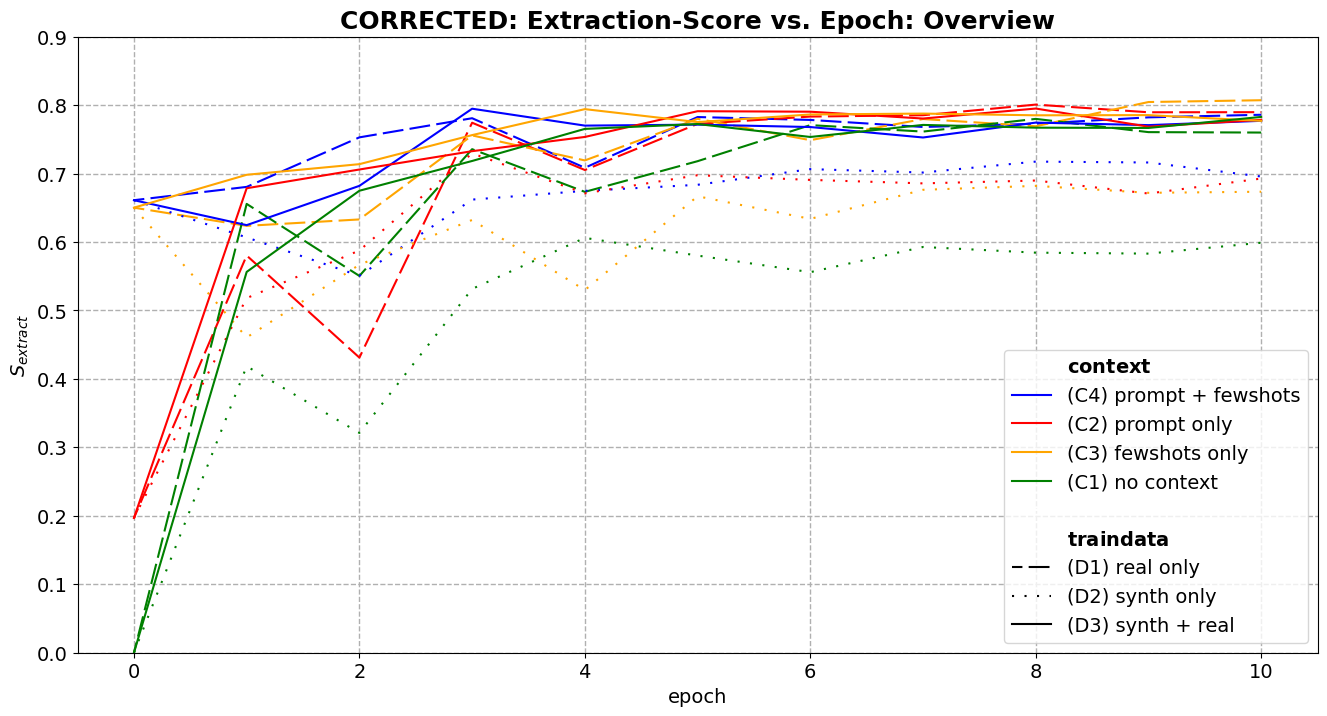

In [48]:
# OVERVIEW PLOT

plot_df=series_df[series_df['dataset_id'].isin([9,10,11])].copy()      
plot_df['context_styledict']=plot_df.apply(get_context_styledict,axis=1)
plot_df['traindata_styledict']=plot_df.apply(get_traindata_styledict,axis=1)

plot=get_score_epoch_plot(plot_df, 'CORRECTED: Extraction-Score vs. Epoch: Overview')
#plot.savefig("figs/scores_overview.png", dpi=300, bbox_inches="tight")
#plot.show()

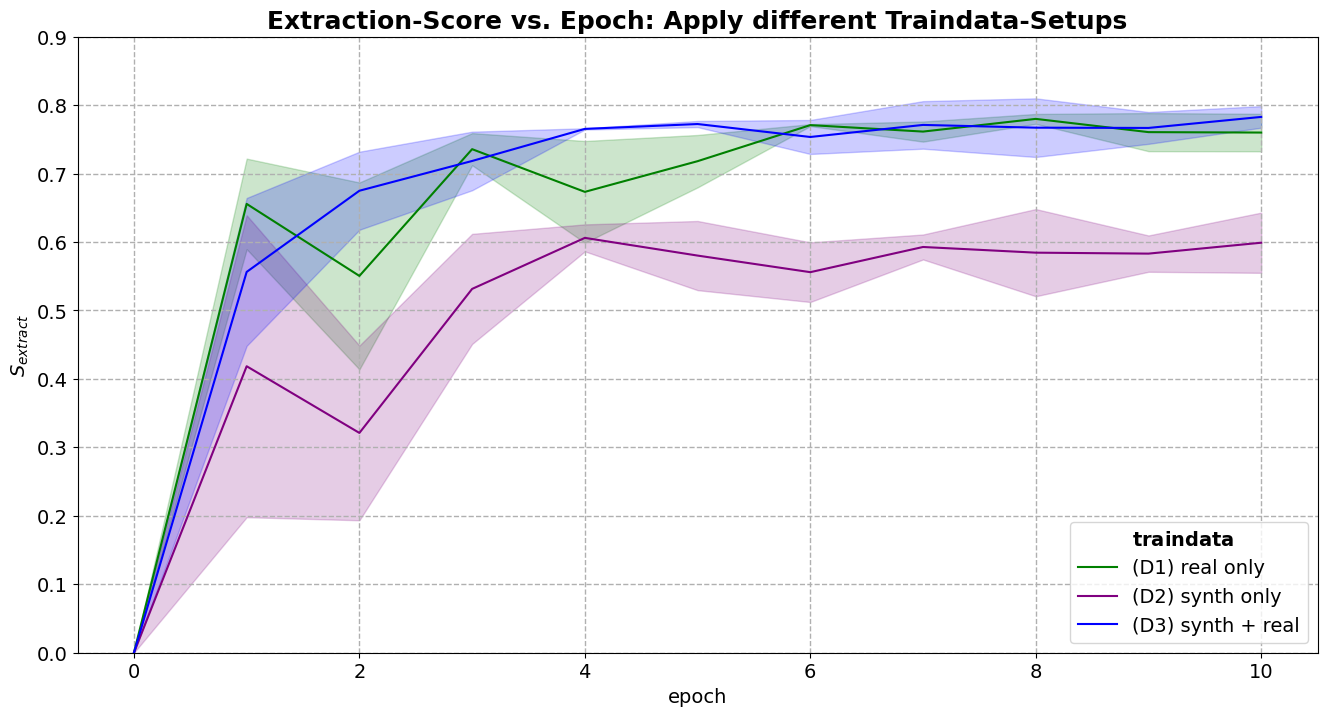

In [19]:
# TRAINDATA PLOT

plot_df=series_df[
    (series_df['use_extraction_prompt']==False) &
    (series_df['use_few_shots']==False)
    ].copy()

plot_df['traindata_styledict']=plot_df.apply(get_traindata_styledict,axis=1)
plot=get_score_epoch_plot(plot_df, 'Extraction-Score vs. Epoch: Apply different Traindata-Setups')
plot.savefig("figs/scores_traindata.png", dpi=300, bbox_inches="tight")
#plot.show()

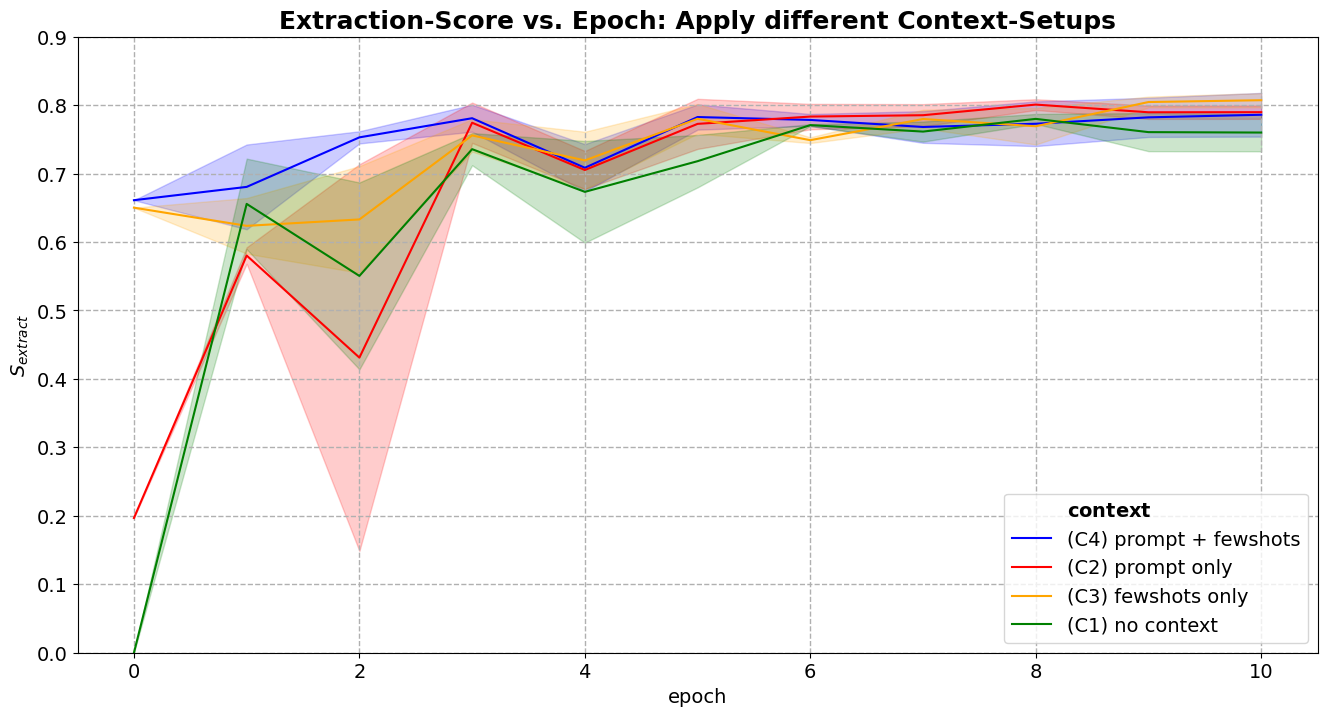

In [20]:
# CONTEXT PLOT
plot_df=series_df[series_df['dataset_id'].isin([9])].copy()      
plot_df['context_styledict']=plot_df.apply(get_context_styledict,axis=1)

plot=get_score_epoch_plot(plot_df, 'Extraction-Score vs. Epoch: Apply different Context-Setups')
plot.savefig("figs/scores_context.png", dpi=300, bbox_inches="tight")

In [37]:
plot.savefig("figs/scores_overview.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

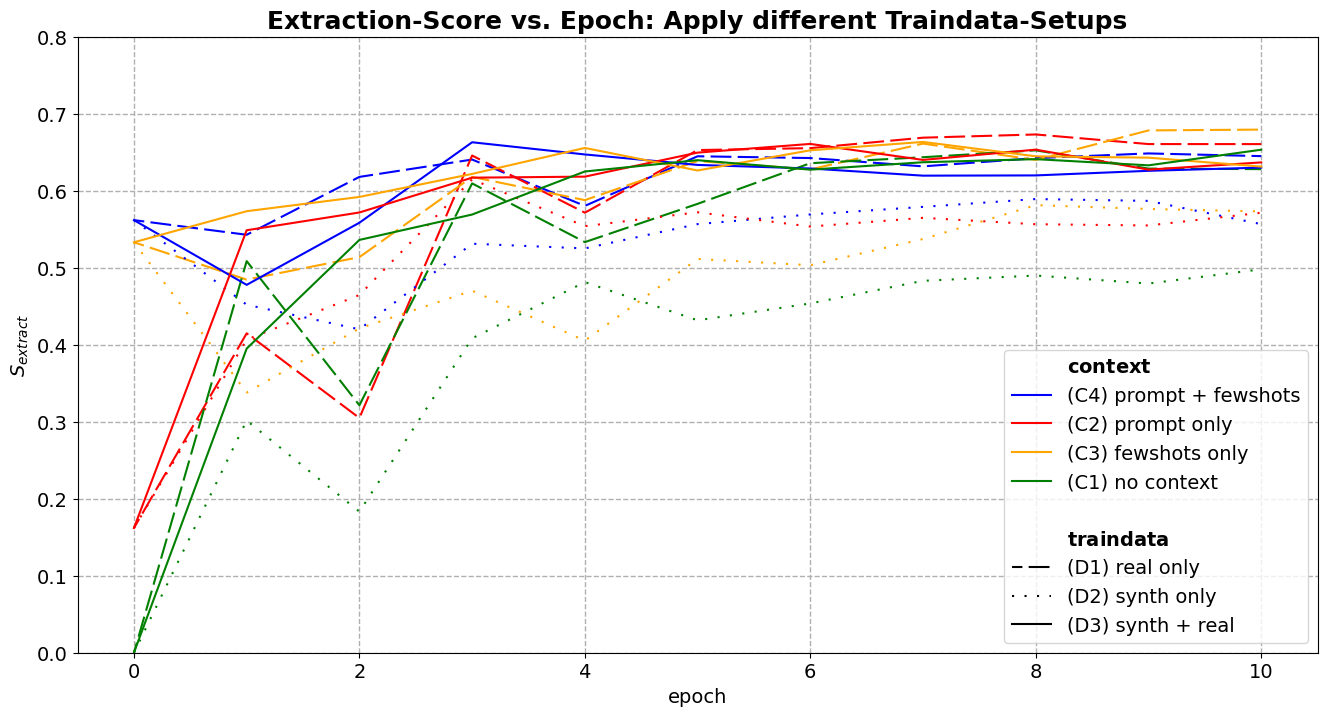

In [29]:
import matplotlib.pyplot as plt



plt.figure(figsize=(16, 8))

for i,plot_row in plot_df.iterrows():

    y_mean=np.array(plot_row[f"{y_col}_mean"])
    y_std=np.array(plot_row[f"{y_col}_std"])

    plt.plot(plot_row[x_col],y_mean,**plot_row['styledict'])
    #plt.fill_between(plot_row[x_col], y_mean - y_std, y_mean + y_std, color=plot_row['styledict']['color'], alpha=0.2, label='dispersion')

plt.xticks(fontsize=AX_FONTSIZE)
plt.yticks(fontsize=AX_FONTSIZE)

plt.legend(
    handles=get_handles(plot_df),
    #loc='upper left',
    #bbox_to_anchor=(1, 1.0,0.0,0.0),
    ncol=1,
    fontsize=AX_FONTSIZE
    )

plt.grid(axis='x', which='major', linestyle='--', linewidth='1.0') #for presentation linewidth='2.0' better
plt.grid(axis='y', which='major', linestyle='--', linewidth='1.0')
plt.grid(axis='y', which='minor', linestyle=':', linewidth='1.0')

plt.ylim(0,0.8)

plt.title(plot_title,fontweight='bold',fontsize=TITLE_FONTSIZE)
#plt.title('Extraction-Score vs. Epoch: Overview',fontweight='bold',fontsize=20)

plt.xlabel(x_col,fontsize=AX_FONTSIZE)
plt.ylabel(r"$\mathit{S_{extract}}$",fontsize=AX_FONTSIZE)
#plt.ylabel(y_col,fontsize=16)

#plt.pause(0.1)  # Let Matplotlib update the figure (optional)
plt.savefig("figs/scores_overview.png", dpi=300, bbox_inches="tight")
plt.show()

#längere dashes, mehr abstand
# linienstärke

## Evaluate Schemes

In [7]:
evals_df=pd.read_pickle(get_timestamp_sorted_fns(name_pattern=r".*evals_df.pkl")[-1])

use_cols=[
    'num_observations', 'strat', 'report_passage', 'filename_new', 'obs_ids', 'gold_completion',
    'split', 'is_real', 'pred_completion', 'pred_json',
    'pred_is_valid', 'pred_is_empty', 
    'global_step','epoch',
    'dataset_id','extractor_id', 'experiment_id', 'seed',
    'obs:P','obs:R', 'obs:F1', 'obs:ACC', 'obs:BER', 'attr:P', 'attr:R', 'attr:F1','attr:ACC', 'attr:BER', 'total_score'
    ]

evals_df=evals_df[[c for c in use_cols if c in evals_df.columns]]
evals_df

,strat,report_passage,gold_completion,pred_completion,pred_is_valid,global_step,epoch,dataset_id,extractor_id,experiment_id,...,obs:R,obs:F1,obs:ACC,obs:BER,attr:P,attr:R,attr:F1,attr:ACC,attr:BER,total_score
0,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.892604,0.892604,0.892604,0.946302,0.053698,0.892604
1,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"```json\n{\n ""meta_scientific_name"": ""Andrena...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.970809,0.970809,0.970809,0.986447,0.014596,0.970809
2,1,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_location"": ""Schleswig-Hols...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.678922,0.678922,0.678922,0.790967,0.223039,0.678922
3,1,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_scientific_name"": ""Osmia c...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,1,"""\nFAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/202...","```json\n{\n ""meta_location"": ""Schleswig-Hols...","```json\n{\n ""observations"": [\n {\n ...",1,0,0,9,1,58,...,1.000000,1.000000,1.000000,0.500000,0.928860,0.796165,0.857409,0.898083,0.101917,0.857409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,9,"Der »Bienenstern« (Bidens ferulifolia), die Ba...","```json\n{\n ""meta_date"": ""1. Mai 2021"",\n ""...","```json\n{\n ""meta_date"": ""Mai 2021"",\n ""met...",1,700,10,11,4,93,...,0.777778,0.875000,0.777778,0.611111,0.738540,0.602493,0.663616,0.774436,0.257087,0.580664
11876,10,Neue Bienenart in Österreich entdeckt\nIn der ...,"```json\n{\n ""observations"": [\n {\n ...","```json\n{\n ""meta_scientific_name"": ""Icteran...",1,700,10,11,4,93,...,1.000000,1.000000,1.000000,0.500000,0.820331,0.984397,0.894907,0.922999,0.063357,0.894907
11877,11,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""meta_location"": ""Nordrhein-West...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1,700,10,11,4,93,...,1.000000,1.000000,1.000000,0.500000,0.998870,0.998870,0.998870,0.999758,0.000565,0.998870
11878,11,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""meta_location"": ""Nordrhein-West...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1,700,10,11,4,93,...,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [22]:
honey_df=evals_df[
    (evals_df['epoch'].isin([0,10])) &
    (evals_df['dataset_id'].isin([9])) &
    (evals_df['extractor_id'].isin([3]))
    ].copy()

honey_df=honey_df[['epoch','obs:P','attr:P','obs:R','attr:R','total_score']].groupby(['epoch']).agg('mean').reset_index()
honey_df['P']=honey_df['obs:P']*honey_df['attr:P']
honey_df['R']=honey_df['obs:R']*honey_df['attr:R']

def get_honey_styledict(row):

    style_dict=dict()
    if row['epoch']==0:
        style_dict['label'] = 'base model'
        style_dict['color'] = mcolors.to_rgb('red')
    
    elif row['epoch']==10:
        style_dict['label'] = 'LoRA model'
        style_dict['color'] = mcolors.to_rgb('blue')

    return style_dict



honey_df['styledict']=honey_df.apply(get_honey_styledict,axis=1)
honey_df

,epoch,obs:P,attr:P,obs:R,attr:R,total_score,P,R,styledict
0,0,0.890000,0.719438,0.801108,0.703341,0.650253,0.640299,0.563452,"{'label': 'base model', 'color': (1.0, 0.0, 0.0)}"
1,10,0.898408,0.844344,0.920210,0.819247,0.807223,0.758565,0.753880,"{'label': 'LoRA model', 'color': (0.0, 0.0, 1.0)}"


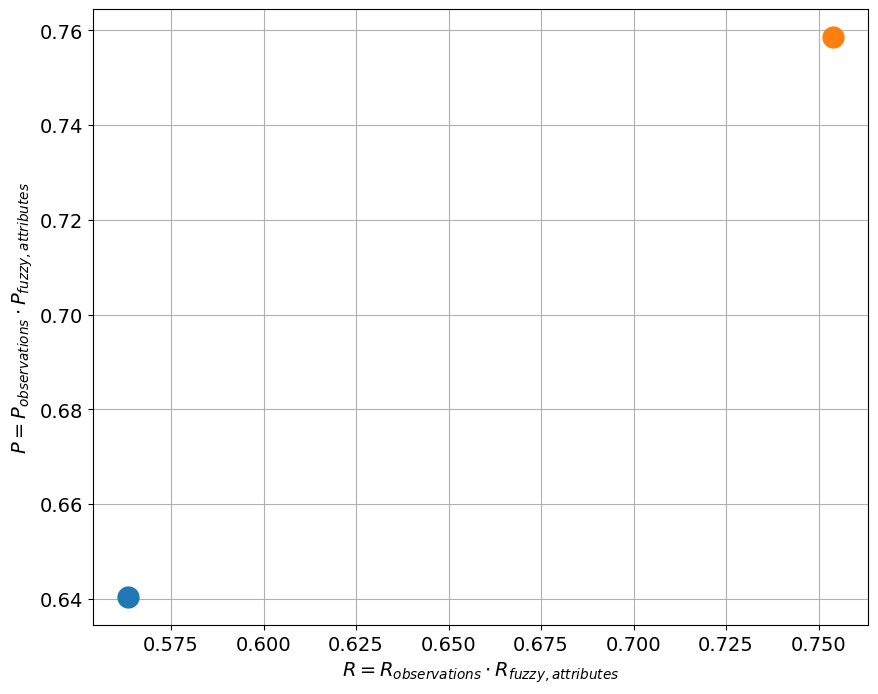

,epoch,obs:P,attr:P,obs:R,attr:R,total_score,P,R,styledict
0,0,0.890000,0.719438,0.801108,0.703341,0.650253,0.640299,0.563452,"{'label': 'base model', 'color': (1.0, 0.0, 0.0)}"
1,10,0.898408,0.844344,0.920210,0.819247,0.807223,0.758565,0.753880,"{'label': 'LoRA model', 'color': (0.0, 0.0, 1.0)}"


In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

TITLE_FONTSIZE=18
AX_FONTSIZE=14

plt.figure(figsize=(10, 8))

for i, row in honey_df.iterrows():
    plt.plot(row.R, row.P, markersize=10, **row.styledict)
    plt.plot(row.R, row.P, marker='o', markersize=15)

#plt.title('Precision-Recall: Report-Schemes',fontweight='bold', fontsize=TITLE_FONTSIZE)
plt.xlabel(r"$\mathit{R = R_{observations} \cdot R_{fuzzy, attributes}}$", fontsize=AX_FONTSIZE)

plt.xticks(fontsize=AX_FONTSIZE)
plt.yticks(fontsize=AX_FONTSIZE)

#plt.xlim(0,1)
#plt.ylabel('Precision [obs:P * attr:P]')
plt.ylabel(r"$\mathit{P = P_{observations} \cdot P_{fuzzy, attributes}}$", fontsize=AX_FONTSIZE)
#plt.ylim(0,1)
plt.grid()

#plt.savefig("figs/pr_honey.png", dpi=300, bbox_inches="tight")
plt.show()

honey_df

In [ ]:
schemes_df=evals_df[
    (evals_df['epoch'].isin([10])) &
    (evals_df['dataset_id'].isin([9])) &
    #(evals_df['extractor_id'].isin([3]))
    ].copy()


def get_report_scheme(strat):
    scheme=None
    
    if strat in [1,2,3,5]: scheme='paragraphs'
    elif strat in [7,9,10]: scheme='continuous'
    elif strat in [11]: scheme='list_table'
    return scheme

def get_scheme_styledict(scheme_row):

    styledict=dict()

    if scheme_row['report_scheme']=='paragraphs': styledict['marker']=r'$P$'
    elif scheme_row['report_scheme']=='continuous': styledict['marker']=r'$C$'
    elif scheme_row['report_scheme']=='list_table': styledict['marker']=r'$L$'

    if scheme_row['extractor_id']==1: styledict['color']=mcolors.to_rgb('blue')
    elif scheme_row['extractor_id']==2: styledict['color']=mcolors.to_rgb('red')
    elif scheme_row['extractor_id']==3: styledict['color']=mcolors.to_rgb('orange')
    elif scheme_row['extractor_id']==4: styledict['color']=mcolors.to_rgb('green')

    if scheme_row['dataset_id']==9: styledict['frame_marker']='o'
    elif scheme_row['dataset_id']==10: styledict['frame_marker']='D'
    elif scheme_row['dataset_id']==11: styledict['frame_marker']='s'

    return styledict


schemes_df['report_scheme']=schemes_df['strat'].apply(get_report_scheme)
use_cols=[
    'report_scheme','epoch',
    'dataset_id','extractor_id', 'experiment_id',
    'pred_is_valid', 'pred_is_empty',
    'obs:P','obs:R', 'obs:F1', 'obs:ACC', 'obs:BER', 'attr:P', 'attr:R', 'attr:F1','attr:ACC', 'attr:BER', 'total_score'
    ]

schemes_df=schemes_df[[c for c in use_cols if c in schemes_df.columns]].groupby(['report_scheme','dataset_id','extractor_id']).agg('mean').reset_index()
schemes_df['P']=schemes_df['obs:P']*schemes_df['attr:P']
schemes_df['R']=schemes_df['obs:R']*schemes_df['attr:R']
schemes_df=schemes_df[['report_scheme','dataset_id','extractor_id','P','R','total_score']]

schemes_df['styledict']=schemes_df.apply(get_scheme_styledict,axis=1)
schemes_df


,report_scheme,dataset_id,extractor_id,P,R,total_score,styledict
0,continuous,9,3,0.507670,0.401042,0.536305,"{'marker': '$C$', 'color': (1.0, 0.64705882352..."
1,list_table,9,3,0.827706,0.628376,0.658294,"{'marker': '$L$', 'color': (1.0, 0.64705882352..."
2,paragraphs,9,3,0.740932,0.740831,0.793782,"{'marker': '$P$', 'color': (1.0, 0.64705882352..."


In [36]:
test_df=BaseDataset(9).get_df_splits('test')
test_df['report_scheme']=test_df['strat'].apply(get_report_scheme)
test_df['n_obs']=test_df['gold_json'].apply(lambda x: len(x['observations']))
test_df

2025-02-21 08:40:01,837 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split,report_scheme,n_obs
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test,paragraphs,7
7,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena angustior (K...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test,paragraphs,2
10,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,2
14,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Osmia cornuta (Latre...,"```json\n{\n ""meta_scientific_name"": ""Osmia c...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,7
18,"""\nFAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/202...",1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,4
20,Funde in Schleswig-Holstein:\n\nColletes heder...,1,{'meta_scientific_name': 'Colletes hederae Sch...,"```json\n{\n ""meta_scientific_name"": ""Collete...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,8
22,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,5
23,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Hylaeus cornutus Cur...,"```json\n{\n ""meta_scientific_name"": ""Hylaeus...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,9
28,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'meta_...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,4
32,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Halictus sexcinctus ...,"```json\n{\n ""meta_scientific_name"": ""Halictu...",2024,https://www.researchgate.net/profile/Michael-K...,True,test,paragraphs,11


In [47]:
test_df[test_df.n_obs==1]

,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split,report_scheme,n_obs
48,Im Rahmen von Gutachten und Erfassungen konnte...,2,{'observations': [{'scientific_name': 'Nomada ...,"```json\n{\n ""observations"": [\n {\n ...",2017,https://www.zobodat.at/pdf/Ampulex_9_0036-0040...,True,test,paragraphs,1
68,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",5,{'observations': [{'scientific_name': 'Biastes...,"```json\n{\n ""observations"": [\n {\n ...",2003,https://www.zobodat.at/pdf/Beitr-Natkde-Nieder...,True,test,paragraphs,1
76,Zur lauenburgischen Bienenfauna\nVon Walther E...,7,{'observations': [{'scientific_name': 'Osmia c...,"```json\n{\n ""observations"": [\n {\n ...",1954,https://www.zobodat.at/pdf/Faun-Oekol-Mitt_1_4...,True,test,continuous,1
89,Neue Bienenart in Österreich entdeckt\nIn der ...,10,{'observations': [{'scientific_name': 'Icteran...,"```json\n{\n ""observations"": [\n {\n ...",2020,https://www.wildbienenwelt.de/aktuelles/articl...,True,test,continuous,1


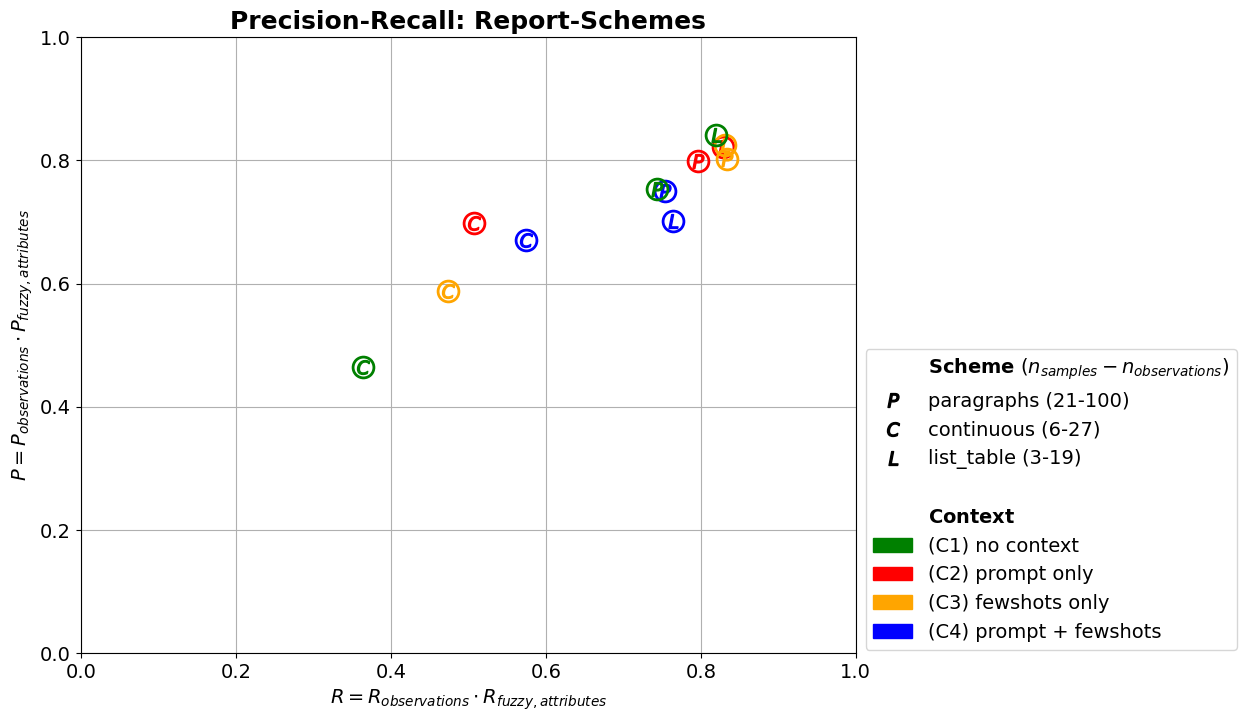

In [37]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from adjustText import adjust_text

TITLE_FONTSIZE=18
AX_FONTSIZE=14

plt.figure(figsize=(10, 8))

for i, row in schemes_df.iterrows():

    frame_marker=row.styledict.pop('frame_marker')

    plt.plot(row.R, row.P, markersize=10, **row.styledict)
    plt.plot(row.R, row.P, marker=frame_marker, markersize=15, markerfacecolor='none', markeredgecolor=row.styledict['color'], markeredgewidth=2)

handles=[]
handles.append(Patch(color=mcolors.to_rgb('white'), label=r"$\bf{Scheme}$ $(n_{samples}-n_{observations})$"))

for marker, scheme in zip(['$P$','$C$','$L$'],['paragraphs','continuous','list_table']):

    n_reports=len(test_df[test_df['report_scheme']==scheme])
    n_obs=test_df[test_df['report_scheme']==scheme]['n_obs'].sum()
    label=f'{scheme} ({n_reports}-{n_obs})'

    handles.append(mlines.Line2D([],[], linestyle='none', marker=marker, markersize=10, color=mcolors.to_rgb('black'), label=label))

# handles.append(mlines.Line2D([],[], linestyle='none', marker='$P$', markersize=10, color=mcolors.to_rgb('black'), label='paragraphs'))
# handles.append(mlines.Line2D([],[], linestyle='none', marker='$C$', markersize=10, color=mcolors.to_rgb('black'), label='continuous'))
# handles.append(mlines.Line2D([],[], linestyle='none', marker='$L$', markersize=10, color=mcolors.to_rgb('black'), label='list-table'))

handles.append(mlines.Line2D([],[], linestyle='none'))
handles.append(Patch(color=mcolors.to_rgb('white'), label=r"$\bf{"+'Context'+r"}$"))
handles.append(Patch(color=mcolors.to_rgb('green'), label='(C1) no context'))
handles.append(Patch(color=mcolors.to_rgb('red'), label='(C2) prompt only'))
handles.append(Patch(color=mcolors.to_rgb('orange'), label='(C3) fewshots only'))
handles.append(Patch(color=mcolors.to_rgb('blue'), label='(C4) prompt + fewshots'))


# handles.append(mlines.Line2D([],[], linestyle='none'))
# handles.append(Patch(color=mcolors.to_rgb('white'), label=r"$\bf{"+'Traindata'+r"}$"))
# handles.append(mlines.Line2D([],[], linestyle='none', marker='o', markersize=10, markerfacecolor='none', markeredgecolor=mcolors.to_rgb('black'), label='real only'))
# handles.append(mlines.Line2D([],[], linestyle='none', marker='s', markersize=10, markerfacecolor='none', markeredgecolor=mcolors.to_rgb('black'), label='synth only'))
# handles.append(mlines.Line2D([],[], linestyle='none', marker='D', markersize=10, markerfacecolor='none', markeredgecolor=mcolors.to_rgb('black'), label='synth + real'))

plt.legend(
    handles=handles,
    loc='center left',
    bbox_to_anchor=(1.0, 0.25),
    #loc ='lower right',
    ncol=1,
    fontsize=AX_FONTSIZE
    )

plt.title('Precision-Recall: Report-Schemes',fontweight='bold', fontsize=TITLE_FONTSIZE)
#plt.title('(real training data, epoch 10)',fontsize=TITLE_FONTSIZE)
#plt.xlabel('Recall [obs:R * attr:R]')
plt.xlabel(r"$\mathit{R = R_{observations} \cdot R_{fuzzy, attributes}}$", fontsize=AX_FONTSIZE)

plt.xticks(fontsize=AX_FONTSIZE)
plt.yticks(fontsize=AX_FONTSIZE)

plt.xlim(0,1)
#plt.ylabel('Precision [obs:P * attr:P]')
plt.ylabel(r"$\mathit{P = P_{observations} \cdot P_{fuzzy, attributes}}$", fontsize=AX_FONTSIZE)
plt.ylim(0,1)
plt.grid()

plt.savefig("figs/pr_schemes.png", dpi=300, bbox_inches="tight")
plt.show()

## Evaluate Errors

In [239]:
reimport()

In [240]:
overview_df=ExtractionExperiment.get_overview(keypaths=['done','use_extraction_prompt','use_few_shots','dataset_config.remarks','seed','name_or_path','timestamp_init'])
overview_df=overview_df[overview_df.done==True]
#overview_df=overview_df[overview_df.id.isin([64, 76, 88])]
overview_df=overview_df[overview_df.id>=58]
overview_df.reset_index(drop=True,inplace=True)
overview_df

,id,name,done,use_extraction_prompt,use_few_shots,remarks,seed,name_or_path,timestamp_init
0,58,0058_extraction_experiment,True,True,True,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
1,59,0059_extraction_experiment,True,True,True,100 synthetic samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
2,60,0060_extraction_experiment,True,True,True,100 real samples + 70 synthetic samples (train...,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
3,61,0061_extraction_experiment,True,True,False,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
4,62,0062_extraction_experiment,True,True,False,100 synthetic samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
5,63,0063_extraction_experiment,True,True,False,100 real samples + 70 synthetic samples (train...,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
6,64,0064_extraction_experiment,True,False,True,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
7,65,0065_extraction_experiment,True,False,True,100 synthetic samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
8,66,0066_extraction_experiment,True,False,True,100 real samples + 70 synthetic samples (train...,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10
9,67,0067_extraction_experiment,True,False,False,100 real samples,2,meta-llama/Meta-Llama-3.1-8B-Instruct,2025-01-08_13-26-10


In [21]:
from multiprocessing import Lock, Pool

def fetch_errors_df(experiment_row):
    experiment=ExtractionExperiment(experiment_row.id)
    callbacks_df=experiment.get_callbacks_df()
    callbacks_df['epoch']=(callbacks_df['global_step'] != callbacks_df['global_step'].shift()).cumsum()-1

    callbacks_df=callbacks_df[['strat','report_passage','pred_completion','gold_completion','global_step','epoch']]

    config_dict=experiment.get_config()

    errors_df=eval_pipe.get_errors_df(callbacks_df.copy())
    errors_df['dataset_id']=config_dict['dataset_config']['id']
    errors_df['extractor_id']=config_dict['extractor_config']['id']
    errors_df['use_extraction_prompt']=get_dict_value(config_dict,'use_extraction_prompt')
    errors_df['seed']=get_dict_value(config_dict,'seed')
    errors_df['use_few_shots']=get_dict_value(config_dict,'use_few_shots')
    errors_df['name_or_path']=get_dict_value(config_dict,'name_or_path')
    errors_df['experiment_id']=config_dict['id']

    
    return errors_df.to_dict(orient='records')

eval_pipe=EvaluationPipeline()

with Pool(processes=min(len(overview_df),os.cpu_count())) as executor:
    errors_data = executor.map(fetch_errors_df, [row for _, row in overview_df.iterrows()])

errors_df=pd.DataFrame([item for sublist in errors_data for item in sublist])


fn=f"{get_timestamp()}_errors_df.pkl"
errors_df.to_pickle(fn)
display(errors_df, clear=True)
print(f"Saved as {fn}")


,i,m,g,p,key,fuzzy_score,gold_val,pred_val,type,is_error,global_step,epoch,dataset_id,extractor_id,use_extraction_prompt,seed,use_few_shots,name_or_path,experiment_id
0,0,1.0,3.0,3.0,scientific_name,1.000000,"Sphecodes rufiventris (PANZER, 1798)","Sphecodes rufiventris (PANZER, 1798)",tp_val,False,0.0,0.0,9,1,True,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,58
1,0,1.0,3.0,3.0,date,1.000000,20.8.1996,20.8.1996,tp_val,False,0.0,0.0,9,1,True,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,58
2,0,1.0,3.0,3.0,location,0.714286,"Brandenburg, Libbenichen, MTB 3552",Libbenichen - MTB 3552,tp_val,True,0.0,0.0,9,1,True,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,58
3,0,1.0,3.0,3.0,n_males,1.000000,None,None,tn_val,False,0.0,0.0,9,1,True,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,58
4,0,1.0,3.0,3.0,n_females,1.000000,1,1,tp_val,False,0.0,0.0,9,1,True,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781089,329,NaN,3.0,NaN,date,0.000000,NaN,3. bis 8. Juni,fn_obs:fn_val,True,700.0,10.0,11,4,False,8,False,meta-llama/Meta-Llama-3.1-8B-Instruct,93
781090,329,NaN,3.0,NaN,location,0.000000,NaN,"Lüneburger Heide, bei Nieder-Haverbeck",fn_obs:fn_val,True,700.0,10.0,11,4,False,8,False,meta-llama/Meta-Llama-3.1-8B-Instruct,93
781091,329,NaN,3.0,NaN,n_males,0.000000,NaN,1,fn_obs:fn_val,True,700.0,10.0,11,4,False,8,False,meta-llama/Meta-Llama-3.1-8B-Instruct,93
781092,329,NaN,3.0,NaN,coll,0.000000,NaN,Schröder,fn_obs:fn_val,True,700.0,10.0,11,4,False,8,False,meta-llama/Meta-Llama-3.1-8B-Instruct,93


Saved as 2025-02-21_09-37-11_errors_df.pkl


In [22]:
errors_df=pd.read_pickle(get_timestamp_sorted_fns(name_pattern=r".*errors_df.pkl")[-1])

errors_df=errors_df[
    (errors_df.epoch==10) 
    #& (errors_df.experiment_id==55)
    & (errors_df.use_extraction_prompt==False)
    & (errors_df.use_few_shots==True)
    & (errors_df.dataset_id==9)
    ]

errors_df['base_key']=errors_df['key'].apply(lambda x: x.replace('meta_',''))
errors_df['is_none']=errors_df.apply(lambda x: (x.gold_val == None) and (x.pred_val == None), axis=1)
errors_df

,i,m,g,p,key,fuzzy_score,gold_val,pred_val,type,is_error,...,epoch,dataset_id,extractor_id,use_extraction_prompt,seed,use_few_shots,name_or_path,experiment_id,base_key,is_none
154137,300,1.0,0.0,0.0,scientific_name,1.0,"Sphecodes rufiventris (PANZER, 1798)","Sphecodes rufiventris (PANZER, 1798)",tp_val,False,...,10.0,9,3,False,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,scientific_name,False
154138,300,1.0,0.0,0.0,date,1.0,25.VII.1992,25.VII.1992,tp_val,False,...,10.0,9,3,False,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,date,False
154139,300,1.0,0.0,0.0,location,1.0,"Brandenburg, Lebus, MTB 3533","Brandenburg, Lebus, MTB 3533",tp_val,False,...,10.0,9,3,False,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,location,False
154140,300,1.0,0.0,0.0,n_males,1.0,None,None,tn_val,False,...,10.0,9,3,False,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,n_males,True
154141,300,1.0,0.0,0.0,n_females,1.0,1,1,tp_val,False,...,10.0,9,3,False,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,n_females,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677635,329,NaN,6.0,NaN,n_males,0.0,NaN,sehr häufig,fn_obs:fn_val,True,...,10.0,9,3,False,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,n_males,False
677636,329,NaN,6.0,NaN,n_females,0.0,NaN,sehr häufig,fn_obs:fn_val,True,...,10.0,9,3,False,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,n_females,False
677637,329,NaN,6.0,NaN,coll,0.0,NaN,Schröder,fn_obs:fn_val,True,...,10.0,9,3,False,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,coll,False
677638,329,NaN,6.0,NaN,habitat,0.0,NaN,sehr häufig,fn_obs:fn_val,True,...,10.0,9,3,False,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,habitat,False


### Attribute Errors

In [23]:
keys_data=[]

for i,key in enumerate(errors_df.base_key.unique()):
    df=errors_df[errors_df.base_key==key]

    tp = len(df[df['type'].str.contains('tp')])
    fp = len(df[df['type'].str.contains('fp')])
    fn = len(df[df['type'].str.contains('fn')])
    tn = len(df[df['type'].str.contains('tn')])

    if key in ['observations']: continue

    if key not in ['observations']: 
        tp_fuzzy=df[df['type'].str.contains('tp')]['fuzzy_score'].sum()
    else: tp_fuzzy=None

    keys_data.append(
        dict(
            i=str(i+1),
            key = key,
            tp=tp,
            tp_fuzzy=tp_fuzzy,
            fp=fp,
            fn=fn,
            tn=tn,
            P=precision(tp,fp,fn,tp_fuzzy=tp_fuzzy),
            R=recall(tp,fp,fn,tp_fuzzy=tp_fuzzy),
            F1=f1_score(tp,fp,fn, tp_fuzzy=tp_fuzzy)
            )
        )

keys_df=pd.DataFrame(keys_data)
keys_df['label']=keys_df.apply(lambda x: f"{x.key} ({x.tp}-{x.tp_fuzzy:.1f}-{x.fp}-{x.fn}-{x.tn})",axis=1)
keys_df

,i,key,tp,tp_fuzzy,fp,fn,tn,P,R,F1,label
0,1,scientific_name,379,379.000000,57,50,0,0.869266,0.883450,0.876301,scientific_name (379-379.0-57-50-0)
1,2,date,379,360.893361,57,50,0,0.827737,0.841243,0.834436,date (379-360.9-57-50-0)
2,3,location,354,329.294081,70,27,7,0.776637,0.864289,0.818122,location (354-329.3-70-27-7)
3,4,n_males,114,103.400000,25,30,255,0.743885,0.718056,0.730742,n_males (114-103.4-25-30-255)
4,5,n_females,231,205.642857,45,39,123,0.745083,0.761640,0.753271,n_females (231-205.6-45-39-123)
5,6,n_queens,12,11.000000,3,3,367,0.733333,0.733333,0.733333,n_queens (12-11.0-3-3-367)
6,7,n_divers,0,0.000000,7,6,377,0.000000,0.000000,0.000000,n_divers (0-0.0-7-6-377)
7,8,leg,225,222.510743,30,3,137,0.872591,0.975924,0.921370,leg (225-222.5-30-3-137)
8,9,coll,225,219.810833,24,37,114,0.882774,0.838973,0.860316,coll (225-219.8-24-37-114)
9,10,det,48,45.071429,34,12,300,0.549652,0.751190,0.634809,det (48-45.1-34-12-300)


In [24]:
import matplotlib.colors as mcolors

key_colors_dict=dict(
    scientific_name=mcolors.to_rgb('darkblue'),
    date=mcolors.to_rgb('darkgreen'),
    location=mcolors.to_rgb('darkorange'),
    n_males=mcolors.to_rgb('brown'),
    n_females=mcolors.to_rgb('chocolate'),
    n_divers=mcolors.to_rgb('darkgoldenrod'),
    n_queens=mcolors.to_rgb('gold'),
    leg=mcolors.to_rgb('mediumspringgreen'),
    coll=mcolors.to_rgb('lime'),
    det=mcolors.to_rgb('turquoise'),
    habitat=mcolors.to_rgb('palegreen'),
    visited_flowers=mcolors.to_rgb('purple'),
    observed_nesting=mcolors.to_rgb('lightpink'),
    collecting_method=mcolors.to_rgb('y'),
    observations=mcolors.to_rgb('black'),
)

In [25]:
epsilon_range = (-0.001, 0.00)
keys_df['P']=keys_df['P']+np.random.uniform(*epsilon_range, size=len(keys_df))
keys_df['R']=keys_df['R']+np.random.uniform(*epsilon_range, size=len(keys_df))

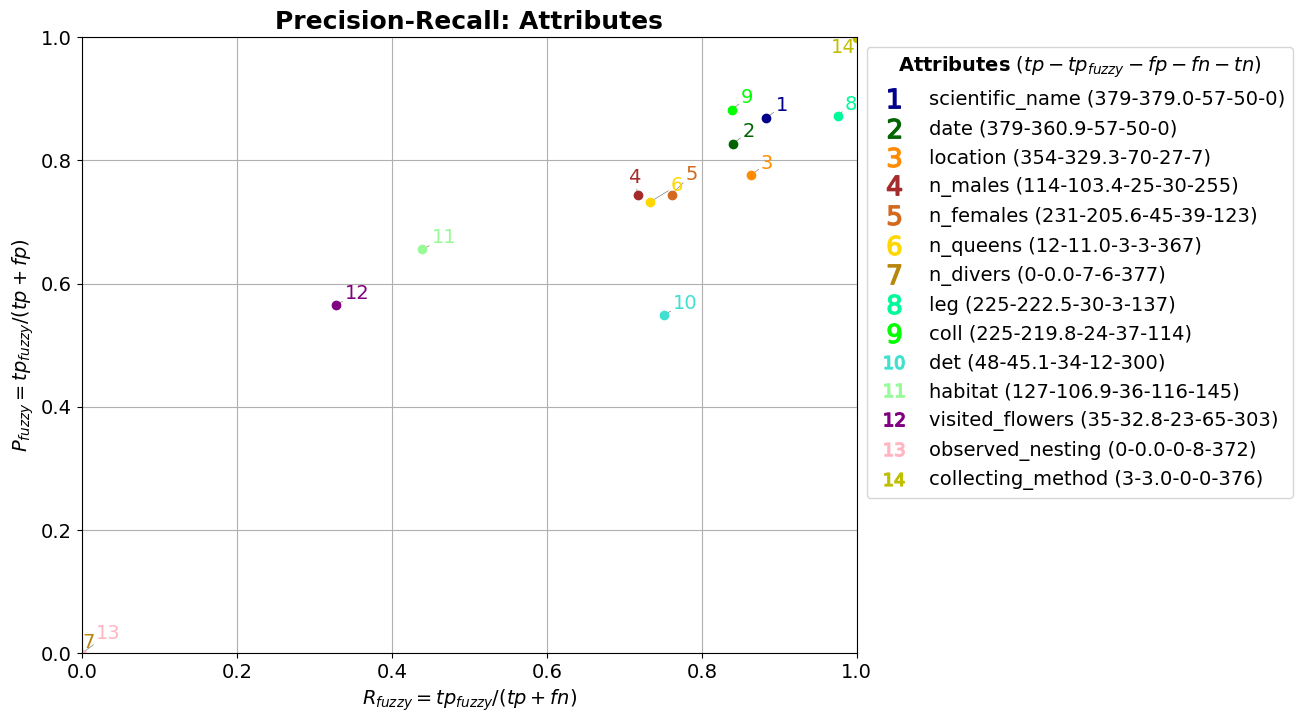

In [26]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(10, 8))

TITLE_FONTSIZE=18
AX_FONTSIZE=14

handles=[]
#handles.append(mlines.Line2D([],[], linestyle='none'))

annotations=[]
for i, key_row in keys_df.iterrows():
    plt.plot(key_row.R, key_row.P, 'o', color=key_colors_dict[key_row['key']], label=key_row['label'])
    handles.append(mlines.Line2D([],[], linestyle='none', marker=f'${key_row['i']}$', markersize=14, color=key_colors_dict[key_row['key']], label=key_row['label']))
    annotations.append(plt.text(key_row.R, key_row.P, key_row['i'], fontsize=AX_FONTSIZE, color=key_colors_dict[key_row['key']]))




legend=plt.legend(
    handles=handles,
    loc='upper left',
    bbox_to_anchor=(1, 1.0,0.0,0.0),
    #loc ='lower right',
    #bbox_to_anchor=(0.5, 0.5),
    #borderaxespad=0.5,
    #title=r'$\textcolor{red}{Quadratic} \, \textcolor{blue}{Function}$',
    title=r"$\bf{Attributes}$ $(tp-tp_{fuzzy}-fp-fn-tn)$",
    #ncol=2,
    fontsize=AX_FONTSIZE,
    )
legend.get_title().set_fontsize(AX_FONTSIZE)

plt.title('Precision-Recall: Attributes', fontweight='bold', fontsize=TITLE_FONTSIZE)
#(real training data, fewshots only, epoch 10)

plt.ylabel(r"$\mathit{P_{fuzzy} = tp_{fuzzy} / (tp + fp)}$", fontsize=AX_FONTSIZE)
plt.xlabel(r"$\mathit{R_{fuzzy} = tp_{fuzzy} / (tp + fn)}$", fontsize=AX_FONTSIZE)

plt.xticks(fontsize=AX_FONTSIZE)
plt.yticks(fontsize=AX_FONTSIZE)

plt.xlim(0,1)
plt.ylim(0,1)

adjust_text(
    annotations,
    arrowprops=dict(arrowstyle="->", color='gray', lw=0.5),  # Optional arrows
    force_explode=(2.2, 1.2),
    ensure_inside_axes=True,
    
    #min_arrow_len=100,
)

plt.grid()

plt.savefig("figs/pr_attributes.png", dpi=300, bbox_inches="tight")
plt.show()


### scientific_names errors

In [38]:
dataset_df=BaseDataset(9).df
dataset_df=dataset_df[dataset_df['split']=='train']
dataset_df

2025-02-21 08:40:53,414 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
1,"Christoph Saure\n\nHoplitis villosa (Schenck, ...",1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
2,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
4,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
5,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Bombus barbutellus (...,"```json\n{\n ""meta_scientific_name"": ""Bombus ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
...,...,...,...,...,...,...,...,...
93,Für das Stadtgebiet Bielefeld nördlich des Te...,11,{'meta_scientific_name': 'Andrena haemorrhoa (...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,train
94,Für das Stadtgebiet Bielefeld nördlich des Te...,11,{'meta_scientific_name': 'Anthophora acervorum...,"```json\n{\n ""meta_scientific_name"": ""Anthoph...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,train
96,Das Naturschutzgebiet „Grubengelände Littfeld“...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,True,train
98,Beobachtungen der Südlichen Holzbiene Xylocopa...,11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,True,train


In [39]:
def get_first_n_words(text, n=2):
    if pd.isna(text): return text
    return ' '.join(re.split(r'[\s,;]',text)[:n]).lower().strip()

names_data=[]
for i, row in dataset_df.iterrows():
    scientific_name_list=tabelize_json(row.gold_json, create_meta_row=False)['scientific_name'].to_list()
    for j,scientific_name in enumerate(scientific_name_list):

        names_data.append(dict(
            scientific_name=scientific_name,
            # i=i,
            # j=j,
        ))


train_names_df=pd.DataFrame(names_data)
train_names_df['scientific_name_norm'] = train_names_df['scientific_name'].apply(get_first_n_words)
train_names_df=train_names_df.groupby('scientific_name_norm').size().reset_index(name='n_train')
train_names_df

,scientific_name_norm,n_train
0,ammobates punctatus,5
1,andrena alfkenella,1
2,andrena anthrisci,2
3,andrena barbilabris,2
4,andrena bicolor,4
...,...,...
122,stelis minima,2
123,thyreus orbatus,2
124,xylocopa valga,7
125,xylocopa violacea,13


In [40]:
def get_first_n_words(text, n=2):
    if pd.isna(text): return text
    return ' '.join(re.split(r'[\s,;]',text)[:n]).lower().strip()

observations_df=errors_df[errors_df.type.isin(['tp_obs','fp_obs','fn_obs'])].copy()
observations_df['gold_scientific_name']=observations_df['gold_val'].apply(lambda x: x['scientific_name'] if isinstance(x,dict) else x)
observations_df['pred_scientific_name']=observations_df['pred_val'].apply(lambda x: x['scientific_name'] if isinstance(x,dict) else x)

observations_df['gold_scientific_name_norm'] = observations_df['gold_scientific_name'].apply(get_first_n_words)
observations_df['pred_scientific_name_norm'] = observations_df['pred_scientific_name'].apply(get_first_n_words)
observations_df=observations_df[observations_df.gold_scientific_name_norm!='honigbiene']

observations_df

,i,m,g,p,key,fuzzy_score,gold_val,pred_val,type,is_error,...,seed,use_few_shots,name_or_path,experiment_id,base_key,is_none,gold_scientific_name,pred_scientific_name,gold_scientific_name_norm,pred_scientific_name_norm
154235,300,1.0,0.0,0.0,observations,1.000000,{'scientific_name': 'Sphecodes rufiventris (PA...,{'scientific_name': 'Sphecodes rufiventris (PA...,tp_obs,False,...,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,observations,False,"Sphecodes rufiventris (PANZER, 1798)","Sphecodes rufiventris (PANZER, 1798)",sphecodes rufiventris,sphecodes rufiventris
154236,300,2.0,1.0,1.0,observations,1.000000,{'scientific_name': 'Sphecodes rufiventris (PA...,{'scientific_name': 'Sphecodes rufiventris (PA...,tp_obs,False,...,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,observations,False,"Sphecodes rufiventris (PANZER, 1798)","Sphecodes rufiventris (PANZER, 1798)",sphecodes rufiventris,sphecodes rufiventris
154237,300,3.0,2.0,2.0,observations,1.000000,{'scientific_name': 'Sphecodes rufiventris (PA...,{'scientific_name': 'Sphecodes rufiventris (PA...,tp_obs,False,...,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,observations,False,"Sphecodes rufiventris (PANZER, 1798)","Sphecodes rufiventris (PANZER, 1798)",sphecodes rufiventris,sphecodes rufiventris
154238,300,4.0,4.0,4.0,observations,1.000000,{'scientific_name': 'Sphecodes rufiventris (PA...,{'scientific_name': 'Sphecodes rufiventris (PA...,tp_obs,False,...,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,observations,False,"Sphecodes rufiventris (PANZER, 1798)","Sphecodes rufiventris (PANZER, 1798)",sphecodes rufiventris,sphecodes rufiventris
154239,300,5.0,3.0,3.0,observations,1.000000,{'scientific_name': 'Sphecodes rufiventris (PA...,{'scientific_name': 'Sphecodes rufiventris (PA...,tp_obs,False,...,2,True,meta-llama/Meta-Llama-3.1-8B-Instruct,64,observations,False,"Sphecodes rufiventris (PANZER, 1798)","Sphecodes rufiventris (PANZER, 1798)",sphecodes rufiventris,sphecodes rufiventris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677627,329,7.0,9.0,8.0,observations,0.913323,"{'scientific_name': 'Epeolus similis Höppn.', ...","{'scientific_name': 'Epeolus similis Höppn.', ...",tp_obs,True,...,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,observations,False,Epeolus similis Höppn.,Epeolus similis Höppn.,epeolus similis,epeolus similis
677628,329,8.0,2.0,2.0,observations,0.922306,{'scientific_name': 'Prosopis brevieornis Nyl....,{'scientific_name': 'Prosopis brevieornis Nyl....,tp_obs,True,...,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,observations,False,Prosopis brevieornis Nyl.,Prosopis brevieornis Nyl.,prosopis brevieornis,prosopis brevieornis
677629,329,9.0,5.0,5.0,observations,0.841894,"{'scientific_name': 'Colletes succinctus L.', ...","{'scientific_name': 'Colletes succinctus L.', ...",tp_obs,True,...,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,observations,False,Colletes succinctus L.,Colletes succinctus L.,colletes succinctus,colletes succinctus
677630,329,10.0,7.0,6.0,observations,0.816180,"{'scientific_name': 'Colletes succinctus L.', ...","{'scientific_name': 'Colletes succinctus L.', ...",tp_obs,True,...,8,True,meta-llama/Meta-Llama-3.1-8B-Instruct,88,observations,False,Colletes succinctus L.,Colletes succinctus L.,colletes succinctus,colletes succinctus


In [41]:
# UNVEIL NORMALIZATION MAPPING
pred_names_df=observations_df[['pred_scientific_name_norm','pred_scientific_name']].copy()
pred_names_df.drop_duplicates(inplace=True)
pred_names_df=pred_names_df.groupby('pred_scientific_name_norm')['pred_scientific_name'].agg(pred_count='count', pred_list=list).sort_values(by='pred_count',ascending=False).reset_index()
pred_names_df.rename(columns={'pred_scientific_name_norm':'scientific_name_norm'},inplace=True)
pred_names_df

gold_names_df=observations_df[['gold_scientific_name_norm','gold_scientific_name']].copy()
gold_names_df.drop_duplicates(inplace=True)
gold_names_df=gold_names_df.groupby('gold_scientific_name_norm')['gold_scientific_name'].agg(gold_count='count', gold_list=list).sort_values(by='gold_count',ascending=False).reset_index()
gold_names_df.rename(columns={'gold_scientific_name_norm':'scientific_name_norm'},inplace=True)
gold_names_df

names_df = pd.merge(pred_names_df, gold_names_df, on='scientific_name_norm', how='outer')
names_df.fillna({'pred_count': 0, 'gold_count': 0}, inplace=True)
names_df['pred_list']=names_df['pred_list'].apply(lambda x: x if isinstance(x,list) else [])
names_df['gold_list']=names_df['gold_list'].apply(lambda x: x if isinstance(x,list) else [])
names_df['list']=names_df.apply(lambda x: sorted(list(set(x['pred_list']+x['gold_list'])),key=len), axis=1)
names_df['count']=names_df['list'].apply(len)
names_df.sort_values(by='count',ascending=False,inplace=True)
names_df.reset_index(drop=True, inplace=True)
names_df

#PRINT NORMALIZATION MAPPING MAPPING
for i,row in names_df[names_df['count']>0].iterrows():
    print(f"{row['scientific_name_norm']}:")
    for variation in row['list']:
        print(f"\t{variation}")
    print('\n\n')


bombus terrestris:
	Bombus terrestris
	Bombus terrestris s. l.



lasioglossum costulatum:
	Lasioglossum costulatum (KRIECHBAUMER 1873)
	Lasioglossum costulatum (Kriechbaumer, 1873)



halictus sexcinctus:
	Halictus sexcinctus
	Halictus sexcinctus (Fabricius, 1775)



andrena fulvago:
	Andrena fulvago (Christ, 1791)



andrena haemorrhoa:
	Andrena haemorrhoa



andrena lagopus:
	Andrena lagopus



andrena mitis:
	Andrena mitis SCHMIEDEKNECHT 1883



andrena niveata:
	Andrena niveata Friese.



andrena propinqua:
	Andrena propinqua Schenck, 1853



andrena angustior:
	Andrena angustior (KIRBY, 1802)



andrena alfkenella:
	Andrena alfkenella Perkins, 1914



andrena tarsata:
	Andrena tarsata NYLANDER 1848



andrena tscheki:
	Andrena tscheki



anthophora plumipes:
	Anthophora plumipes



anthidium punctatum:
	Anthidium punctatum Latreille 1809



bidens ferulifolia:
	Bidens ferulifolia



bombus hortorum:
	Bombus hortorum



bombus hypnorum:
	Bombus hypnorum



biastes truncatus:
	Bias

In [42]:
tp_names_df=observations_df[observations_df.type.str.contains('tp_obs')].groupby('gold_scientific_name_norm').size().reset_index(name='tp')
tp_names_df.rename(columns={'gold_scientific_name_norm':'scientific_name_norm'},inplace=True)

fp_names_df=observations_df[observations_df.type.str.contains('fp_obs')].groupby('pred_scientific_name_norm').size().reset_index(name='fp')
fp_names_df.rename(columns={'pred_scientific_name_norm':'scientific_name_norm'},inplace=True)

fn_names_df=observations_df[observations_df.type.str.contains('fn_obs')].groupby('gold_scientific_name_norm').size().reset_index(name='fn')
fn_names_df.rename(columns={'gold_scientific_name_norm':'scientific_name_norm'},inplace=True)

names_df=pd.merge(tp_names_df,fp_names_df,on='scientific_name_norm',how='outer', )
names_df=pd.merge(names_df,fn_names_df,on='scientific_name_norm',how='outer')
names_df.fillna(0,inplace=True)
names_df[['tp','fp','fn']]=names_df[['tp','fp','fn']].astype(int)
names_df['P']=names_df.apply(lambda x: precision(x.tp,x.fp,x.fn),axis=1)
names_df['R']=names_df.apply(lambda x: recall(x.tp,x.fp,x.fn),axis=1)
names_df['F1']=names_df.apply(lambda x: f1_score(x.tp,x.fp,x.fn),axis=1)
names_df.sort_values(by='scientific_name_norm',ascending=True,inplace=True)
names_df.reset_index(drop=True, inplace=True)

#names_df['label']=names_df.apply(lambda x: f"{x.scientific_name_norm} ({x.tp}-{x.fp}-{x.fn})".ljust(32, " "),axis=1)
names_df['label']=names_df.apply(lambda x: f"{x.scientific_name_norm} ({x.tp}-{x.fp}-{x.fn})",axis=1)

names_df

,scientific_name_norm,tp,fp,fn,P,R,F1,label
0,andrena alfkenella,6,0,0,1.000000,1.000000,1.000000,andrena alfkenella (6-0-0)
1,andrena angustior,6,0,0,1.000000,1.000000,1.000000,andrena angustior (6-0-0)
2,andrena chrysopus,18,1,0,0.947368,1.000000,0.972973,andrena chrysopus (18-1-0)
3,andrena fulvago,6,0,0,1.000000,1.000000,1.000000,andrena fulvago (6-0-0)
4,andrena haemorrhoa,0,0,3,0.000000,0.000000,0.000000,andrena haemorrhoa (0-0-3)
5,andrena lagopus,0,0,3,0.000000,0.000000,0.000000,andrena lagopus (0-0-3)
6,andrena mitis,3,3,0,0.500000,1.000000,0.666667,andrena mitis (3-3-0)
7,andrena niveata,3,0,0,1.000000,1.000000,1.000000,andrena niveata (3-0-0)
8,andrena propinqua,3,0,0,1.000000,1.000000,1.000000,andrena propinqua (3-0-0)
9,andrena strohmella,9,0,0,1.000000,1.000000,1.000000,andrena strohmella (9-0-0)


In [32]:
names_df['label'].apply(len).max()

32

In [43]:
all_names_df=pd.merge(names_df, train_names_df, on='scientific_name_norm', how='outer')
all_names_df.drop(columns=['label'], inplace=True)
all_names_df.fillna(0,inplace=True)
all_names_df['n_test']=all_names_df['tp']+all_names_df['fn']
all_names_df.sort_values(by='scientific_name_norm',ascending=False,inplace=True)
all_names_df.reset_index(drop=True, inplace=True)

all_names_df.n_test=all_names_df.n_test.astype(int)
all_names_df.n_train=all_names_df.n_train.astype(int)
all_names_df

all_names_df

,scientific_name_norm,tp,fp,fn,P,R,F1,n_train,n_test
0,xylopcopa violacea,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,xylocopa violacea,3.0,0.0,0.0,1.0,1.0,1.0,13,3
2,xylocopa valga,0.0,0.0,0.0,0.0,0.0,0.0,7,0
3,thyreus orbatus,0.0,0.0,0.0,0.0,0.0,0.0,2,0
4,stelis minima,0.0,0.0,0.0,0.0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...
163,andrena barbilabris,0.0,0.0,0.0,0.0,0.0,0.0,2,0
164,andrena anthrisci,0.0,0.0,0.0,0.0,0.0,0.0,2,0
165,andrena angustior,6.0,0.0,0.0,1.0,1.0,1.0,0,6
166,andrena alfkenella,6.0,0.0,0.0,1.0,1.0,1.0,1,6


In [62]:
for i,row in all_names_df.iterrows():
    print(row.scientific_name_norm)

ammobates punctatus
andrena alfkenella
andrena angustior
andrena anthrisci
andrena barbilabris
andrena bicolor
andrena bluethgeni
andrena chrysopus
andrena chrysosceles
andrena cineraria
andrena clarkella
andrena congruens
andrena curvungula
andrena denticulata
andrena dorsata
andrena flavipes
andrena florea
andrena floricola
andrena fucata
andrena fulva
andrena fulvago
andrena gravida
andrena haemorrhoa
andrena hattorflana
andrena helvola
andrena labiata
andrena lagopus
andrena lathyri
andrena minutula
andrena mitis
andrena morawitzi
andrena nigroaenea
andrena nitida
andrena niveata
andrena nycthemera
andrena ovatula
andrena praecox
andrena propinqua
andrena proxima
andrena rosae
andrena ruficrus
andrena saxonica
andrena scotica
andrena semilaevis
andrena strohmella
andrena subopaca
andrena tarsata
andrena tscheki
andrena ventralis
andrena viridescens
andrena wilkella
anthidium oblongatum
anthidium punctatum
anthidium strigatum
anthophora acervorum
anthophora furcata
anthophora plumip

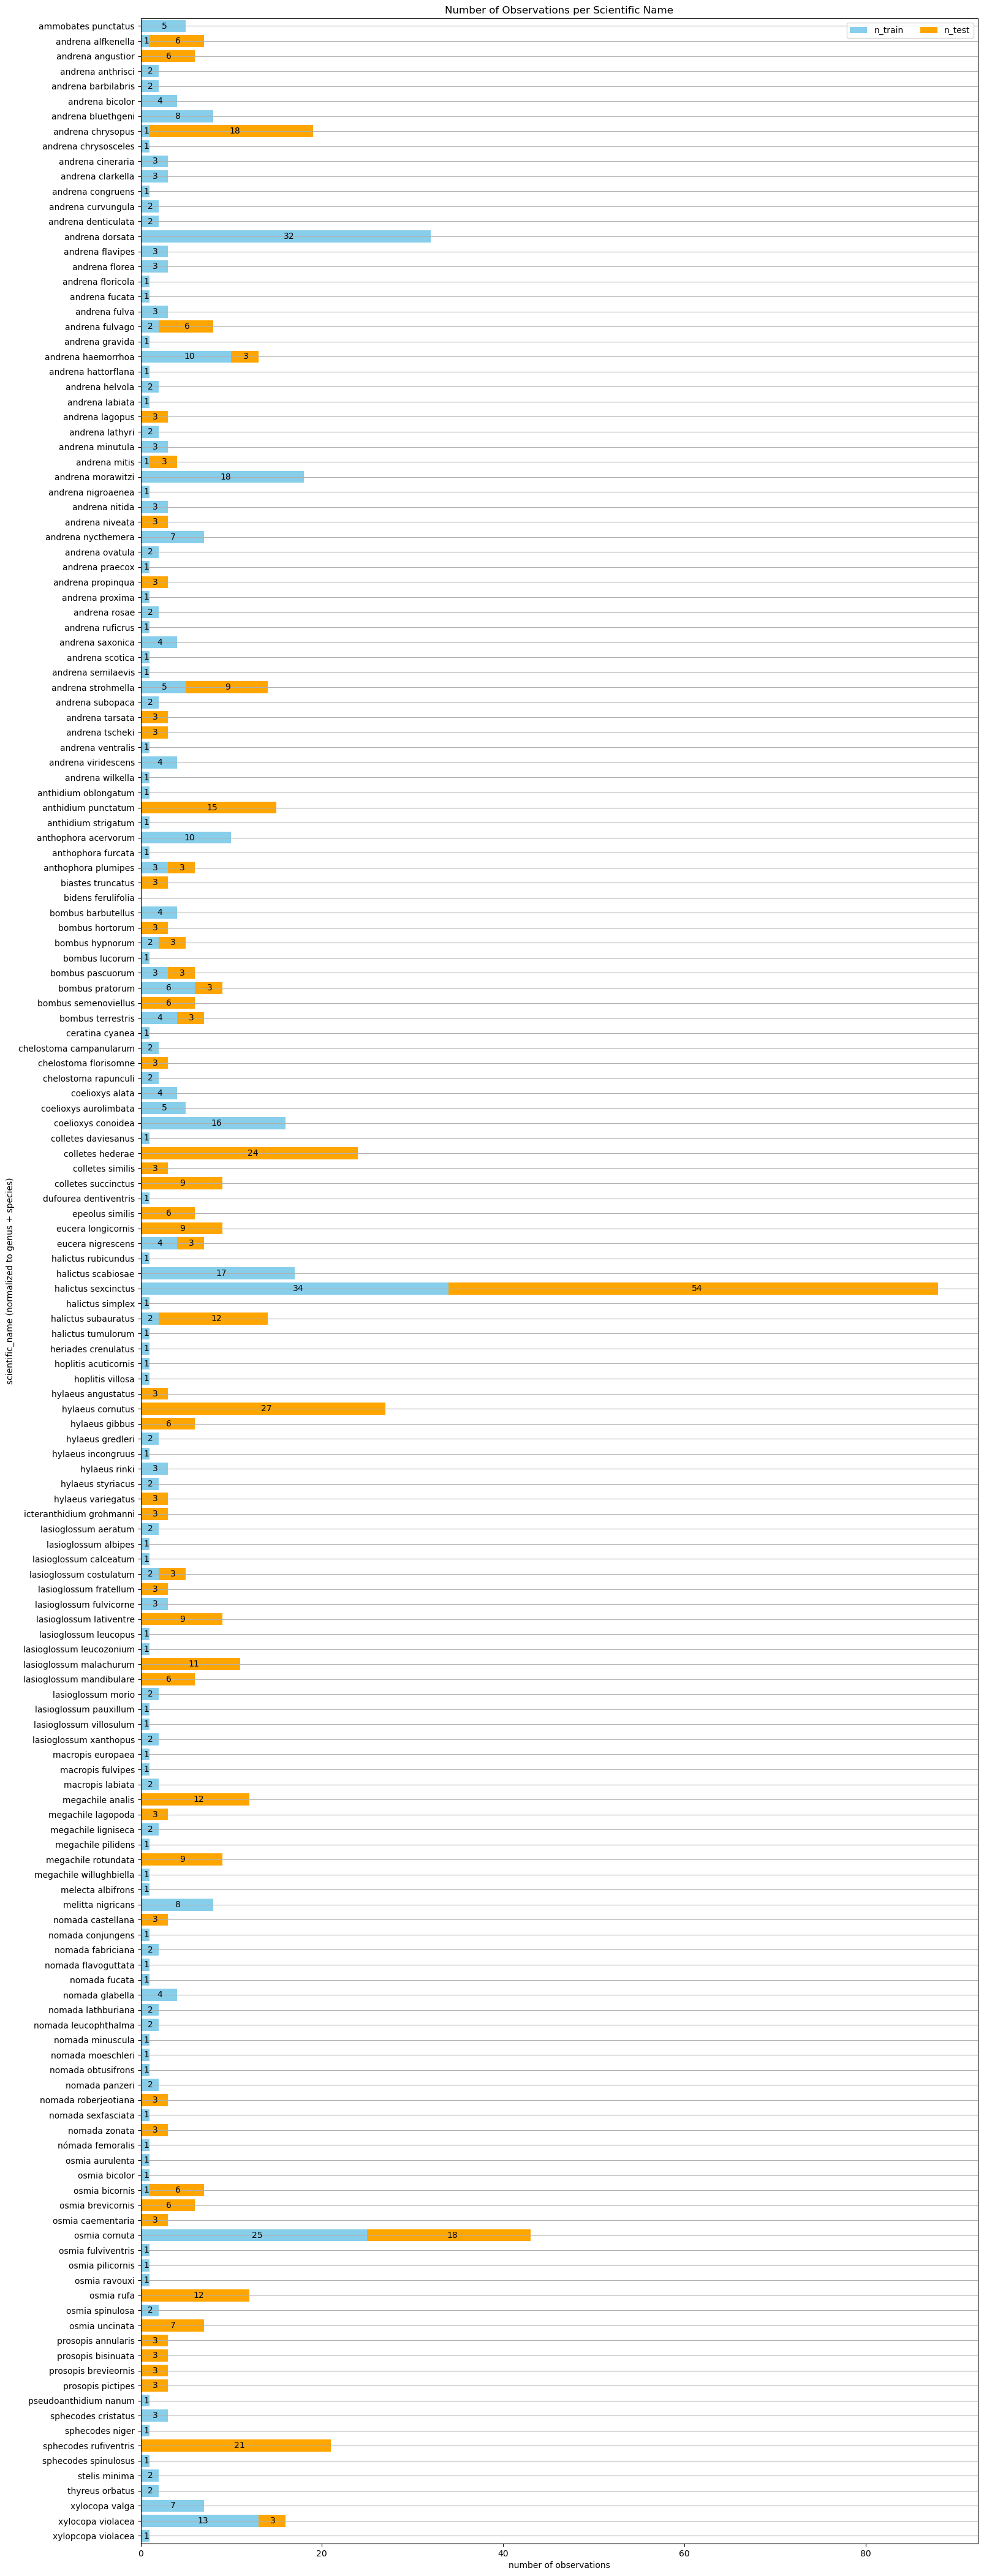

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

TITLE_FONTSIZE=18
AX_FONTSIZE=14

plt.figure(figsize=(16, len(all_names_df) * 0.25))


labels=all_names_df.scientific_name_norm.to_list()
n_train=all_names_df.n_train
n_test=all_names_df.n_test

train_bars=plt.barh(labels, n_train, color='skyblue', label='n_train')
test_bars=plt.barh(labels, n_test, color='orange', label='n_test', left=n_train)


for i, label in enumerate(labels):

     if n_train[i]>0: plt.text((n_train[i]/2)-0.2, i,f"{n_train[i]}", va='center')

     if n_test[i]>0: plt.text(n_train[i]+(n_test[i]/2)-0.2, i,f"{n_test[i]}", va='center')
     

     # train_x=max(0.2,(n_train[i]/2)-0.25)
     # test_x=max(train_x+2,train_x+n_test[i]/2)

     # plt.text(train_x, i,f"{n_train[i]}", va='center')
     # plt.text(test_x, i,f"{n_test[i]}", va='center')


plt.title('Number of Observations per scientific name: train/ test split', fontweight='bold', fontsize=TITLE_FONTSIZE)
plt.xlabel('number of observations', fontsize=AX_FONTSIZE)
plt.ylabel('scientific_name (normalized to genus + species)')

#plt.gca().set_yticklabels([])
# plt.gca().set_yticklabels(labels)
# plt.gca().invert_yaxis()

plt.legend(ncol=2)
plt.grid(axis='y')
# Show the plot
plt.ylim(-0.5, len(labels) - 0.5)
plt.tight_layout(pad=0.5)  # Automatically adjust subplot parameters for a clean layout
plt.show()

In [44]:
top_names_df=names_df[(names_df['F1']==1.0)].reset_index(drop=True).copy()
print(f"{len(top_names_df)} top names")
top_names_df

mid_names_df=names_df[(names_df['F1']<1.0) & (names_df['F1']>0.0)].reset_index(drop=True).copy()
mid_names_df['label']=mid_names_df['label'].apply(lambda x: x.strip())
print(f"{len(mid_names_df)} mid names")

# epsilon_range = (-0.001, 0.00)
# mid_names_df['P']=mid_names_df['P']+np.random.uniform(*epsilon_range, size=len(mid_names_df))
# mid_names_df['R']=mid_names_df['R']+np.random.uniform(*epsilon_range, size=len(mid_names_df))
mid_names_df['i']=[str(i+1) for i in mid_names_df.index]
mid_names_df

low_names_df=names_df[(names_df['F1']==0.0)].reset_index(drop=True).copy()
print(f"{len(low_names_df)} low names")
low_names_df

42 top names
9 mid names
8 low names


,scientific_name_norm,tp,fp,fn,P,R,F1,label
0,andrena haemorrhoa,0,0,3,0.0,0.0,0.0,andrena haemorrhoa (0-0-3)
1,andrena lagopus,0,0,3,0.0,0.0,0.0,andrena lagopus (0-0-3)
2,bidens ferulifolia,0,15,0,0.0,0.0,0.0,bidens ferulifolia (0-15-0)
3,bombus terrestris,0,3,3,0.0,0.0,0.0,bombus terrestris (0-3-3)
4,chelostoma florisomne,0,0,3,0.0,0.0,0.0,chelostoma florisomne (0-0-3)
5,osmia bicornis,0,0,6,0.0,0.0,0.0,osmia bicornis (0-0-6)
6,osmia brevicornis,0,0,6,0.0,0.0,0.0,osmia brevicornis (0-0-6)
7,osmia cornuta,0,0,18,0.0,0.0,0.0,osmia cornuta (0-0-18)


2025-02-21 08:41:20,791 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 1 from STIXGeneral
2025-02-21 08:41:20,800 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 2 from STIXGeneral
2025-02-21 08:41:20,811 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 3 from STIXGeneral


2025-02-21 08:41:20,824 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 4 from STIXGeneral
2025-02-21 08:41:20,830 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 5 from STIXGeneral
2025-02-21 08:41:20,839 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 6 from STIXGeneral
2025-02-21 08:41:20,851 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 7 from STIXGeneral
2025-02-21 08:41:20,857 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 8 from STIXGeneral
2025-02-21 08:41:20,875 - _mathtext.py - matplotlib.mathtext - _get_glyph - INFO - Substituting symbol 9 from STIXGeneral
2025-02-21 08:41:20,953 - __init__.py - adjustText - warn_once - WARNING - Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


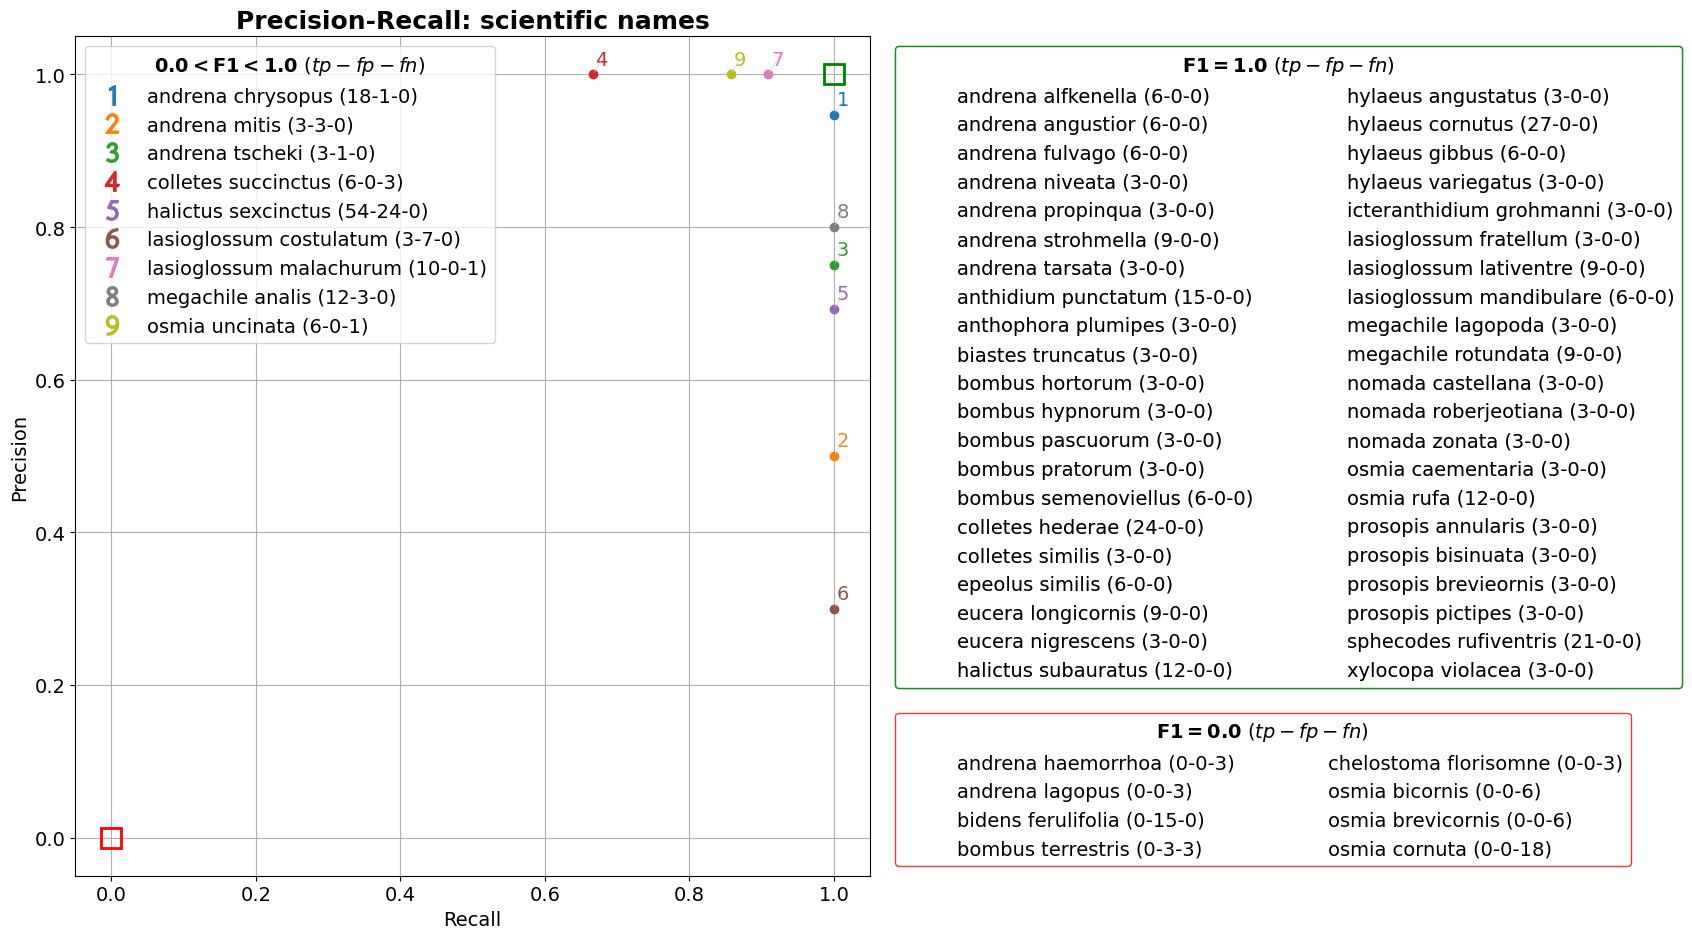

In [45]:
import plotly.colors as pc
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from adjustText import adjust_text


TITLE_FONTSIZE=18
AX_FONTSIZE=14

# Create a 3-column grid

fig, axes = plt.subplots(1, 2, figsize=(17, 9.5), width_ratios=[0.5,0.5])

#MIDDLE PLOT: MID NAMES
annotations=[]
mid_handles=[]
for i, plot_row in mid_names_df.iterrows():
    #color=pc.sample_colorscale('Portland', random.random(),colortype="tuple")[0]
    line,=axes[0].plot(plot_row.R, plot_row.P, 'o', markersize=6, label=plot_row.label)

    annotations.append(axes[0].text(plot_row.R, plot_row.P, plot_row['i'], fontsize=AX_FONTSIZE, color=line.get_color()))

    mid_handles.append(
        mlines.Line2D(
            [], [],
            color=line.get_color(),
            marker=r"$\mathcal{{{}}}$".format(plot_row.i),
            linestyle='None',
            markersize=AX_FONTSIZE,
            label=plot_row.label
            ))
    #mid_handles.append(Patch(label=plot_row.val_norm, color=color))

adjust_text(
    annotations,
    arrowprops=dict(arrowstyle="-", color='lightgray', lw=0.5),  # Optional arrows
    max_move=(50, 50),
    #expand=(1.0,1.0),
    force_explode = (2.5, 2.5),
    #force_static = (0.0,0.0),
    #force_pull = (0.0,0.0),
    ensure_inside_axes=True,
    #min_arrow_len=100,
    expand_axes = False,
    #avoid_self = False,
    prevent_crossings = True,
    ax=axes[0],
    fontsize=AX_FONTSIZE
)

axes[0].plot(0, 0, 's', markersize=AX_FONTSIZE, markerfacecolor='none', markeredgecolor=mcolors.to_rgb('red'),markeredgewidth=2)
axes[0].plot(1.0, 1.0, 's', markersize=AX_FONTSIZE, markerfacecolor='none', markeredgecolor=mcolors.to_rgb('green'), markeredgewidth=2)


legend=axes[0].legend(
    handles=mid_handles,
    loc="upper left",
    #bbox_to_anchor=(0.5, 0.5),
    borderaxespad=0.5,
    title=r"$\bf{0.0<F1<1.0}$ $(tp-fp-fn)$",
    ncol=1,
    fontsize=AX_FONTSIZE,
    )
legend.get_title().set_fontsize(AX_FONTSIZE)

axes[0].set_title("Precision-Recall: scientific names", fontweight='bold', fontsize=TITLE_FONTSIZE)
axes[0].tick_params(axis='both', labelsize=AX_FONTSIZE)
#(real training data, fewshots only, epoch 10)
axes[0].set_xlabel("Recall", fontsize=AX_FONTSIZE)
axes[0].set_ylabel("Precision", fontsize=AX_FONTSIZE)
axes[0].grid()


#LEFT PLOT: LOW NAMES
low_handles=[Patch(label=row.label, color=mcolors.to_rgb('white')) for _,row in low_names_df.iterrows()]


#low_legend=axes[1].legend(handles=low_handles, loc="lower right", title=r"$\bf{F1=0.0}$ (tp-fp-fn)", ncol=2, frameon=True)
low_legend = axes[1].legend(handles=low_handles, loc="lower left", title=r"$\bf{F1=0.0}$ $(tp-fp-fn)$", ncol=2, frameon=True, fontsize=AX_FONTSIZE)
low_legend.get_frame().set_edgecolor('red')
low_legend.get_title().set_fontsize(AX_FONTSIZE)
axes[1].add_artist(low_legend)




# Right Plot: Custom Legend
top_handles=[Patch(label=row.label, color=mcolors.to_rgb('white')) for _,row in top_names_df.iterrows()]

#top_legend = axes[1].legend(handles=top_handles, loc="upper left", title=r"$\bf{F1=1.0}$ (tp-fp-fn)", ncol=2, frameon=True)
top_legend = axes[1].legend(handles=top_handles, loc="upper left", title=r"$\bf{F1=1.0}$ $(tp-fp-fn)$", ncol=2, frameon=True, fontsize=AX_FONTSIZE)
top_legend.get_frame().set_edgecolor('green')
top_legend.get_title().set_fontsize(AX_FONTSIZE)
axes[1].add_artist(top_legend)
axes[1].axis("off")  # Turn off axis for a clean legend-only plot


# Add the first legend back to the plot

# Adjust spacing
plt.tight_layout()
plt.savefig("figs/pr_scientific_name.png", dpi=300, bbox_inches="tight",)# pad_inches=0.1)
plt.show()

In [ ]:
legend.get_title().set_fontsize(AX_FONTSIZE)

plt.title('Precision-Recall: Attributes', fontweight='bold', fontsize=TITLE_FONTSIZE)
#(real training data, fewshots only, epoch 10)

plt.ylabel(r"$\mathit{P_{fuzzy} = tp_{fuzzy} / (tp + fp)}$", fontsize=AX_FONTSIZE)
plt.xlabel(r"$\mathit{R_{fuzzy} = tp_{fuzzy} / (tp + fn)}$", fontsize=AX_FONTSIZE)

plt.xticks(fontsize=AX_FONTSIZE)
plt.yticks(fontsize=AX_FONTSIZE)

# Create Samples

In [13]:
reimport()

In [6]:
print(BaseDataset(9).dataset_df.sample(2).iloc[0].gold_completion)

2025-01-24 06:27:06,705 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised


```json
{
  "meta_scientific_name": "Osmia cornuta (Latreille, 1805)",
  "meta_location": "Schleswig-Holstein",
  "observations": [
    {
      "date": "28.iv.2000",
      "location": "Sterleyer Heide, ca. 9 km SO Ratzeburg (N53.6192, E10.8169)",
      "n_males": "1",
      "leg": "J. Smissen",
      "habitat": "kleine Sandgrube, ehem. Heidegebiet"
    },
    {
      "date": "13.iii.2022",
      "location": "Wendtorferstrand (N54.4164, E10.2847)",
      "n_females": "1"
    },
    {
      "date": "15.iii.2020-2.v.2022",
      "location": "Kiel (N54.32, E10.12)",
      "n_divers": "40"
    },
    {
      "date": "8.v.2022",
      "location": "Holstein, Oldenburg (N54.2900, E10.8887)",
      "n_females": "1"
    },
    {
      "date": "23.iii.2022",
      "location": "Rönne (N54.2689, E10.1758)",
      "n_males": "1"
    },
    {
      "date": "26.iii.2021",
      "location": "Postfeld (N54.21, E10.21)",
      "n_males": "1"
    },
    {
      "date": "13.iv.2022",
      "location": "Pos

In [14]:
pred_completion="""
```json
{
  "meta_scientific_name": "Osmia uncinata GERST.",
  "meta_location": "Schleswig-Holstein, Lauenburg",
  "meta_habitat": "Salemer und Bannauer Moor",
  "meta_visited_flowers": "Vaccinium uliginosum",
  "observations": [
    {
      "date": "1941",
      "n_females": "1",
      "coll": "Walther Emeis"
    },
    {
      "date": "10.7.",
      "n_females": "1",
      "coll": "Walther Emeis"
    }
  ]
}
```
"""

gold_completion="""
```json
{
  "meta_scientific_name": "Osmia uncinata GERST.",
  "meta_location": "Schleswig-Holstein, Lauenburg",
  "meta_coll": "Walther Emeis",
  "meta_habitat": "Birken und Kiefern bewachsene Landklimahochmoore",
  "meta_visited_flowers": "Vaccinium uliginosum",
  "observations": [
    {
      "date": "verschiedenen Jahre",
      "location": "Salemer Moor"
    },
    {
      "date": "verschiedenen Jahre",
      "location": "Bannauer Moor"
    },
    {
      "date": "10.7.1941",
      "location": "Salemer Moor",
      "n_females": "1"
    }
  ]
}
```
"""

eval_sample=EvaluationSample(pred_completion, gold_completion)
eval_sample

In [24]:
eval_sample.errors_df

,m,g,p,key,fuzzy_score,gold_val,pred_val,type,is_error
0,1.0,1.0,2,scientific_name,1.000000,Osmia uncinata GERST.,Osmia uncinata GERST.,tp_val,False
1,1.0,1.0,2,date,0.714286,10.7.,10.7.1941,tp_val,True
2,1.0,1.0,2,location,0.805556,"Schleswig-Holstein, Lauenburg","Schleswig-Holstein, Lauenburg, Salemer Moor",tp_val,True
3,1.0,1.0,2,n_males,1.000000,None,None,tn_val,False
4,1.0,1.0,2,n_females,1.000000,1,1,tp_val,False
5,1.0,1.0,2,n_queens,1.000000,None,None,tn_val,False
6,1.0,1.0,2,n_divers,1.000000,None,None,tn_val,False
7,1.0,1.0,2,leg,1.000000,None,None,tn_val,False
8,1.0,1.0,2,coll,1.000000,Walther Emeis,Walther Emeis,tp_val,False
9,1.0,1.0,2,det,1.000000,None,None,tn_val,False


In [2]:
dataset=BaseDataset(1)
print(dataset.remarks)
dataset_df=dataset.dataset_df
dataset_df

NameError: name 'BaseDataset' is not defined

In [30]:
samples_df.to_pickle('../2_beesup_llm_extractor_gradio/gradio_samples_df.pkl')

In [ ]:
samples_df=pd.read_pickle('../2_beesup_llm_extractor_gradio/gradio_samples_df.pkl')
samples_df.tail(2)

,timestamp,report_passage,gold_completion,source,pred_completion,discarded
157,2024-12-14 12-37-16,\n\nErstnachweise von Stechimmen für Niedersac...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,,NaN
158,2024-12-14 12-45-22,Erstnachweise von Stechimmen für Niedersachsen...,"```json\n{\n ""meta_scientific_name"": ""Ammobat...",http://ampulex.de/ampu14.pdf#page=42,,NaN


In [8]:
print(samples_df.iloc[-1].report_passage)

FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024
KIEL-UP • DOI: 10.38072/2699-7762/p24
Erstnachweise und Wiederfunde verschollener Stechimmenarten
(Hymenoptera Aculeata) in Schleswig-Holstein

Zusammenfassung
Durch intensive Sammelaktivitäten in den letzten Jahren, besonders der Mitglieder der AG Stechimmen Schleswig-Holstein im Zeitraum von 2016-2022, wurden
37 Stechimmenarten (Hymenoptera Aculeata) erstmals für Schleswig-Holstein
nachgewiesen sowie 19 Arten wiedergefunden, die für das Bundesland als verschollen galten. Die Erstnachweise werden im Kontext bekannter Vorkommen
aus benachbarten (Bundes-)Ländern diskutiert. Hierbei ist vor allem eine starke
Nordausbreitung wärmeliebender Arten durch klimatische Veränderungen zu beobachten. 

2. Material und Methoden
Die Aufistung der Erstnachweise und Wiederfunde verschollener Stechimmenarten erfolgt in drei Abschnitten: 1. Nach 2001 bereits publizierte Erstnachweise, 2.
Unpublizierte Erstnachweise und 3. Wiederfunde verschollener Arten (RL-S

In [29]:
samples_df.at[156,'gold_completion']="""
```json
{
  "meta_location": "Niedersachsen",
    "observations": [
    {
      "scientific_name": "Ammobates punctatus (Fabricius, 1804)",
      "location": "Braunschweig Veltenhof-Rühme, Waller Weg [52.317 °N 10.467 °E]",
      "habitat": "Sandmagerrasen mit Binnendünenresten",
      "date": "6.7.2022",
      "n_females": "5",
      "n_males": "1",
      "visited_flowers": "Senecio inaequidens",
      "leg": "Hanna Gardein",
      "det": "Hanna Gardein",
      "coll": "Henri Greil"
    },
    {
      "scientific_name": "Andrena chrysopus Pérez, 1903",
      "location": "Wendessen [52.152 °N 10.589 °E]",
      "habitat": "Industriebrache, zwischen zwei befahrenen Bahngleisen, von Löss geprägten Gegend",
      "date": "2.6.2022",
      "n_females": "1",
      "n_males": "2",
      "visited_flowers": "Asparagus officinalis",
      "leg": "Marc Hoffmann",
      "det": "Marc Hoffmann",
      "coll": "Marc Hoffmann"
    }
  ]
}
```
""".strip()

In [32]:
print(samples_df.iloc[-1].gold_completion)

```json
{
  "meta_location": "Niedersachsen",
    "observations": [
    {
      "scientific_name": "Ammobates punctatus (Fabricius, 1804)",
      "location": "Braunschweig Veltenhof-Rühme, Waller Weg [52.317 °N 10.467 °E]",
      "habitat": "Sandmagerrasen mit Binnendünenresten",
      "date": "6.7.2022",
      "n_females": "5",
      "n_males": "1",
      "visited_flowers": "Senecio inaequidens",
      "leg": "Hanna Gardein",
      "det": "Hanna Gardein",
      "coll": "Henri Greil"
    },
    {
      "scientific_name": "Andrena chrysopus Pérez, 1903",
      "location": "Wendessen [52.152 °N 10.589 °E]",
      "habitat": "Industriebrache, zwischen zwei befahrenen Bahngleisen, von Löss geprägten Gegend",
      "date": "2.6.2022",
      "n_females": "1",
      "n_males": "2",
      "visited_flowers": "Asparagus officinalis",
      "leg": "Marc Hoffmann",
      "det": "Marc Hoffmann",
      "coll": "Marc Hoffmann"
    }
  ]
}
```


In [101]:
sample=samples_df.iloc[53]
print(sample['source'])#
print()
print(sample['report_passage'])

Test

36
AMPULEX 9|2017  Witt: Bemerkenswerte Stechimmenfunde aus Niedersachsen
Das Tier wurde in einer Lufteklektor-Falle in niedriger
Höhe in einem alten, parkartigen Laubbaumbestand
gefangen. Dritter Fund für Niedersachsen.
Den Erstnachweis für Niedersachsen erbrachten v.
d. Heide & Metschler (2003) bei Meppen an der Ems.
Theunert (2012) wies die Art am 19.8.2010 bei Peine
(Weddeler Grabenniederung) nach. Riemann & Homann (2005) fanden die Art auch in Bremen. Die drei
Funde aus Berlin (Saure 2005) stammen, wie fast alle
Fundorte aus Biotoptypen mit angrenzenden feuchteren Vegetationsstrukturen.
Bethylus boops (Thomson, 1862)
• Hannover, Berggarten
1 ♀, 19.7.14 (leg. P. Sprick; det./ coll. Witt)
Erstnachweis für Niedersachsen. Einzelne Nachweise
von B. boops liegen aus Schleswig-Holstein, NordrheinWestfalen, Hessen (de Rond 2004) sowie Berlin und
Brandenburg (Saure, mdl. Mitt.). Der vorliegende Fundort in Hannover passt dementsprechend gut in die Gesamtverbreitung der Art. Das Tier 

In [100]:
print(sample['gold_completion'])

```json
{
  "meta_location": "Deutschland, Sachsen",
  "meta_leg": "Gerth, Mayer, Hering, Wolf, Schaffer, Bleidorn",
  "meta_collecting_method": "hand catch",
  "observations": [
    {
      "scientific_name": "Andrena alfkenella (Perkins, 1914)",
      "date": "2010-2012",
      "location": "Leipzig",
      "n_divers": "1",
      "status": "V"
    },
    {
      "scientific_name": "Andrena barbilabris (Kirby, 1802)",
      "date": "2010-2012",
      "location": "Leipzig",
      "n_divers": "1",
      "status": "V"
    },
    {
      "scientific_name": "Andrena bicolor (Fabricius, 1775)",
      "date": "2010-2012",
      "location": "Leipzig",
      "n_divers": "1",
      "status": ""
    },
    {
      "scientific_name": "Andrena chrysosceles (Kirby, 1802)",
      "date": "2010-2012",
      "location": "Leipzig",
      "n_divers": "1",
      "status": ""
    },
    {
      "scientific_name": "Andrena clarkella (Kirby, 1802)",
      "date": "2010-2012",
      "location": "Leipzig",
   

In [107]:
sample=samples_df.iloc[i]
print(sample.name)
print(sample['source'])
print(sample['timestamp'])
print(sample['discarded'])
print_multicol([sample['report_passage'],sample['gold_completion']])
i+=1

57
[0] Beitrag zur Hautflüglerfauna von Brandenburg - Neu- und Wiederfunde Aculeater Hymenopteren (Hymenoptera: Chrysididae, Vespidae, Pompilidae, Crabronidae, Tiphiidae, Apidae)/ Märkische Ent. Nachr.
2024-12-11 11-09-20
nan


In [88]:
sample=dataset_df.iloc[0]

report_passage=sample['report_passage']

gold_dict, _, _ = pydantic_parse(sample.gold_completion)

sample_dict=dict(
    report_passage=report_passage,
    done=False,
    meta_attributes={k:v for k,v in gold_dict.items() if k not in ['observations']},
    observations=gold_dict.get('observations',[]),
)

fn=f"samples/{str(sample.name).zfill(3)}_real_sample.yaml"

with open(fn, "w", encoding="utf-8") as file:
    yaml.dump(sample_dict, file, allow_unicode=True) 

In [12]:
i=14

In [96]:
sample=dataset_df.iloc[i]

print("[{name}] {title}/ {journal}".format(name=sample.name,**sample.report_dict))
print()
print(sample.report_passage)
i+=1

[71] Bemerkenswerte Stechimmenfunde aus Niedersachsen (Hymenoptera: Aculeata)/ Ampulex

Im Rahmen von Gutachten und Erfassungen konnten 
in  den  letzten  Jahren  einige  bemerkenswerte  Nach-
weise  von  Stechimmen  (Hymenoptera  Aculeata)  für 
Niedersachsen  und  die  eher  artenarme  Region  des 
nordwestdeutschen Flachlandes erbracht werden. Ein 
großer Teil  der  Daten  stammt  aus  Erfassungen  in  der 
Stadt Hannover, der Region Hannover sowie Beifänge 
aus dem Projekt „Hummelschutz in Niedersachsen“ des 
NABU Niedersachsen. Hier sollen vorab nur einige fau-
nistischen Besonderheiten publiziert werden. 
Weitere  Ergebnisse  stammen  von  kleineren  Einzel-
untersuchungen  (Helmstedt,  Uelzen)  sowie  anderen 
Aufsammlungen  und  ergänzenden  Meldungen  von 
Kollegen zu den Arten.

Lasioglossum costulatum (Kriechbaumer, 1873)

• Nienhagen/Weper [51.7132° N 9.8013° E]   

1 ♀, 10.9.2016 (leg. / coll. Witt) 

Dritter  Fund  für  Niedersachsen.  Magerrasen  westlich 
des  Segelflug

In [97]:
print(sample['gold_completion'])

```json
{
  "observations": [
    {
      "scientific_name": "Lasioglossum costulatum (Kriechbaumer, 1873)",
      "date": "10.09.2016",
      "location": "Deutschland, Niedersachsen, Celle, Nienhagen, Weper, [51.7132°N, 9.8013° E]",
      "n_females": "1",
      "leg": "Witt",
      "coll": "Witt",
      "det": "Witt",
      "habitat": "Magerrasen"
    }
  ]
}
```


In [ ]:
# remarks entfernen!
# [23], 0 vor datum entfernen
# Emais [58] lauenburg --> schleswig holstein? älteres sample von emais abgleichen

# bis 125 koordinaten umformen
# alle strings strippen


## Refine Samples

In [132]:
samples_df=pd.read_pickle('../2_beesup_llm_extractor_gradio/gradio_samples_df.pkl')
samples_df

,timestamp,report_passage,gold_completion,source,pred_completion,discarded
0,2024-07-18 10-09-22,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""meta_location"": ""Nordrhein-Westf...",NaN,NaN,NaN
1,2024-07-18 10-10-47,Für das Stadtgebiet Bielefeld nördlich des Te...,"```json\n{\n ""observations"": [\n {\n ""be...",NaN,NaN,NaN
2,2024-08-02 12-17-52,,,NaN,NaN,NaN
3,2024-08-02 14-22-35,Für das Stadtgebiet Bielefeld nördlich des Te...,,NaN,NaN,NaN
4,2024-08-13 13-13-48,Seltene Wildbienenarten wurden bei Untersuchun...,"```json\n{\n ""meta_location"": ""Deutschland, B...",NaN,NaN,NaN
...,...,...,...,...,...,...
154,2024-12-14 11-34-00,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,,NaN
155,2024-12-14 11-57-00,Da in Gusenleitner et al. (2012) die folgende ...,"```json\n{\n ""meta_location"": ""Österreich, Se...",https://www.oegef.at/rails/active_storage/disk...,,NaN
156,2024-12-14 12-17-47,Erstnachweise von Stechimmen für Niedersachsen...,"```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,,NaN
157,2024-12-14 12-37-16,\n\nErstnachweise von Stechimmen für Niedersac...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,,NaN


In [7]:
reimport()

In [133]:
columns=\
    ['idx','report_passage','Xmeta_location','Xlocation']+\
    list(ExtractionScheme4SingleObservation.model_fields.keys())+\
    ['timestamp','source']
#columns.pop(columns.index('remarks'))


data_df=pd.DataFrame(columns=columns)
for i,sample in samples_df.iterrows():
    if sample.name < 57: continue
    if 'test' == sample.source.lower().strip(): continue

    esample=ExtractionSample(pred_completion=sample.gold_completion)
    
    gold_df=esample.pred_df
    gold_dict=esample.pred_json
    gold_df['Xmeta_location']=gold_dict.get('meta_location', None)
    gold_df['Xlocation']=[o.get('location',None) for o in gold_dict['observations']]

    gold_df['idx']=sample.name
    gold_df['report_passage']=sample.report_passage.strip()
    gold_df['timestamp']=sample.timestamp
    gold_df['source']=sample.source

    data_df=pd.concat([data_df,gold_df],ignore_index=True)

data_df

,idx,report_passage,Xmeta_location,Xlocation,scientific_name,date,location,n_males,n_females,n_divers,...,leg,coll,det,habitat,visited_flowers,behaviour,observed_nesting,collecting_method,timestamp,source
0,57,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,Brandenburg,"Greifenhain, MTB 4350","Andrena morawitzi THOMSON, 1872",30.III.1991,"Brandenburg, Greifenhain, MTB 4350",1,1,None,...,Burger,Burger,Burger,None,None,None,None,None,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
1,57,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,Brandenburg,"Casel, MTB 4350","Andrena morawitzi THOMSON, 1872",30.IV.1991,"Brandenburg, Casel, MTB 4350",None,1,None,...,Burger,Burger,Burger,None,None,None,None,None,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
2,57,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,Brandenburg,"Casel, MTB 4350","Andrena morawitzi THOMSON, 1872",19.III.1993,"Brandenburg, Casel, MTB 4350",1,None,None,...,Burger,Burger,Burger,None,None,None,None,None,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
3,57,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,Brandenburg,"Casel, MTB 4350","Andrena morawitzi THOMSON, 1872",23.IV.1993,"Brandenburg, Casel, MTB 4350",None,1,None,...,Burger,Burger,Burger,None,None,None,None,None,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
4,57,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,Brandenburg,"Koschendorf, MTB 4351","Andrena morawitzi THOMSON, 1872",25.IV.1992,"Brandenburg, Koschendorf, MTB 4351",1,None,None,...,Burger,Burger,Burger,None,None,None,None,None,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,157,Erstnachweise von Stechimmen für Niedersachsen...,None,"Celler Straße, Braunschweig [52.267 °N 10.514 °E]","Andrena chrysopus Pérez, 1903",30.6.2022,"Celler Straße, Braunschweig [52.267 °N 10.514 °E]",None,1,None,...,Henri Greil,None,Henri Greil,Staudenpflanzung,Pastinaca sativa,None,None,None,2024-12-14 12-37-16,http://ampulex.de/ampu14.pdf#page=42
555,158,Erstnachweise von Stechimmen für Niedersachsen...,None,"Paulikirche, Braunschweig [52.269°N 10.542 °E]","Ammobates punctatus (Fabricius, 1804)",30.6.2022,"Paulikirche, Braunschweig [52.269°N 10.542 °E]",None,1,None,...,Henri Greil,None,Henri Greil,Staudenpflanzung,None,None,None,None,2024-12-14 12-45-22,http://ampulex.de/ampu14.pdf#page=42
556,158,Erstnachweise von Stechimmen für Niedersachsen...,None,"Alter Botanischer Garten, Göttingen [51.538°N ...","Ammobates punctatus (Fabricius, 1804)",29.7.2019,"Alter Botanischer Garten, Göttingen [51.538°N ...",None,1,None,...,Weitz,None,Bleidorn,Staudenpflanzung,None,None,None,None,2024-12-14 12-45-22,http://ampulex.de/ampu14.pdf#page=42
557,158,Erstnachweise von Stechimmen für Niedersachsen...,None,"Alter Botanischer Garten, Göttingen [51.538°N ...","Ammobates punctatus (Fabricius, 1804)",nach 2019,"Alter Botanischer Garten, Göttingen [51.538°N ...",None,diverse,None,...,None,None,None,None,None,None,None,None,2024-12-14 12-45-22,http://ampulex.de/ampu14.pdf#page=42


In [30]:
samples_df.tail(10)

,timestamp,report_passage,gold_completion,source,pred_completion,discarded
149,2024-12-14 09-01-45,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_location"": ""Schleswig-Hols...",https://www.researchgate.net/profile/Michael-K...,,NaN
150,2024-12-14 09-23-32,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_location"": ""Schleswig-Hols...",https://www.researchgate.net/profile/Michael-K...,,NaN
151,2024-12-14 09-45-38,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_location"": ""Schleswig-Hols...",https://www.researchgate.net/profile/Michael-K...,,NaN
152,2024-12-14 11-11-35,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_location"": ""Schleswig-Hols...",https://www.researchgate.net/profile/Michael-K...,,NaN
153,2024-12-14 11-23-58,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_location"": ""Schleswig-Hols...",https://www.researchgate.net/profile/Michael-K...,,NaN
154,2024-12-14 11-34-00,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,,NaN
155,2024-12-14 11-57-00,Da in Gusenleitner et al. (2012) die folgende ...,"```json\n{\n ""meta_location"": ""Österreich, Se...",https://www.oegef.at/rails/active_storage/disk...,,NaN
156,2024-12-14 12-17-47,Erstnachweise von Stechimmen für Niedersachsen...,"```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,,NaN
157,2024-12-14 12-37-16,\n\nErstnachweise von Stechimmen für Niedersac...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,,NaN
158,2024-12-14 12-45-22,Erstnachweise von Stechimmen für Niedersachsen...,"```json\n{\n ""meta_scientific_name"": ""Ammobat...",http://ampulex.de/ampu14.pdf#page=42,,NaN


In [29]:
samples_df.iloc[sample.name]

timestamp          2024-12-12 10-57-47
report_passage                    qwww
gold_completion                       
source                            test
pred_completion                       
discarded                          NaN
Name: 106, dtype: object

In [19]:
gold_df

,scientific_name,date,location,n_males,n_females,n_divers,n_queens,leg,coll,det,habitat,visited_flowers,behaviour,observed_nesting,collecting_method,Xmeta_location


In [38]:
data_df.to_excel('date_sample_data.xlsx', index=False)

In [10]:
data_df.to_excel('sample_data.xlsx', index=False)

In [32]:
data_df=pd.read_excel('sample_data_2025-01-02.xlsx')
idc=data_df.idx.unique()
data_df

,idx,group,report_passage,scientific_name,date,Xmeta_location,Xlocation,location,n_males,n_females,...,leg,coll,det,habitat,visited_flowers,behaviour,observed_nesting,collecting_method,timestamp,source
0,57,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"Andrena morawitzi THOMSON, 1872",30.III.1991,Brandenburg,"Greifenhain, MTB 4350","Brandenburg, Greifenhain, MTB 4350",1,1,...,Burger,Burger,Burger,NaN,NaN,NaN,NaN,NaN,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
1,57,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"Andrena morawitzi THOMSON, 1872",30.IV.1991,Brandenburg,"Casel, MTB 4350","Brandenburg, Casel, MTB 4350",NaN,1,...,Burger,Burger,Burger,NaN,NaN,NaN,NaN,NaN,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
2,57,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"Andrena morawitzi THOMSON, 1872",19.III.1993,Brandenburg,"Casel, MTB 4350","Brandenburg, Casel, MTB 4350",1,NaN,...,Burger,Burger,Burger,NaN,NaN,NaN,NaN,NaN,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
3,57,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"Andrena morawitzi THOMSON, 1872",23.IV.1993,Brandenburg,"Casel, MTB 4350","Brandenburg, Casel, MTB 4350",NaN,1,...,Burger,Burger,Burger,NaN,NaN,NaN,NaN,NaN,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
4,57,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"Andrena morawitzi THOMSON, 1872",25.IV.1992,Brandenburg,"Koschendorf, MTB 4351","Brandenburg, Koschendorf, MTB 4351",1,NaN,...,Burger,Burger,Burger,NaN,NaN,NaN,NaN,NaN,2024-12-11 11-09-20,[0] Beitrag zur Hautflüglerfauna von Brandenbu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,157,11,Erstnachweise von Stechimmen für Niedersachsen...,"Andrena chrysopus Pérez, 1903",30.6.2022,NaN,"Celler Straße, Braunschweig [52.267 °N 10.514 °E]","Celler Straße, Braunschweig [52.267 °N 10.514 °E]",NaN,1,...,Henri Greil,NaN,Henri Greil,Staudenpflanzung,Pastinaca sativa,NaN,NaN,NaN,2024-12-14 12-37-16,http://ampulex.de/ampu14.pdf#page=42
555,158,11,Erstnachweise von Stechimmen für Niedersachsen...,"Ammobates punctatus (Fabricius, 1804)",30.6.2022,NaN,"Paulikirche, Braunschweig [52.269°N 10.542 °E]","Paulikirche, Braunschweig [52.269°N 10.542 °E]",NaN,1,...,Henri Greil,NaN,Henri Greil,Staudenpflanzung,NaN,NaN,NaN,NaN,2024-12-14 12-45-22,http://ampulex.de/ampu14.pdf#page=42
556,158,11,Erstnachweise von Stechimmen für Niedersachsen...,"Ammobates punctatus (Fabricius, 1804)",29.7.2019,NaN,"Alter Botanischer Garten, Göttingen [51.538°N ...","Alter Botanischer Garten, Göttingen [51.538°N ...",NaN,1,...,Weitz,NaN,Bleidorn,Staudenpflanzung,NaN,NaN,NaN,NaN,2024-12-14 12-45-22,http://ampulex.de/ampu14.pdf#page=42
557,158,11,Erstnachweise von Stechimmen für Niedersachsen...,"Ammobates punctatus (Fabricius, 1804)",nach 2019,NaN,"Alter Botanischer Garten, Göttingen [51.538°N ...","Alter Botanischer Garten, Göttingen [51.538°N ...",NaN,diverse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-14 12-45-22,http://ampulex.de/ampu14.pdf#page=42


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
1,"Christoph Saure\n\nHoplitis villosa (Schenck, ...",1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
2,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
4,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
...,...,...,...,...,...,...,...,...
95,Für das Stadtgebiet Bielefeld nördlich des Te...,11,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,train
96,Das Naturschutzgebiet „Grubengelände Littfeld“...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,True,test
97,Die Insekten des Naturschutzparkes\nder Lünebu...,11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",1939,https://www.zobodat.at/pdf/Abh-natwiss-Verein-...,True,train
98,Beobachtungen der Südlichen Holzbiene Xylocopa...,11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,True,train


In [38]:
idx=90
selected_df=data_df[data_df.idx==idx].copy()
selected_df

,idx,group,report_passage,scientific_name,date,Xmeta_location,Xlocation,location,n_males,n_females,...,leg,coll,det,habitat,visited_flowers,behaviour,observed_nesting,collecting_method,timestamp,source
134,90,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"Andrena angustior (KIRBY, 1802)",10.-25.V.2001,Bundesland Brandenburg,"Werbig, MTB 3741","Bundesland Brandenburg, Werbig, MTB 3741",NaN,1,...,Barndt,NaN,v.d. Smissen,NaN,NaN,NaN,NaN,NaN,2024-12-12 09-44-38,[38] Beitrag zur Hautflüglerfauna von Bran-den...
135,90,1,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,"Andrena angustior (KIRBY, 1802)",10.-25.V.2001,Bundesland Brandenburg,"Weitzgrund, MTB 3741","Bundesland Brandenburg, Weitzgrund, MTB 3741",NaN,6,...,Barndt,Barndt,v.d. Smissen,NaN,NaN,NaN,NaN,NaN,2024-12-12 09-44-38,[38] Beitrag zur Hautflüglerfauna von Bran-den...


In [39]:
def isna(val):
    if pd.isna(val): return True
    if isinstance(val,str):
        if not bool(val.strip()): return True
    return False

def clean_attribute(val):

    if isna(val): return None

    if isinstance(val, str):
        val=val.strip()
        val=re.sub(r'\s+', ' ', val)
    
    return val

def get_gold_dict(selected_df):
    gold_dict={k:None for k in ExtractionScheme4MultipeObservations.model_fields.keys()}
    gold_dict['observations']=[
        {k: None for k in ExtractionScheme4SingleObservation.model_fields.keys()}
        for _ in range(len(selected_df))
    ]

    for col in list(ExtractionScheme4SingleObservation.model_fields.keys()):
        vals=selected_df[col].to_list()
        vals=[val.strip() if isinstance(val,str) else val for val in vals]
        if all([isna(val) for val in vals]): continue

        if len(vals)==1:
            gold_dict['observations'][0][col]=vals[0]
            continue

        
        if col=='location':
            meta_vals=selected_df.Xmeta_location.to_list()
            if not all([str(v)==str(meta_vals[0]) for v in meta_vals]):
                print(meta_vals)
                display(selected_df)
                raise ValueError('Meta Location not consistent')
            
            if not isna(meta_vals[0]):
                meta_val=meta_vals[0]
                vals=[val.replace(meta_val,'').strip() for val in vals]

                remove_pattern=r'(^[ ,]*)|([ ,]*$)'
                vals=[re.sub(remove_pattern,'',v) for v in vals]
                
        else:
            if all([vals[0]==val for val in vals]):
                meta_val=vals[0]
                vals=len(vals)*[None]
            else:
                meta_val=None
        

        if not isna(meta_val):
            gold_dict[f'meta_{col}']=clean_attribute(meta_val)
        
        if not all([isna(val) for val in vals]):
            for i, val in enumerate(vals):
                if not isna(val):
                    gold_dict['observations'][i][col]=clean_attribute(val)


    gold_dict = normalize_extraction_json(gold_dict)
    gold_dict = denormalize_extraction_json(gold_dict)
    return gold_dict

gold_dict=get_gold_dict(selected_df)
gold_dict

{'meta_scientific_name': 'Andrena angustior (KIRBY, 1802)',
 'meta_date': '10.-25.V.2001',
 'meta_location': 'Bundesland Brandenburg',
 'meta_leg': 'Barndt',
 'meta_det': 'v.d. Smissen',
 'observations': [{'location': 'Werbig, MTB 3741', 'n_females': '1'},
  {'location': 'Weitzgrund, MTB 3741', 'n_females': '6', 'coll': 'Barndt'}]}

In [50]:
dataset_data=[]

for idx in idc:
    selected_df=data_df[data_df.idx==idx].copy()
    gold_dict = get_gold_dict(selected_df)
    gold_completion = get_gold_completion(gold_dict)

    row=dict(
        report_passage=selected_df.report_passage.iloc[0],
        strat = selected_df['group'].iloc[0],
        gold_json = gold_dict,
        gold_completion = gold_completion,
        source=selected_df.source.iloc[0],
    )

    dataset_data.append(row)

dataset_df=pd.DataFrame(dataset_data)
dataset_df['is_real']=True
dataset_df

,report_passage,strat,gold_json,gold_completion,source,is_real
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",[0] Beitrag zur Hautflüglerfauna von Brandenbu...,True
1,"Im Rahmen von Gutachten, Forschungsprojekten u...",2,{'observations': [{'scientific_name': 'Hylaeus...,"```json\n{\n ""observations"": [\n {\n ...",[1] Bemerkenswerte Stechimmenfunde aus Nieders...,True
2,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_location': 'Niedersachsen', 'meta_leg':...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[2] Erstnachweis von Bombus semenoviellus Skor...,True
3,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",5,"{'meta_location': 'östliches Niedersachsen', '...","```json\n{\n ""meta_location"": ""östliches Nied...",[3] Hervorhebenswerte Stechimmenfunde aus dem ...,True
4,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,True
...,...,...,...,...,...,...
95,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,12,{'meta_scientific_name': 'Melitta nigricans Al...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,True
96,Da in Gusenleitner et al. (2012) die folgende ...,11,{'meta_scientific_name': 'Lasioglossum mandibu...,"```json\n{\n ""meta_scientific_name"": ""Lasiogl...",https://www.oegef.at/rails/active_storage/disk...,True
97,Erstnachweise von Stechimmen für Niedersachsen...,11,"{'meta_location': 'Niedersachsen', 'observatio...","```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,True
98,Erstnachweise von Stechimmen für Niedersachsen...,11,{'meta_scientific_name': 'Andrena chrysopus Pé...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,True


In [115]:
dataset_df=pd.read_excel('new_real_samples_df.xlsx')
dataset_df

,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
1,"Christoph Saure\n\nHoplitis villosa (Schenck, ...",1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
2,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
4,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
...,...,...,...,...,...,...,...,...
95,Für das Stadtgebiet Bielefeld nördlich des Te...,11,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,train
96,Das Naturschutzgebiet „Grubengelände Littfeld“...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,True,test
97,Die Insekten des Naturschutzparkes\nder Lünebu...,11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",1939,https://www.zobodat.at/pdf/Abh-natwiss-Verein-...,True,train
98,Beobachtungen der Südlichen Holzbiene Xylocopa...,11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,True,train


In [116]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(
    dataset_df.index, 
    test_size=0.3, 
    stratify=dataset_df['strat'],  # Stratify by 'label'
    random_state=42
)

# Add 'split' column
dataset_df['split'] = 'train'
dataset_df.loc[test_idx, 'split'] = 'test'
dataset_df

,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
1,"Christoph Saure\n\nHoplitis villosa (Schenck, ...",1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
2,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
4,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train
...,...,...,...,...,...,...,...,...
95,Für das Stadtgebiet Bielefeld nördlich des Te...,11,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,test
96,Das Naturschutzgebiet „Grubengelände Littfeld“...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,True,train
97,Die Insekten des Naturschutzparkes\nder Lünebu...,11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",1939,https://www.zobodat.at/pdf/Abh-natwiss-Verein-...,True,test
98,Beobachtungen der Südlichen Holzbiene Xylocopa...,11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,True,train


In [117]:
dataset_df[dataset_df.split=='test']

,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
7,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena angustior (K...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
10,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
14,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Osmia cornuta (Latre...,"```json\n{\n ""meta_scientific_name"": ""Osmia c...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
18,"""\nFAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/202...",1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
20,Funde in Schleswig-Holstein:\n\nColletes heder...,1,{'meta_scientific_name': 'Colletes hederae Sch...,"```json\n{\n ""meta_scientific_name"": ""Collete...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
22,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
23,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Hylaeus cornutus Cur...,"```json\n{\n ""meta_scientific_name"": ""Hylaeus...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
28,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'meta_...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
32,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Halictus sexcinctus ...,"```json\n{\n ""meta_scientific_name"": ""Halictu...",2024,https://www.researchgate.net/profile/Michael-K...,True,test


In [151]:
dataset_df

,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split,n_chars,n_tokns_gpt-4,report_prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
1,"Christoph Saure\n\nHoplitis villosa (Schenck, ...",1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
2,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test,NaN,NaN,NaN,NaN,NaN
4,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Für das Stadtgebiet Bielefeld nördlich des Teu...,11,{'meta_scientific_name': 'Andrena haemorrhoa (...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,False,train,1842.0,631.0,"[{'role': 'user', 'content': 'You are an exper...",985.0,383.0
166,"Im Nordosten des Stadtgebiets von Bielefeld, n...",11,{'meta_scientific_name': 'Anthophora acervorum...,"```json\n{\n ""meta_scientific_name"": ""Anthoph...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,False,train,2064.0,716.0,"[{'role': 'user', 'content': 'You are an exper...",1028.0,425.0
167,**Beobachtungen von Wildbienen im südlichen We...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,False,train,6551.0,2214.0,"[{'role': 'user', 'content': 'You are an exper...",1490.0,1397.0
168,"**Xylocopa valga** Gerstaecker, 1872 \n(Apida...",11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,False,train,2138.0,789.0,"[{'role': 'user', 'content': 'You are an exper...",1156.0,306.0


In [152]:
dataset=BaseDataset.from_df(dataset_df)
display(dataset.get_config())

dataset_config=dict(
    remarks='100 real samples + 70 synthetic samples (train only)'
    #remarks='100 real samples, cleaned double whitespaces, train/test split 70/30'
)

dataset.update_config(dataset_config)
display(dataset.get_config(),clear=True)
dataset.spawn()

{'type': 'dataset',
 'id': 11,
 'name': '0011_dataset',
 'dir_name': 'datasets',
 'lab_name': 'extraction_lab',
 'rel_path': 'extraction_lab/datasets/0011_dataset',
 'remarks': '100 real samples + 70 synthetic samples (train only)',
 'emb_model_config': None,
 'parent_config': None,
 'timestamp_init': '2025-01-08_13-23-40'}

2025-01-08 12:23:40,671 - __init__.py - beesup_llm - spawn_config - INFO - 0011_DATASET config spawned at extraction_lab/datasets/0011_dataset
2025-01-08 12:23:40,681 - __init__.py - root - spawn - INFO - 0011_DATASET spawned at /home/fboehning/fboehning/extraction_lab/datasets/0011_dataset


## generate synthetic Samples

In [4]:
import tiktoken

tiktoken_encoder=tiktoken.encoding_for_model("gpt-4")

def count_tokens_tiktoken(text):
    return len(tiktoken_encoder.encode(text))

def count_message_tokens_tiktoken(messages):
    total_tokens = 0
    for message in messages:
        # Account for the role and content fields
        total_tokens += count_tokens_tiktoken(message["role"])
        total_tokens += count_tokens_tiktoken(message["content"])
        # Add special tokens for chat message formatting
        total_tokens += 2

    # Account for assistant reply tokens (typically 2 tokens)
    total_tokens += 2
    return total_tokens


In [5]:
dataset=BaseDataset(9)
dataset_df=dataset.dataset_df

#count lengths
dataset_df['n_chars']=dataset_df.apply(lambda x: len(x['report_passage']+x['gold_completion'])+2,axis=1)
dataset_df['n_tokns_gpt-4']=dataset_df.apply(
    lambda x: count_tokens_tiktoken(x['report_passage'] + x['gold_completion']), axis=1
    )

dataset_df

2025-01-03 10:18:05,406 - __init__.py - beesup_llm - __init__ - INFO - 0005_DATASET initialised


,report_passage,strat,gold_json,gold_completion,source,is_real,split,n_chars,n_tokns_gpt-4
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",[0] Beitrag zur Hautflüglerfauna von Brandenbu...,True,train,4774,1937
1,"Im Rahmen von Gutachten, Forschungsprojekten u...",2,{'observations': [{'scientific_name': 'Hylaeus...,"```json\n{\n ""observations"": [\n {\n ...",[1] Bemerkenswerte Stechimmenfunde aus Nieders...,True,train,4124,1465
2,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_location': 'Niedersachsen', 'meta_leg':...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[2] Erstnachweis von Bombus semenoviellus Skor...,True,train,3608,1374
3,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",5,"{'meta_location': 'östliches Niedersachsen', '...","```json\n{\n ""meta_location"": ""östliches Nied...",[3] Hervorhebenswerte Stechimmenfunde aus dem ...,True,train,3798,1401
4,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,True,test,3374,1272
...,...,...,...,...,...,...,...,...,...
95,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,12,{'meta_scientific_name': 'Melitta nigricans Al...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,True,train,6039,2242
96,Da in Gusenleitner et al. (2012) die folgende ...,11,{'meta_scientific_name': 'Lasioglossum mandibu...,"```json\n{\n ""meta_scientific_name"": ""Lasiogl...",https://www.oegef.at/rails/active_storage/disk...,True,test,2124,780
97,Erstnachweise von Stechimmen für Niedersachsen...,11,"{'meta_location': 'Niedersachsen', 'observatio...","```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,True,train,7033,2341
98,Erstnachweise von Stechimmen für Niedersachsen...,11,{'meta_scientific_name': 'Andrena chrysopus Pé...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,True,train,4891,1750


In [8]:
def get_fewshot_row(row, dataset_df):
    candidates_df=dataset_df[(dataset_df.strat==row.strat)&(dataset_df.index!=row.name)]
    candidates_df=candidates_df.sort_values('n_tokns_gpt-4',ascending=True)
    return candidates_df.iloc[0]

def get_prompt(row):
    prompt=""
    prompt+="""
You are an expert writer of German scientific reports on wild bee observations. \
Your task is to generate realistic, well-written passages for a German scientific report based on the structured information provided. \
The generated passage must accurately describe the observations without adding or altering any attributes of the given data. \
Use the provided structured information exactly as it is given — do not modify or correct anything, including letter cases, date formats, abbreviations and spelling mistakes! \
However, you should embellish the general aspects of the report, such as providing background information, context, or stylistic refinements, to make the passage look more natural and professional.
""".strip()
    
    fewshot_row=get_fewshot_row(row, dataset_df)
    prompt+="\n\nEXAMPLE:\n"
    prompt+="\nStructured Information:\n"
    prompt+=fewshot_row.gold_completion
    prompt+="\n\nGenerated Report-Passage:\n"
    prompt+=fewshot_row.report_passage

    prompt+="\n\n\n\nStructured Information:\n"
    prompt+=row.gold_completion
    prompt+="\n\nGenerated Report-Passage:\n"
    
    return prompt

def get_prompt_messages(row):

    prompt_messages=[]
    prompt_messages.append({'role':'user','content':get_prompt(row)})

    return prompt_messages

# def get_prompt_messages(row):

#     prompt_messages=[]
#     prompt_messages.append({'role':'user','content':get_prompt(row)})
#     prompt_messages.append({'role':'assistant','content':'Ok, let\'s give me a structured json!'})

#     fewshot_row=get_fewshot_row(row, dataset_df)

#     prompt_messages.append({'role':'user', 'content':fewshot_row.gold_completion})
#     prompt_messages.append({'role':'assistant', 'content':fewshot_row.report_passage})
#     prompt_messages.append({'role':'user','content':row.gold_completion})

#     return prompt_messages

In [14]:
row=dataset_df.iloc[88]
print(row.gold_completion)

prompt_messages=get_prompt_messages(row)
print(count_message_tokens_tiktoken(prompt_messages))
prompt_messages

```json
{
  "meta_scientific_name": "Halictus sexcinctus (Fabricius, 1775)",
  "meta_location": "Schleswig-Holstein",
  "observations": [
    {
      "date": "2.vi.2019",
      "location": "Kiel-Friedrichsort, Falckensteiner Strand (N54.3909, E10.1885)",
      "n_females": "2",
      "leg": "N. Voigt",
      "coll": "N. Voigt"
    },
    {
      "date": "1.vii.2019",
      "location": "Kiel-Wik, Schleusenpark (N54.3634, E10.1402)",
      "n_females": "2",
      "leg": "N. Voigt",
      "coll": "N. Voigt"
    },
    {
      "date": "13.viii.2021",
      "location": "Stocksee, Grube (N54.1012, E10.3553)",
      "n_males": "1",
      "leg": "A. Drews",
      "coll": "A. Drews"
    },
    {
      "date": "1.vi.2019",
      "location": "Damsdorf, ehem. Kiesgrube (N54.0624, E10.3269)",
      "n_females": "1",
      "leg": "M. Török",
      "coll": "Zoologisches Museum der Universität Kiel (ZMUK)",
      "habitat": "Anhöhe, Sandfläche"
    },
    {
      "date": "4.viii.2019",
      "location

[{'role': 'user',
  'content': 'You are an expert writer of German scientific reports on wild bee observations. Your task is to generate realistic, well-written passages for a German scientific report based on the structured information provided. The generated passage must accurately describe the observations without adding or altering any attributes of the given data. Use the provided structured information exactly as it is given — do not modify or correct anything, including letter cases, date formats, abbreviations and spelling mistakes! However, you should embellish the general aspects of the report, such as providing background information, context, or stylistic refinements, to make the passage look more natural and professional.\n\nEXAMPLE:\n\nStructured Information:\n```json\n{\n  "meta_scientific_name": "Coelioxys alata Förster, 1853",\n  "meta_location": "Schleswig-Holstein",\n  "observations": [\n    {\n      "date": "13.viii.2015",\n      "location": "Aalbeek-Niederung, Nien

In [17]:
dataset_df['prompt_messages']=dataset_df.apply(get_prompt_messages,axis=1)
dataset_df['prompt_tokns_gpt-4']=dataset_df['prompt_messages'].apply(count_message_tokens_tiktoken)
dataset_df['output_tokns_gpt-4']=dataset_df['report_passage'].apply(count_tokens_tiktoken)
dataset_df

,report_passage,strat,gold_json,gold_completion,source,is_real,split,n_chars,n_tokns_gpt-4,prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",[0] Beitrag zur Hautflüglerfauna von Brandenbu...,True,train,4774,1937,"[{'role': 'user', 'content': 'You are an exper...",1832,808
1,"Im Rahmen von Gutachten, Forschungsprojekten u...",2,{'observations': [{'scientific_name': 'Hylaeus...,"```json\n{\n ""observations"": [\n {\n ...",[1] Bemerkenswerte Stechimmenfunde aus Nieders...,True,train,4124,1465,"[{'role': 'user', 'content': 'You are an exper...",1211,949
2,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_location': 'Niedersachsen', 'meta_leg':...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[2] Erstnachweis von Bombus semenoviellus Skor...,True,train,3608,1374,"[{'role': 'user', 'content': 'You are an exper...",1296,986
3,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",5,"{'meta_location': 'östliches Niedersachsen', '...","```json\n{\n ""meta_location"": ""östliches Nied...",[3] Hervorhebenswerte Stechimmenfunde aus dem ...,True,train,3798,1401,"[{'role': 'user', 'content': 'You are an exper...",974,986
4,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,True,test,3374,1272,"[{'role': 'user', 'content': 'You are an exper...",1129,1051
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,12,{'meta_scientific_name': 'Melitta nigricans Al...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,True,train,6039,2242,"[{'role': 'user', 'content': 'You are an exper...",1427,1635
96,Da in Gusenleitner et al. (2012) die folgende ...,11,{'meta_scientific_name': 'Lasioglossum mandibu...,"```json\n{\n ""meta_scientific_name"": ""Lasiogl...",https://www.oegef.at/rails/active_storage/disk...,True,test,2124,780,"[{'role': 'user', 'content': 'You are an exper...",912,541
97,Erstnachweise von Stechimmen für Niedersachsen...,11,"{'meta_location': 'Niedersachsen', 'observatio...","```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,True,train,7033,2341,"[{'role': 'user', 'content': 'You are an exper...",997,2017
98,Erstnachweise von Stechimmen für Niedersachsen...,11,{'meta_scientific_name': 'Andrena chrysopus Pé...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,True,train,4891,1750,"[{'role': 'user', 'content': 'You are an exper...",1130,1293


In [13]:
# api cost approximation
(dataset_df['prompt_tokns_gpt-4'].sum()*2.5+dataset_df['output_tokns_gpt-4'].sum()*10)*1e-6

1.1626125

In [15]:
from openai import OpenAI

client = OpenAI()

#prompt_messages=[{'role':'user','content':'hello'}] #for testing
chat_completion = client.chat.completions.create(
    model="gpt-4o",
    messages=prompt_messages,
    
)

# print(prompt_messages[-1]['content'])
# print('\n\n')
# print(chat_completion.choices[0].message.content)

2025-01-03 10:21:52,120 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [16]:
print(row.gold_completion)
print('\n\n')
print(chat_completion.choices[0].message.content)

```json
{
  "meta_scientific_name": "Halictus sexcinctus (Fabricius, 1775)",
  "meta_location": "Schleswig-Holstein",
  "observations": [
    {
      "date": "2.vi.2019",
      "location": "Kiel-Friedrichsort, Falckensteiner Strand (N54.3909, E10.1885)",
      "n_females": "2",
      "leg": "N. Voigt",
      "coll": "N. Voigt"
    },
    {
      "date": "1.vii.2019",
      "location": "Kiel-Wik, Schleusenpark (N54.3634, E10.1402)",
      "n_females": "2",
      "leg": "N. Voigt",
      "coll": "N. Voigt"
    },
    {
      "date": "13.viii.2021",
      "location": "Stocksee, Grube (N54.1012, E10.3553)",
      "n_males": "1",
      "leg": "A. Drews",
      "coll": "A. Drews"
    },
    {
      "date": "1.vi.2019",
      "location": "Damsdorf, ehem. Kiesgrube (N54.0624, E10.3269)",
      "n_females": "1",
      "leg": "M. Török",
      "coll": "Zoologisches Museum der Universität Kiel (ZMUK)",
      "habitat": "Anhöhe, Sandfläche"
    },
    {
      "date": "4.viii.2019",
      "location

In [19]:
get_timestamp()

'2025-01-03_11-28-14'

In [ ]:
dataset_df.to_pickle(f"{get_timestamp()}_synthetic_samples_df.pkl")

In [23]:
dataset_df

,report_passage,strat,gold_json,gold_completion,source,is_real,split,n_chars,n_tokns_gpt-4,prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",[0] Beitrag zur Hautflüglerfauna von Brandenbu...,True,train,4774,1937,"[{'role': 'user', 'content': 'You are an exper...",1832,808
1,"Im Rahmen von Gutachten, Forschungsprojekten u...",2,{'observations': [{'scientific_name': 'Hylaeus...,"```json\n{\n ""observations"": [\n {\n ...",[1] Bemerkenswerte Stechimmenfunde aus Nieders...,True,train,4124,1465,"[{'role': 'user', 'content': 'You are an exper...",1211,949
2,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_location': 'Niedersachsen', 'meta_leg':...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[2] Erstnachweis von Bombus semenoviellus Skor...,True,train,3608,1374,"[{'role': 'user', 'content': 'You are an exper...",1296,986
3,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",5,"{'meta_location': 'östliches Niedersachsen', '...","```json\n{\n ""meta_location"": ""östliches Nied...",[3] Hervorhebenswerte Stechimmenfunde aus dem ...,True,train,3798,1401,"[{'role': 'user', 'content': 'You are an exper...",974,986
4,Im Rahmen von biologischen Gutachten konnten 2...,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,True,test,3374,1272,"[{'role': 'user', 'content': 'You are an exper...",1129,1051
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,12,{'meta_scientific_name': 'Melitta nigricans Al...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,True,train,6039,2242,"[{'role': 'user', 'content': 'You are an exper...",1427,1635
96,Da in Gusenleitner et al. (2012) die folgende ...,11,{'meta_scientific_name': 'Lasioglossum mandibu...,"```json\n{\n ""meta_scientific_name"": ""Lasiogl...",https://www.oegef.at/rails/active_storage/disk...,True,test,2124,780,"[{'role': 'user', 'content': 'You are an exper...",912,541
97,Erstnachweise von Stechimmen für Niedersachsen...,11,"{'meta_location': 'Niedersachsen', 'observatio...","```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,True,train,7033,2341,"[{'role': 'user', 'content': 'You are an exper...",997,2017
98,Erstnachweise von Stechimmen für Niedersachsen...,11,{'meta_scientific_name': 'Andrena chrysopus Pé...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,True,train,4891,1750,"[{'role': 'user', 'content': 'You are an exper...",1130,1293


In [ ]:
dataset_df=pd.read_pickle()

In [24]:
from time import sleep
from openai import OpenAI

client = OpenAI()

if 'synthetic_report_passage' not in dataset_df.columns:
    dataset_df['synthetic_report_passage']=None

timestamp=get_timestamp()
print(timestamp)


for i,row in dataset_df.iterrows():
    if row.synthetic_report_passage is not None: continue

    print(f"{i}/{len(dataset_df)-1}"+25*" ", end="\r")

    try:
        chat_completion = client.chat.completions.create(
            model="gpt-4o",
            messages=row.prompt_messages,
        )
    
    except Exception as e:
        dataset_df.to_pickle(f"{timestamp}_synthetic_samples_df.pkl")
        print(e)
        break
    
    dataset_df.at[i,'synthetic_report_passage']=chat_completion.choices[0].message.content
    sleep(2)

dataset_df.to_pickle(f"{timestamp}_synthetic_samples_df.pkl")

2025-01-03_11-39-09


2025-01-03 10:39:18,152 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:39:28,197 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:39:39,475 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:39:50,448 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:39:59,538 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:40:07,773 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:40:16,172 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:40:26,128 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:40:33,491 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:40:43,629 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:40:54,249 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:41:07,600 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:41:23,755 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:41:32,968 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:41:40,974 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:41:48,418 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:41:57,340 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:42:03,686 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:42:15,619 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:42:22,809 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:42:30,253 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:42:37,690 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:42:44,763 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:42:52,242 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:00,617 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:09,243 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:16,364 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:23,755 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:31,288 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:38,837 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:45,055 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:43:53,022 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:00,127 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:06,482 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:13,430 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:20,129 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:26,751 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:35,053 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:41,365 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:50,063 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:44:57,216 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:03,955 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:12,137 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:18,107 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:24,734 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:33,249 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:38,155 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:44,471 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:45:54,708 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:46:04,675 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:46:19,035 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:46:28,923 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:46:41,320 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:46:52,817 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:47:02,083 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:47:10,428 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:47:17,311 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:47:29,137 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:47:39,517 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:47:49,592 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:47:57,789 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:48:09,289 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:48:27,400 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:48:33,975 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:48:41,799 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:48:55,032 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:02,531 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:09,927 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:18,215 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:25,779 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:34,094 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:42,159 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:51,136 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:49:57,011 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:50:04,687 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:50:13,096 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:50:22,090 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:50:34,701 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:50:43,076 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:50:55,785 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:51:03,628 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:51:09,980 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:51:18,787 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:51:29,407 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:51:36,703 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:51:46,786 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:51:54,939 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:52:09,071 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:52:19,196 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:52:25,671 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:52:33,292 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:52:41,283 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:52:49,969 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:52:59,988 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:53:09,916 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:53:18,738 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:53:24,715 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:53:30,495 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:53:39,465 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


2025-01-03 10:53:50,819 - _client.py - httpx - _send_single_request - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [140]:
real_samples=BaseDataset(9).dataset_df
test_samples=real_samples[real_samples.split=='test']
test_samples

2025-01-08 12:13:57,174 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
7,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena angustior (K...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test
10,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
14,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Osmia cornuta (Latre...,"```json\n{\n ""meta_scientific_name"": ""Osmia c...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
18,"""\nFAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/202...",1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
20,Funde in Schleswig-Holstein:\n\nColletes heder...,1,{'meta_scientific_name': 'Colletes hederae Sch...,"```json\n{\n ""meta_scientific_name"": ""Collete...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
22,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'obser...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
23,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Hylaeus cornutus Cur...,"```json\n{\n ""meta_scientific_name"": ""Hylaeus...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
28,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,"{'meta_location': 'Schleswig-Holstein', 'meta_...","```json\n{\n ""meta_location"": ""Schleswig-Hols...",2024,https://www.researchgate.net/profile/Michael-K...,True,test
32,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,1,{'meta_scientific_name': 'Halictus sexcinctus ...,"```json\n{\n ""meta_scientific_name"": ""Halictu...",2024,https://www.researchgate.net/profile/Michael-K...,True,test


In [141]:
synth_samples=BaseDataset(10).dataset_df
train_samples=synth_samples[synth_samples.split=='train']
train_samples


2025-01-08 12:15:28,151 - __init__.py - beesup_llm - __init__ - INFO - 0010_DATASET initialised


,strat,gold_json,gold_completion,publication_year,source,is_real,split,n_chars,n_tokns_gpt-4,report_prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4,report_passage
0,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,4774,1937,"[{'role': 'user', 'content': 'You are an exper...",1832,808,Beitrag zur Hautflüglerfauna von Brandenburg –...
1,1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,1381,525,"[{'role': 'user', 'content': 'You are an exper...",1138,315,Während einer umfassenden Bestandsaufnahme der...
2,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2868,1156,"[{'role': 'user', 'content': 'You are an exper...",1208,651,Beobachtungen zur Wildbienenfauna in Brandenbu...
4,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2150,821,"[{'role': 'user', 'content': 'You are an exper...",986,538,**Beitrag zur Faunistik der Wildbienen in Bran...
5,1,{'meta_scientific_name': 'Bombus barbutellus (...,"```json\n{\n ""meta_scientific_name"": ""Bombus ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2176,842,"[{'role': 'user', 'content': 'You are an exper...",949,596,Untersuchungen zur Verbreitung und zu neuen Fu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,11,{'meta_scientific_name': 'Andrena haemorrhoa (...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,False,train,1842,631,"[{'role': 'user', 'content': 'You are an exper...",985,383,Für das Stadtgebiet Bielefeld nördlich des Teu...
94,11,{'meta_scientific_name': 'Anthophora acervorum...,"```json\n{\n ""meta_scientific_name"": ""Anthoph...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,False,train,2064,716,"[{'role': 'user', 'content': 'You are an exper...",1028,425,"Im Nordosten des Stadtgebiets von Bielefeld, n..."
96,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,False,train,6551,2214,"[{'role': 'user', 'content': 'You are an exper...",1490,1397,**Beobachtungen von Wildbienen im südlichen We...
98,11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,False,train,2138,789,"[{'role': 'user', 'content': 'You are an exper...",1156,306,"**Xylocopa valga** Gerstaecker, 1872 \n(Apida..."


In [143]:
dataset_df = pd.concat([test_samples, train_samples], axis=0).sort_index()
dataset_df

,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split,n_chars,n_tokns_gpt-4,report_prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4
0,Beitrag zur Hautflüglerfauna von Brandenburg –...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,4774.0,1937.0,"[{'role': 'user', 'content': 'You are an exper...",1832.0,808.0
1,Während einer umfassenden Bestandsaufnahme der...,1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,1381.0,525.0,"[{'role': 'user', 'content': 'You are an exper...",1138.0,315.0
2,Beobachtungen zur Wildbienenfauna in Brandenbu...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2868.0,1156.0,"[{'role': 'user', 'content': 'You are an exper...",1208.0,651.0
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test,NaN,NaN,NaN,NaN,NaN
4,**Beitrag zur Faunistik der Wildbienen in Bran...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2150.0,821.0,"[{'role': 'user', 'content': 'You are an exper...",986.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Für das Stadtgebiet Bielefeld nördlich des Te...,11,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,test,NaN,NaN,NaN,NaN,NaN
96,**Beobachtungen von Wildbienen im südlichen We...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,False,train,6551.0,2214.0,"[{'role': 'user', 'content': 'You are an exper...",1490.0,1397.0
97,Die Insekten des Naturschutzparkes\nder Lünebu...,11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",1939,https://www.zobodat.at/pdf/Abh-natwiss-Verein-...,True,test,NaN,NaN,NaN,NaN,NaN
98,"**Xylocopa valga** Gerstaecker, 1872 \n(Apida...",11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,False,train,2138.0,789.0,"[{'role': 'user', 'content': 'You are an exper...",1156.0,306.0


In [145]:
dataset=BaseDataset(10)
dataset.dataset_df

2025-01-08 12:17:32,395 - __init__.py - beesup_llm - __init__ - INFO - 0010_DATASET initialised


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split,n_chars,n_tokns_gpt-4,report_prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4
0,Beitrag zur Hautflüglerfauna von Brandenburg –...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,4774.0,1937.0,"[{'role': 'user', 'content': 'You are an exper...",1832.0,808.0
1,Während einer umfassenden Bestandsaufnahme der...,1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,1381.0,525.0,"[{'role': 'user', 'content': 'You are an exper...",1138.0,315.0
2,Beobachtungen zur Wildbienenfauna in Brandenbu...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2868.0,1156.0,"[{'role': 'user', 'content': 'You are an exper...",1208.0,651.0
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test,NaN,NaN,NaN,NaN,NaN
4,**Beitrag zur Faunistik der Wildbienen in Bran...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2150.0,821.0,"[{'role': 'user', 'content': 'You are an exper...",986.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Für das Stadtgebiet Bielefeld nördlich des Te...,11,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,True,test,NaN,NaN,NaN,NaN,NaN
96,**Beobachtungen von Wildbienen im südlichen We...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,False,train,6551.0,2214.0,"[{'role': 'user', 'content': 'You are an exper...",1490.0,1397.0
97,Die Insekten des Naturschutzparkes\nder Lünebu...,11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",1939,https://www.zobodat.at/pdf/Abh-natwiss-Verein-...,True,test,NaN,NaN,NaN,NaN,NaN
98,"**Xylocopa valga** Gerstaecker, 1872 \n(Apida...",11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,False,train,2138.0,789.0,"[{'role': 'user', 'content': 'You are an exper...",1156.0,306.0


In [149]:
real_samples=BaseDataset(9).dataset_df
synth_samples=BaseDataset(10).dataset_df
synth_samples=synth_samples[synth_samples.split=='train']

dataset_df=pd.concat([real_samples,synth_samples],axis=0).reset_index(drop=True)
dataset_df

2025-01-08 12:20:23,993 - __init__.py - beesup_llm - __init__ - INFO - 0009_DATASET initialised
2025-01-08 12:20:24,001 - __init__.py - beesup_llm - __init__ - INFO - 0010_DATASET initialised


,report_passage,strat,gold_json,gold_completion,publication_year,source,is_real,split,n_chars,n_tokns_gpt-4,report_prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
1,"Christoph Saure\n\nHoplitis villosa (Schenck, ...",1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
2,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
3,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,test,NaN,NaN,NaN,NaN,NaN
4,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,True,train,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Für das Stadtgebiet Bielefeld nördlich des Teu...,11,{'meta_scientific_name': 'Andrena haemorrhoa (...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,False,train,1842.0,631.0,"[{'role': 'user', 'content': 'You are an exper...",985.0,383.0
166,"Im Nordosten des Stadtgebiets von Bielefeld, n...",11,{'meta_scientific_name': 'Anthophora acervorum...,"```json\n{\n ""meta_scientific_name"": ""Anthoph...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,False,train,2064.0,716.0,"[{'role': 'user', 'content': 'You are an exper...",1028.0,425.0
167,**Beobachtungen von Wildbienen im südlichen We...,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,False,train,6551.0,2214.0,"[{'role': 'user', 'content': 'You are an exper...",1490.0,1397.0
168,"**Xylocopa valga** Gerstaecker, 1872 \n(Apida...",11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,False,train,2138.0,789.0,"[{'role': 'user', 'content': 'You are an exper...",1156.0,306.0


In [133]:
synth_dataset_df=pd.read_pickle(f"2025-01-03_11-39-09_synthetic_samples_df.pkl")
synth_dataset_df.drop(columns=['strat','split','is_real','gold_json','gold_completion','source'],inplace=True)
synth_dataset_df

,report_passage,n_chars,n_tokns_gpt-4,prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4,synthetic_report_passage
0,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,4774,1937,"[{'role': 'user', 'content': 'You are an exper...",1832,808,Beitrag zur Hautflüglerfauna von Brandenburg –...
1,"Im Rahmen von Gutachten, Forschungsprojekten u...",4124,1465,"[{'role': 'user', 'content': 'You are an exper...",1211,949,In jüngster Zeit haben sich unsere Bemühungen ...
2,Im Rahmen von biologischen Gutachten konnten 2...,3608,1374,"[{'role': 'user', 'content': 'You are an exper...",1296,986,Im Jahr 2012 wurden im Rahmen biologischer Unt...
3,"""Beitr.Naturk. Niedersachsens 58(2003): 239 - ...",3798,1401,"[{'role': 'user', 'content': 'You are an exper...",974,986,"""Beitr.Naturk.Niedersachsens 60 (2003): 17-..."
4,Im Rahmen von biologischen Gutachten konnten 2...,3374,1272,"[{'role': 'user', 'content': 'You are an exper...",1129,1051,Im Rahmen der umfassenden Untersuchung der Ste...
...,...,...,...,...,...,...,...
95,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,6039,2242,"[{'role': 'user', 'content': 'You are an exper...",1427,1635,"Melitta nigricans Alfken, 1905: Beobachtungen ..."
96,Da in Gusenleitner et al. (2012) die folgende ...,2124,780,"[{'role': 'user', 'content': 'You are an exper...",912,541,Günther Hölzler\n\nLasioglossum mandibulare (M...
97,Erstnachweise von Stechimmen für Niedersachsen...,7033,2341,"[{'role': 'user', 'content': 'You are an exper...",997,2017,Niedersachsen\n\nAmmobates punctatus (Fabriciu...
98,Erstnachweise von Stechimmen für Niedersachsen...,4891,1750,"[{'role': 'user', 'content': 'You are an exper...",1130,1293,"**Andrena chrysopus** Pérez, 1903 \n(Apidae)\..."


In [134]:
dataset_df=pd.merge(dataset_df, synth_dataset_df, how='left', on='report_passage')
dataset_df.drop(columns=['report_passage'],inplace=True)
dataset_df.rename(columns={
    'synthetic_report_passage':'report_passage',
    'prompt_messages':'report_prompt_messages'
    }, inplace=True)
dataset_df['is_real']=False
dataset_df

,strat,gold_json,gold_completion,publication_year,source,is_real,split,n_chars,n_tokns_gpt-4,report_prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4,report_passage
0,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,4774,1937,"[{'role': 'user', 'content': 'You are an exper...",1832,808,Beitrag zur Hautflüglerfauna von Brandenburg –...
1,1,"{'meta_location': 'Berlin, Dahlem, Botanischer...","```json\n{\n ""meta_location"": ""Berlin, Dahlem...",2012,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,1381,525,"[{'role': 'user', 'content': 'You are an exper...",1138,315,Während einer umfassenden Bestandsaufnahme der...
2,1,{'meta_scientific_name': 'Andrena bluethgeni E...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2868,1156,"[{'role': 'user', 'content': 'You are an exper...",1208,651,Beobachtungen zur Wildbienenfauna in Brandenbu...
3,1,{'meta_scientific_name': 'Sphecodes rufiventri...,"```json\n{\n ""meta_scientific_name"": ""Sphecod...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,test,2811,1064,"[{'role': 'user', 'content': 'You are an exper...",1200,567,Beitrag zur Bienenfauna Brandenburgs - Nachwei...
4,1,{'meta_scientific_name': 'Nomada glabella THOM...,"```json\n{\n ""meta_scientific_name"": ""Nomada ...",2006,https://www.zobodat.at/pdf/Maerkische-Ent-Nach...,False,train,2150,821,"[{'role': 'user', 'content': 'You are an exper...",986,538,**Beitrag zur Faunistik der Wildbienen in Bran...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,"{'meta_location': 'Nordrhein-Westfalen, Stadtg...","```json\n{\n ""meta_location"": ""Nordrhein-West...",1996,https://www.zobodat.at/pdf/Ber-Natwiss-Ver-Bie...,False,test,1685,588,"[{'role': 'user', 'content': 'You are an exper...",950,418,"Für das Gebiet Nordrhein-Westfalen, insbesonde..."
96,11,"{'meta_date': '1993-2003, zwischen März und Se...","```json\n{\n ""meta_date"": ""1993-2003, zwische...",2005,https://www.zobodat.at/pdf/Decheniana_158_0083...,False,train,6551,2214,"[{'role': 'user', 'content': 'You are an exper...",1490,1397,**Beobachtungen von Wildbienen im südlichen We...
97,11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",1939,https://www.zobodat.at/pdf/Abh-natwiss-Verein-...,False,test,3941,1317,"[{'role': 'user', 'content': 'You are an exper...",1453,537,"Lüneburger Heide\n\nDie Lüneburger Heide, beka..."
98,11,{'meta_scientific_name': 'Xylocopa valga Gerst...,"```json\n{\n ""meta_scientific_name"": ""Xylocop...",2015,https://www.zobodat.at/pdf/Ampulex_7_0026-0031...,False,train,2138,789,"[{'role': 'user', 'content': 'You are an exper...",1156,306,"**Xylocopa valga** Gerstaecker, 1872 \n(Apida..."


In [ ]:
synth_dataset_df=pd.read_pickle(f"2025-01-03_11-39-09_synthetic_samples_df.pkl")
synth_dataset_df.drop(columns=['report_passage'],inplace=True)
dataset_df.rename(columns={
    'synthetic_report_passage':'report_passage',
    'prompt_messages':'report_prompt_messages'
    }, inplace=True)
dataset_df['is_real']=False

dataset_df

,strat,gold_json,gold_completion,source,is_real,split,n_chars,n_tokns_gpt-4,report_prompt_messages,prompt_tokns_gpt-4,output_tokns_gpt-4,report_passage
0,1,{'meta_scientific_name': 'Andrena morawitzi TH...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",[0] Beitrag zur Hautflüglerfauna von Brandenbu...,False,train,4774,1937,"[{'role': 'user', 'content': 'You are an exper...",1832,808,Beitrag zur Hautflüglerfauna von Brandenburg –...
1,2,{'observations': [{'scientific_name': 'Hylaeus...,"```json\n{\n ""observations"": [\n {\n ...",[1] Bemerkenswerte Stechimmenfunde aus Nieders...,False,train,4124,1465,"[{'role': 'user', 'content': 'You are an exper...",1211,949,In jüngster Zeit haben sich unsere Bemühungen ...
2,3,"{'meta_location': 'Niedersachsen', 'meta_leg':...","```json\n{\n ""meta_location"": ""Niedersachsen""...",[2] Erstnachweis von Bombus semenoviellus Skor...,False,train,3608,1374,"[{'role': 'user', 'content': 'You are an exper...",1296,986,Im Jahr 2012 wurden im Rahmen biologischer Unt...
3,5,"{'meta_location': 'östliches Niedersachsen', '...","```json\n{\n ""meta_location"": ""östliches Nied...",[3] Hervorhebenswerte Stechimmenfunde aus dem ...,False,train,3798,1401,"[{'role': 'user', 'content': 'You are an exper...",974,986,"""Beitr.Naturk.Niedersachsens 60 (2003): 17-..."
4,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,False,test,3374,1272,"[{'role': 'user', 'content': 'You are an exper...",1129,1051,Im Rahmen der umfassenden Untersuchung der Ste...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,{'meta_scientific_name': 'Melitta nigricans Al...,"```json\n{\n ""meta_scientific_name"": ""Melitta...",https://www.researchgate.net/profile/Michael-K...,False,train,6039,2242,"[{'role': 'user', 'content': 'You are an exper...",1427,1635,"Melitta nigricans Alfken, 1905: Beobachtungen ..."
96,11,{'meta_scientific_name': 'Lasioglossum mandibu...,"```json\n{\n ""meta_scientific_name"": ""Lasiogl...",https://www.oegef.at/rails/active_storage/disk...,False,test,2124,780,"[{'role': 'user', 'content': 'You are an exper...",912,541,Günther Hölzler\n\nLasioglossum mandibulare (M...
97,11,"{'meta_location': 'Niedersachsen', 'observatio...","```json\n{\n ""meta_location"": ""Niedersachsen""...",http://ampulex.de/ampu14.pdf#page=42,False,train,7033,2341,"[{'role': 'user', 'content': 'You are an exper...",997,2017,Niedersachsen\n\nAmmobates punctatus (Fabriciu...
98,11,{'meta_scientific_name': 'Andrena chrysopus Pé...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",http://ampulex.de/ampu14.pdf#page=42,False,train,4891,1750,"[{'role': 'user', 'content': 'You are an exper...",1130,1293,"**Andrena chrysopus** Pérez, 1903 \n(Apidae)\..."


In [17]:
real_samples_df=BaseDataset(5).dataset_df
synth_samples_df=BaseDataset(6).dataset_df

dataset_df=pd.concat([real_samples_df,synth_samples_df],ignore_index=True).reset_index(drop=True)
dataset_df.drop(columns=['report_prompt_messages','n_chars','n_tokns_gpt-4','prompt_tokns_gpt-4','output_tokns_gpt-4'],inplace=True)
dataset_df.sample(10)

2025-01-03 12:34:58,204 - __init__.py - beesup_llm - __init__ - INFO - 0005_DATASET initialised
2025-01-03 12:34:58,213 - __init__.py - beesup_llm - __init__ - INFO - 0006_DATASET initialised


,report_passage,strat,gold_json,gold_completion,source,is_real,split
196,Günther Hölzler\n\nLasioglossum mandibulare (M...,11,{'meta_scientific_name': 'Lasioglossum mandibu...,"```json\n{\n ""meta_scientific_name"": ""Lasiogl...",https://www.oegef.at/rails/active_storage/disk...,False,test
121,"Eucera longicornis (Linnaeus, 1758) gilt als e...",2,{'meta_scientific_name': 'Eucera longicornis (...,"```json\n{\n ""meta_scientific_name"": ""Eucera ...",[21] Bemerkenswerte Stechimmenfunde aus Nieder...,False,train
90,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,12,{'meta_scientific_name': 'Halictus sexcinctus ...,"```json\n{\n ""meta_scientific_name"": ""Halictu...",https://www.researchgate.net/profile/Michael-K...,True,train
104,Im Rahmen der umfassenden Untersuchung der Ste...,3,"{'meta_date': '30.6.12', 'meta_location': 'Nie...","```json\n{\n ""meta_date"": ""30.6.12"",\n ""meta...",[4] Erstnachweis von Bombus semenoviellus Skor...,False,test
50,Wildbienen an einem Waldrand - 3 -\n2. April 2...,9,{'observations': [{'scientific_name': 'Andrena...,"```json\n{\n ""observations"": [\n {\n ...",https://www.wildbienen.info/forschung/beobacht...,True,test
77,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,12,{'meta_scientific_name': 'Halictus scabiosae (...,"```json\n{\n ""meta_scientific_name"": ""Halictu...",https://www.researchgate.net/profile/Michael-K...,True,test
24,Beitrag zur Hautflüglerfauna von Bran-\ndenbur...,1,{'meta_scientific_name': 'Andrena saxonica STO...,"```json\n{\n ""meta_scientific_name"": ""Andrena...",[24] Beitrag zur Hautflüglerfauna von Brandenb...,True,train
96,Da in Gusenleitner et al. (2012) die folgende ...,11,{'meta_scientific_name': 'Lasioglossum mandibu...,"```json\n{\n ""meta_scientific_name"": ""Lasiogl...",https://www.oegef.at/rails/active_storage/disk...,True,test
159,"Lüneburger Heide\n\nDie Lüneburger Heide, beka...",11,"{'meta_location': 'Lüneburger Heide', 'observa...","```json\n{\n ""meta_location"": ""Lüneburger Hei...",Die Insekten des Naturschutzparkes der Lünebur...,False,train
89,FAUNISTISCH-ÖKOLOGISCHE MITTEILUNGEN 13/2024\n...,12,{'meta_scientific_name': 'Halictus sexcinctus ...,"```json\n{\n ""meta_scientific_name"": ""Halictu...",https://www.researchgate.net/profile/Michael-K...,True,train


In [33]:
sample=dataset_df.sample(1).iloc[0]
print_multicol([sample['report_passage'],sample['gold_completion']])

In [18]:
dataset=BaseDataset.from_df(dataset_df.sample(10))
display(dataset.get_config())

dataset_config=dict(
    remarks='small test dataset'
)

dataset.update_config(dataset_config)
display(dataset.get_config(),clear=True)
dataset.spawn()

{'type': 'dataset',
 'id': 8,
 'name': '0008_dataset',
 'dir_name': 'datasets',
 'lab_name': 'extraction_lab',
 'rel_path': 'extraction_lab/datasets/0008_dataset',
 'remarks': 'small test dataset',
 'emb_model_config': None,
 'parent_config': None,
 'timestamp_init': '2025-01-03_13-35-44'}

2025-01-03 12:35:44,160 - __init__.py - beesup_llm - spawn_config - INFO - 0008_DATASET config spawned at extraction_lab/datasets/0008_dataset
2025-01-03 12:35:44,163 - __init__.py - root - spawn - INFO - 0008_DATASET spawned at /home/fboehning/fboehning/extraction_lab/datasets/0008_dataset
